In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

import ast

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

from collections import defaultdict
import math 

/tmp/ipykernel_837175/1053547718.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def create_object_df_column(df, column):
    df[column] = np.nan
    df[column] = df[column].astype('object')
    return

## Remarks:
 + USE INTENSITY_RATING and  DROP INTENSITY_RATING[1]
 + IMPORTANT CHECK annotation folder, bmp files are named different than txt files , I believe, maybe that is with trial number. 
 + Check when to use fixation, when to use IA exports

In [3]:
em_df_fix = pd.read_csv(r"exported_data/gaze4hate_assertion_fix_export_040124.txt", delimiter='\t')

### remove RECTANGLE_INTERESTAREA since we are not interested in all scene as one item
em_df_fix= em_df_fix.loc[em_df_fix['CURRENT_FIX_INTEREST_AREA_LABEL']!= 'RECTANGLE_INTERESTAREA'].reset_index(drop=True)
em_df_fix= em_df_fix.loc[em_df_fix['CURRENT_FIX_INTEREST_AREA_LABEL']!= '.'].reset_index(drop=True)
print(em_df_fix.shape)


## the newest export (290124) has second_fixation parameter, gender and assertion, the rest is the same with the version 010124
em_df = pd.read_csv(r"exported_data/gaze4hate_assertion_IA_export_290124.txt", delimiter='\t')
#em_df = pd.read_csv(r"exported_data/gaze4hate_assertion_IA_export_040124.txt", delimiter='\t')

em_df= em_df.loc[em_df['IA_LABEL']!= 'RECTANGLE_INTERESTAREA'].reset_index(drop=True)
em_df= em_df.loc[em_df['IA_LABEL']!= '.'].reset_index(drop=True)
print(em_df.shape)



(112069, 42)
(129326, 46)


In [4]:
em_df_fix.head(3)

IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL  TRIAL_INDEX  \
0         1  Assertion_Image_Period                      p1            5   
1         1  Assertion_Image_Period                      p1            5   
2         1  Assertion_Image_Period                      p1            5   

  image_name  condition  sno CURRENT_FIX_LABEL CURRENT_FIX_MSG_TEXT_1  \
0  img_1.png          1    1  Fixation: 260 ms                      .   
1  img_1.png          1    1  Fixation: 462 ms                      .   
2  img_1.png          1    1  Fixation: 639 ms                      .   

  CURRENT_FIX_MSG_TIME_1  CURRENT_FIX_PUPIL  CURRENT_FIX_DURATION  \
0                      .              928.0                   157   
1                      .              895.0                   150   
2                      .              873.0                   155   

   CURRENT_FIX_INDEX CURRENT_FIX_INTEREST_AREAS  \
0                  2                [ 3, 3, 99]   
1                  3                [ 1, 1, 99]   
2                  4                [ 3, 3, 99]   

  CURRENT_FIX_INTEREST_AREA_LABEL CURRENT_FIX_REFIX_INTEREST_AREA  \
0                          Word 3                               0   
1                          Word 1                               0   
2                          Word 3                               2   

  PREVIOUS_SAC_AMPLITUDE PREVIOUS_SAC_AVG_VELOCITY NEXT_SAC_AMPLITUDE  \
0                   7.26                    164.95               3.69   
1                   3.69                    118.53               3.54   
2                   3.54                    130.16               4.16   

  NEXT_SAC_AVG_VELOCITY PREVIOUS_SAC_PEAK_VELOCITY NEXT_SAC_PEAK_VELOCITY  \
0                118.53                     416.85                 288.78   
1                130.16                     288.78                 250.15   
2                101.28                     250.15                 257.37   

  NEXT_FIX_INTEREST_AREAS PREVIOUS_FIX_INTEREST_AREAS  AGE  Confidence_rating  \
0             [ 1, 1, 99]                       [ 99]   22                  4   
1             [ 3, 3, 99]                 [ 3, 3, 99]   22                  4   
2             [ 4, 4, 99]                 [ 1, 1, 99]   22                  4   

   Confidence_rating[1] Gender[1]  Intensity_rating  Intensity_rating[1]  \
0                     5    female                 6                    6   
1                     5    female                 6                    6   
2                     5    female                 6                    6   

    L1[1]      RT   RT[1]  RT_confidence  RT_confidence[1]  sno_f  \
0  German -597990 -392735           6377              7264     97   
1  German -597990 -392735           6377              7264     97   
2  German -597990 -392735           6377              7264     97   

  change_remark  condition_f  annotation_clicks  annotation_clicks[1]  \
0     no_change            0                 -1                    -1   
1     no_change            0                 -1                    -1   
2     no_change            0                 -1                    -1   

   IP_END_TIME  IP_START_TIME  
0       799648         791899  
1       799648         791899  
2       799648         791899

In [5]:
## Calculating mean age and SD 
grouped_df_part = em_df_fix.groupby(['RECORDING_SESSION_LABEL'], dropna=False)


age_list = []
for group_name in grouped_df_part.groups.keys(): # sample key : ('p1', 5)
    
    trial_df = grouped_df_part.get_group(group_name)
    p_age= trial_df['AGE'].unique().tolist()[0] 
    age_list.append(p_age)

/tmp/ipykernel_837175/1460686939.py:8: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df_part.get_group(group_name)


In [6]:
age_list
import statistics
from statistics import mean 
statistics.stdev(age_list)
mean(age_list), statistics.stdev(age_list)

(23.46511627906977, 5.34677845689436)

In [7]:
em_df_fix.loc[(em_df_fix['RECORDING_SESSION_LABEL']=='p1') & (em_df_fix['TRIAL_INDEX']==21)]


IP_INDEX            IP_LABEL RECORDING_SESSION_LABEL  TRIAL_INDEX  \
442         2  Q_Intensity_Period                      p1           21   
443         3        Q_confidence                      p1           21   
444         4  Annotation_Display                      p1           21   
445         4  Annotation_Display                      p1           21   

     image_name  condition  sno   CURRENT_FIX_LABEL    CURRENT_FIX_MSG_TEXT_1  \
442  img_31.png          4   31   Fixation: 6670 ms                         .   
443  img_31.png          4   31   Fixation: 8801 ms        Q_confidence_onset   
444  img_31.png          4   31  Fixation: 10037 ms  Annotation_Display_Onset   
445  img_31.png          4   31  Fixation: 14640 ms  Annotation_Display_Onset   

    CURRENT_FIX_MSG_TIME_1  CURRENT_FIX_PUPIL  CURRENT_FIX_DURATION  \
442                      .              946.0                   128   
443                   8819              830.0                   507   
444                  10138              809.0                   215   
445                  14643             1065.0                   173   

     CURRENT_FIX_INDEX CURRENT_FIX_INTEREST_AREAS  \
442                  8                       [ 3]   
443                  3                       [ 9]   
444                  3                       [ 1]   
445                 18                       [ 3]   

    CURRENT_FIX_INTEREST_AREA_LABEL CURRENT_FIX_REFIX_INTEREST_AREA  \
442                     Intensity_3                               0   
443                    Confidence_4                               0   
444                          Word 1                               0   
445                          Word 3                               0   

    PREVIOUS_SAC_AMPLITUDE PREVIOUS_SAC_AVG_VELOCITY NEXT_SAC_AMPLITUDE  \
442                   3.00                    105.37               4.40   
443                   1.93                     73.97              13.00   
444                   2.59                     84.62               4.29   
445                   4.51                    316.10               1.46   

    NEXT_SAC_AVG_VELOCITY PREVIOUS_SAC_PEAK_VELOCITY NEXT_SAC_PEAK_VELOCITY  \
442                119.27                     287.75                 312.08   
443                159.51                     184.44                 327.16   
444                158.84                     238.92                 297.39   
445                 88.46                     621.19                 191.62   

    NEXT_FIX_INTEREST_AREAS PREVIOUS_FIX_INTEREST_AREAS  AGE  \
442                     [ ]                         [ ]   22   
443                       .                         [ ]   22   
444                     [ ]                         [ ]   22   
445                     [ ]                         [ ]   22   

     Confidence_rating  Confidence_rating[1] Gender[1]  Intensity_rating  \
442                  4                     5    female                 2   
443                  4                     5    female                 2   
444                  4                     5    female                 2   
445                  4                     5    female                 2   

     Intensity_rating[1]   L1[1]      RT   RT[1]  RT_confidence  \
442                    6  German -925221 -392735           4627   
443                    6  German -925221 -392735           4627   
444                    6  German -925221 -392735           4627   
445                    6  German -925221 -392735           4627   

     RT_confidence[1]  sno_f change_remark  condition_f  annotation_clicks  \
442              7264     97     no_change            0                 -1   
443              7264     97     no_change            0                 -1   
444              7264     97     no_change            0                 -1   
445              7264     97     no_change            0                 -1   

     annotation_clicks[1]  IP_END_TIME  IP_START_

In [8]:
em_df_fix.loc[(em_df_fix['sno']==59)& (em_df_fix['RECORDING_SESSION_LABEL']=='p21')]

IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL  TRIAL_INDEX  \
31024         1  Assertion_Image_Period                     p21           13   
31025         1  Assertion_Image_Period                     p21           13   
31026         1  Assertion_Image_Period                     p21           13   
31027         1  Assertion_Image_Period                     p21           13   
31028         1  Assertion_Image_Period                     p21           13   
31029         1  Assertion_Image_Period                     p21           13   
31030         1  Assertion_Image_Period                     p21           13   
31031         1  Assertion_Image_Period                     p21           13   
31032         1  Assertion_Image_Period                     p21           13   
31033         1  Assertion_Image_Period                     p21           13   
31034         1  Assertion_Image_Period                     p21           13   
31035         1  Assertion_Image_Period                     p21           13   
31036         1  Assertion_Image_Period                     p21           13   
31037         1  Assertion_Image_Period                     p21           13   
31038         1  Assertion_Image_Period                     p21           13   
31039         1  Assertion_Image_Period                     p21           13   
31040         1  Assertion_Image_Period                     p21           13   
31041         1  Assertion_Image_Period                     p21           13   
31042         1  Assertion_Image_Period                     p21           13   
31043         1  Assertion_Image_Period                     p21           13   
31044         2      Q_Intensity_Period                     p21           13   
31045         2      Q_Intensity_Period                     p21           13   
31046         3            Q_confidence                     p21           13   
31047         3            Q_confidence                     p21           13   
31048         4      Annotation_Display                     p21           13   
31049         4      Annotation_Display                     p21           13   
31050         4      Annotation_Display                     p21           13   
31051         4      Annotation_Display                     p21           13   
31052         4      Annotation_Display                     p21           13   
31053         4      Annotation_Display                     p21           13   
31054         4      Annotation_Display                     p21           13   
31055         4      Annotation_Display                     p21           13   
31056         4      Annotation_Display                     p21           13   
31057         4      Annotation_Display                     p21           13   
31058         4      Annotation_Display                     p21           13   
31059         4      Annotation_Display                     p21           13   
31060         4      Annotation_Display                     p21           13   
31061         4      Annotation_Display                     p21           13   
31062         4      Annotation_Display                     p21           13   
31063         4      Annotation_Display                     p21           13   

       image_name  condition  sno   CURRENT_FIX_LABEL  \
31024  img_59.png          2   59    Fixation: 212 ms   
31025  img_59.png          2   59    Fixation: 478 ms   
31026  img_59.png          2   59    Fixation: 659 ms   
31027  img_59.png          2   59    Fixation: 828 ms   
31028  img_59.png          2   59   Fixation: 1044 ms   
31029  img_59.png          2   59   Fixation: 1248 ms   
31030  img_59.png          2   59   Fixation: 1405 ms   
31031  img_59.png          2   59   Fixation: 1579 ms   
31032  img_59.png          2   59   Fixation: 1773 ms   
31033  img_59.png          2   59   Fixation: 1968 ms   
31034  img_59.png          2   59   Fixation: 2249 ms   
31035  img_59.png          2   59   Fixati

<div style="background-color:Pink">
<h2> 
<strong>DETAILED REGRESSION ANALYSIS 
</strong> </h2>
</div>

#### Calculate the number of AOI visited before, after or in total from each AOI  using the fix_report

+ first groupby RECORDING_SESSION_LABEL and TRIAL_INDEX and IP_LABEL
+ then from the sentence assertion <this could be read from ('processed_data/processed_sentences_tokenize_cloze_etc.csv')> get the token count for the sentence
+ then for each order in the token lengths e.g. (for l in len(token_list)), create a regresiion lists (prev and next, then from these two also calculate all) excluding itself

+ then iterate over the rows:
    pandas shift function to get prev and next row values (if they exist considering the 1st and last rows)
    get the the wordorder from the CURRENT_FIX_INTEREST_AREA_LABEL, and add the CURRENT_FIX_INTEREST_AREA_LABEL for the next cell to its regression list , this is for calculating the next. Then do the same for the prev item regression, 
 

In [9]:
#sent_df = pd.read_csv('processed_data/processed_sentences_tokenize_cloze_etc.csv', delimiter='\t') 
sent_df_p = pd.read_pickle('processed_data/processed_sentences_tokenize_cloze_etc.pkl') 
sent_df_p.head(3)

Sno  Condition  Cond_remark  ID orig_ID Ling_type  Comp remarks_2  \
0    1          1  hate_w_high  27     140   lexical   1.0      comp   
1    2          1  hate_w_high  26     196   lexical   0.0     derog   
2    3          1  hate_w_high  16     144   lexical   1.0      comp   

         remarks_1                                processed_assertion  \
0  HighHateLowDiff  Frauen haben einen signifikant geringeren Durc...   
1  HighHateLowDiff  Frauen sind psychisch nicht für komplexe Arbei...   
2  HighHateLowDiff  Frauen haben im statistischen Mittel ein klein...   

   mw_mark  H_P_mw H_N_mw change_remark image_name   aoi_name  \
0      0.0  [5, 6]    [1]     no_change  img_1.png  img_1.ias   
1      1.0     [4]    [1]     no_change  img_2.png  img_2.ias   
2      1.0  [7, 8]    [1]     no_change  img_3.png  img_3.ias   

        overlay_name  Check  \
0  img_overlay_1.bmp      1   
1  img_overlay_2.bmp      1   
2  img_overlay_3.bmp      1   

                                              tokens  \
0  [frauen, haben, einen, signifikant, geringeren...   
1  [frauen, sind, psychisch, nicht, für, komplexe...   
2  [frauen, haben, im, statistischen, mittel, ein...   

                                      cleaned_tokens  \
0  [frauen, haben, einen, signifikant, geringeren...   
1  [frauen, sind, psychisch, nicht, für, komplexe...   
2  [frauen, haben, im, statistischen, mittel, ein...   

                     word_length  \
0       [6, 5, 5, 11, 10, 19, 1]   
1   [6, 4, 9, 5, 3, 8, 6, 10, 1]   
2  [6, 5, 2, 13, 6, 3, 9, 15, 1]   

                                           word_freq  cleaned_token_count  
0    [178230, 511770, 1873788, 3718, 8178, 20, None]                    6  
1  [178230, 2071024, 3582, 2106819, 5646136, 1072...                    8  
2  [178230, 511770, 10442855, 9606, 53400, 566206...                    8

In [10]:
sent_df_p.columns

Index(['Sno', 'Condition', 'Cond_remark', 'ID', 'orig_ID', 'Ling_type', 'Comp',
       'remarks_2', 'remarks_1', 'processed_assertion', 'mw_mark', 'H_P_mw',
       'H_N_mw', 'change_remark', 'image_name', 'aoi_name', 'overlay_name',
       'Check', 'tokens', 'cleaned_tokens', 'word_length', 'word_freq',
       'cleaned_token_count'],
      dtype='object')

In [11]:
### sentence_id wise, check the order of the words that change w.r.t. condition

### add manipulated words info as columns
grouped_df = sent_df_p.groupby(['ID'], dropna=False)

manuel_check_ids= [] ### to store the sentences with different token count among conditions.
for group_name in grouped_df.groups.keys(): # sample key : ('p1', 5)
    print('Processing : ',group_name)
    trial_df = grouped_df.get_group(group_name)
    group_dict= dict()
    
    for index, row in trial_df.iterrows():
        cr= row['Cond_remark']
        print(row['ID'])
        token_list= row['cleaned_tokens']
        token_list_count= row['cleaned_token_count']
        print(cr, '---', token_list, token_list_count)
        group_dict[cr]= token_list

    try:   
        hate= group_dict['hate_w_high']
        pos= group_dict['pos_w']
        neut= group_dict['neutral_w']
        
        if len(hate)!= len(pos) or  len(hate)!= len(neut)  :
            print('Manuel check')
            manuel_check_ids.append(row['ID'])
        hate_pos = [i+1 for i, x in enumerate(zip(hate,pos)) if x[0]!=x[1]]
        hate_neut = [i+1 for i, x in enumerate(zip(hate,neut)) if x[0]!=x[1]]
        #pos_neut = [i+1 for i, x in enumerate(zip(pos,neut)) if x[0]!=x[1]]
        print('Index of changes in Hate vs Pos: ', hate_pos  )
        print('Index of changes in Hate vs Neut: ', hate_neut )
        #print('Index of changes in Pos vs Neut: ', pos_neut  )
        print('-----------------------')
    except:
        print('ID: ', row['ID'], 'unmanipulated condition')
        #if  row['ID']== 25:
        #       

Processing :  1
1
hate_w_high --- ['frauen', 'gehören', 'in', 'die', 'küche'] 5
1
hate_m --- ['männer', 'gehören', 'auf', 'den', 'bau'] 5
1
neutral_w --- ['töpfe', 'gehören', 'in', 'die', 'küche'] 5
1
pos_w --- ['frauen', 'gehören', 'in', 'die', 'regierung'] 5
Index of changes in Hate vs Pos:  [5]
Index of changes in Hate vs Neut:  [1]
-----------------------
Processing :  2
2
hate_w_high --- ['frauen', 'sind', 'im', 'durchschnitt', 'dümmer', 'als', 'männer'] 7
2
neutral_w --- ['fische', 'sind', 'im', 'durchschnitt', 'dümmer', 'als', 'oktopusse'] 7
2
pos_w --- ['frauen', 'sind', 'im', 'durchschnitt', 'sozialer', 'als', 'männer'] 7
Index of changes in Hate vs Pos:  [5]
Index of changes in Hate vs Neut:  [1, 7]
-----------------------
Processing :  3
3
hate_w_high --- ['frauen', 'sind', 'minderleister', 'in', 'unserer', 'gesellschaft'] 6
3
neutral_w --- ['kricketteams', 'sind', 'minderleister', 'in', 'unseren', 'kneipen'] 6
3
pos_w --- ['frauen', 'sind', 'säulen', 'in', 'unserer', 'gesel

/tmp/ipykernel_837175/3219949071.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)


In [12]:
manuel_check_ids ### These are the o

[11, 12, 16, 20, 26, 28]

In [13]:
### create a dictionary
def create_dict(counter):
    reglist_dict = defaultdict(list)
    listofreglist = []
    prefixes= ['backward_reg', 'forward_reg', 'total_reg']
    for i in range(counter):
        for prefix in prefixes:
            listname = prefix +'_'+str(i+1)
            reglist_dict[listname]=[]
            #listofreglist.append(listname)
    return reglist_dict # listofreglist



In [14]:
##try defaultdict for appending
reglist_dict = defaultdict(list)
reglist_dict['a'].append(5)
reglist_dict

defaultdict(list, {'a': [5]})

In [15]:
### Calculate backward, forward and total regresions
grouped_df_fix = em_df_fix.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'IP_LABEL'], dropna=False) 

df_dict= dict()
for group_name in grouped_df_fix.groups.keys(): # sample key : ('p1', 5)
    reglist_dict = defaultdict(list)
    if group_name[2] == 'Q_Intensity_Period' or group_name[2] == 'Q_confidence':
        continue 
    #print('Processing : ',group_name)
    
    group_df = grouped_df_fix.get_group(group_name)
    sno= group_df['sno'].values[0]
    #word_count= sent_df.loc[sent_df['Sno']==sno,'cleaned_token_count'].values[0]
    word_count= sent_df_p.loc[sent_df_p['Sno']==sno,'cleaned_token_count'].values[0]
    empty_lists = [ [] for _ in range(word_count)]
    reglist_dict= create_dict(word_count)
    
    group_df["prev_IA_Label"] = group_df['CURRENT_FIX_INTEREST_AREA_LABEL'].shift(1).copy()
    group_df["next_IA_Label"] = group_df['CURRENT_FIX_INTEREST_AREA_LABEL'].shift(-1).copy()
    group_df['prev_IA_Label'] = group_df['prev_IA_Label'].fillna(0).copy()
    group_df['next_IA_Label'] = group_df['next_IA_Label'].fillna(0).copy()
    #print(group_df.head())
    
    for index, row in group_df.iterrows():
        curr_word = row['CURRENT_FIX_INTEREST_AREA_LABEL']
        prev_word= row['prev_IA_Label']
        next_word= row['next_IA_Label']
        curr_wi= int(curr_word.split(' ')[1])
        if prev_word == 0:
            prev_wi = 0 ## always omit 0 this signals nan
        else:
            prev_wi= int(prev_word.split(' ')[1])       
        
        if next_word == 0:
            next_wi= 0  ## always omit 0 this signals nan    
        else:
            next_wi= int(next_word.split(' ')[1]) 
        #print(curr_word, curr_wi, '--', prev_word, prev_wi, '--', next_word, next_wi )
        #print(type(curr_wi), curr_wi)
        #print(type(next_wi), next_wi)
        if curr_wi > next_wi and next_wi!=0:
            reglist_dict['backward_reg_'+str(curr_wi)].append(next_wi)
        if curr_wi < next_wi and next_wi!=0:
            reglist_dict['forward_reg_'+str(curr_wi)].append(next_wi)    
        if curr_wi != next_wi and next_wi!=0:
            reglist_dict['total_reg_'+str(curr_wi)].append(next_wi)    
    
    ##Dont forget to normalize by the token count later while reading/analzying it!
    ## It would be also interesting to see how many regression is on the manipulated/clicked words!
    
    
    #print('Sentence no: ', sno, ' and Word count: ', word_count)
    #print(reglist_dict)
    df_dict[group_name]= reglist_dict

/tmp/ipykernel_837175/4203036006.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group_df['prev_IA_Label'] = group_df['prev_IA_Label'].fillna(0).copy()
/tmp/ipykernel_837175/4203036006.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group_df['next_IA_Label'] = group_df['next_IA_Label'].fillna(0).copy()
/tmp/ipykernel_837175/4203036006.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

/tmp/ipykernel_837175/4203036006.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group_df['prev_IA_Label'] = group_df['prev_IA_Label'].fillna(0).copy()
/tmp/ipykernel_837175/4203036006.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group_df['next_IA_Label'] = group_df['next_IA_Label'].fillna(0).copy()
/tmp/ipykernel_837175/4203036006.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

In [16]:
df_dict

{('p1',
  5,
  'Annotation_Display'): defaultdict(list,
             {'backward_reg_1': [],
              'forward_reg_1': [5],
              'total_reg_1': [5],
              'backward_reg_2': [],
              'forward_reg_2': [3, 6],
              'total_reg_2': [3, 6],
              'backward_reg_3': [1],
              'forward_reg_3': [],
              'total_reg_3': [1],
              'backward_reg_4': [2],
              'forward_reg_4': [],
              'total_reg_4': [2],
              'backward_reg_5': [4, 2, 4],
              'forward_reg_5': [6],
              'total_reg_5': [4, 6, 2, 4],
              'backward_reg_6': [5, 5],
              'forward_reg_6': [],
              'total_reg_6': [5, 5]}),
 ('p1',
  5,
  'Assertion_Image_Period'): defaultdict(list,
             {'backward_reg_1': [],
              'forward_reg_1': [3, 2, 2],
              'total_reg_1': [3, 2, 2],
              'backward_reg_2': [1],
              'forward_reg_2': [4, 4],
              'total_reg

In [17]:
## ('p1', 21, 'Assertion_Image_Period')
try_1st_case_fix = em_df_fix.loc[(em_df_fix['RECORDING_SESSION_LABEL']=="p14") & (em_df_fix['TRIAL_INDEX']==45) & (em_df_fix['IP_LABEL']=="Assertion_Image_Period")]
#try_1st_case_fix = em_df_fix.loc[(em_df_fix['RECORDING_SESSION_LABEL']=="p1") & (em_df_fix['TRIAL_INDEX']==21) & (em_df_fix['IP_LABEL']=="Assertion_Image_Period")]
try_1st_case_fix["prev_IA_Label"] = try_1st_case_fix['CURRENT_FIX_INTEREST_AREA_LABEL'].shift(1)
try_1st_case_fix["next_IA_Label"] = try_1st_case_fix['CURRENT_FIX_INTEREST_AREA_LABEL'].shift(-1)
try_1st_case_fix['prev_IA_Label'] = try_1st_case_fix['prev_IA_Label'].fillna(0)
try_1st_case_fix['next_IA_Label'] = try_1st_case_fix['next_IA_Label'].fillna(0)
try_1st_case_fix.head(3)

IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL  TRIAL_INDEX  \
10674         1  Assertion_Image_Period                     p14           45   
10675         1  Assertion_Image_Period                     p14           45   
10676         1  Assertion_Image_Period                     p14           45   

       image_name  condition  sno CURRENT_FIX_LABEL CURRENT_FIX_MSG_TEXT_1  \
10674  img_11.png          1   11  Fixation: 120 ms                      .   
10675  img_11.png          1   11  Fixation: 338 ms                      .   
10676  img_11.png          1   11  Fixation: 593 ms                      .   

      CURRENT_FIX_MSG_TIME_1  CURRENT_FIX_PUPIL  CURRENT_FIX_DURATION  \
10674                      .             1789.0                   193   
10675                      .             1740.0                   231   
10676                      .             1675.0                   267   

       CURRENT_FIX_INDEX CURRENT_FIX_INTEREST_AREAS  \
10674                  2                [ 1, 1, 99]   
10675                  3                [ 2, 2, 99]   
10676                  4                [ 3, 3, 99]   

      CURRENT_FIX_INTEREST_AREA_LABEL CURRENT_FIX_REFIX_INTEREST_AREA  \
10674                          Word 1                               0   
10675                          Word 2                               0   
10676                          Word 3                               0   

      PREVIOUS_SAC_AMPLITUDE PREVIOUS_SAC_AVG_VELOCITY NEXT_SAC_AMPLITUDE  \
10674                   2.68                    109.41               2.77   
10675                   2.77                    107.61               2.91   
10676                   2.91                    117.51               3.48   

      NEXT_SAC_AVG_VELOCITY PREVIOUS_SAC_PEAK_VELOCITY NEXT_SAC_PEAK_VELOCITY  \
10674                107.61                     175.19                 180.97   
10675                117.51                     180.97                 181.60   
10676                 94.16                     181.60                 174.89   

      NEXT_FIX_INTEREST_AREAS PREVIOUS_FIX_INTEREST_AREAS  AGE  \
10674             [ 2, 2, 99]                       [ 99]   21   
10675             [ 3, 3, 99]                 [ 1, 1, 99]   21   
10676             [ 5, 5, 99]                 [ 2, 2, 99]   21   

       Confidence_rating  Confidence_rating[1] Gender[1]  Intensity_rating  \
10674                  3                     4    female                 6   
10675                  3                     4    female                 6   
10676                  3                     4    female                 6   

       Intensity_rating[1]   L1[1]       RT   RT[1]  RT_confidence  \
10674                    6  German -1483383 -471334           7535   
10675                    6  German -1483383 -471334           7535   
10676                    6  German -1483383 -471334           7535   

       RT_confidence[1]  sno_f change_remark  condition_f  annotation_clicks  \
10674              3976     97     no_change            0                 -1   
10675              3976     97     no_change            0                 -1   
10676              3976     97     no_change            0                 -1   

       annotation_clicks[1]  IP_END_TIME  IP_START_TIME prev_IA_Label  \
10674                    -1      6948622        6943863             0   
10675                    -1      6948622        6943863        Word 1   
10676                    -1      6948622        6943863        Word 2   

      next_IA_Label  
10674        Word 2  
10675        Word 3  
10676        Word 5

In [18]:
try_1st_case_IA = em_df.loc[(em_df['RECORDING_SESSION_LABEL']=="p1") & (em_df['TRIAL_INDEX']==38) & (em_df['IP_LABEL']=="Assertion_Image_Period")]
try_1st_case_IA.head(3)

IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL  TRIAL_INDEX  \
1111         1  Assertion_Image_Period                      p1           38   
1112         1  Assertion_Image_Period                      p1           38   
1113         1  Assertion_Image_Period                      p1           38   

     IA_AVERAGE_FIX_PUPIL_SIZE  TRIAL_DWELL_TIME  TRIAL_FIXATION_COUNT  \
1111                    916.00            2784.0                    15   
1112                    916.00            2784.0                    15   
1113                         .            2784.0                    15   

      TRIAL_IA_COUNT TRIAL_LABEL  IA_FIXATION_%  IA_FIXATION_COUNT  \
1111              29   Trial: 38         0.0667                  1   
1112              29   Trial: 38         0.0667                  1   
1113              29   Trial: 38         0.0000                  0   

     GROUPING_VARIABLES  IA_DWELL_TIME  IA_DWELL_TIME_%  \
1111         image_name            110           0.0395   
1112         image_name            110           0.0395   
1113         image_name              0           0.0000   

     IA_FIRST_FIXATION_DURATION IA_LABEL IA_MAX_FIX_PUPIL_SIZE  \
1111                        110   Word 1                916.00   
1112                        110   Word 1                916.00   
1113                          .   Word 2                     .   

     IA_MIN_FIX_PUPIL_SIZE IA_REGRESSION_IN IA_REGRESSION_IN_COUNT  \
1111                916.00                1                      1   
1112                916.00                0                      0   
1113                     .                .                      .   

     IA_REGRESSION_OUT IA_REGRESSION_OUT_COUNT  IA_SKIP  \
1111                 0                       0        1   
1112                 0                       0        1   
1113                 .                       .        1   

      TRIAL_TOTAL_VISITED_IA_COUNT  IP_END_TIME  IP_START_TIME  IA_RUN_COUNT  \
1111                             7      1444902        1441576             1   
1112                             7      1444902        1441576             1   
1113                             7      1444902        1441576             0   

     INTEREST_AREA_FIXATION_SEQUENCE  image_name  AGE  Confidence_rating  \
1111              [99, 1, 3, 99, 14]  img_40.png   22                  5   
1112              [99, 1, 3, 99, 14]  img_40.png   22                  5   
1113              [99, 1, 3, 99, 14]  img_40.png   22                  5   

      Intensity_rating   L1[1]       RT   RT[1]  RT_confidence  \
1111                 7  German -1243206 -392735           4555   
1112                 7  German -1243206 -392735           4555   
1113                 7  German -1243206 -392735           4555   

      RT_confidence[1]  annotation_clicks  sno change_remark  condition  \
1111              7264                 -1   40     no_change          5   
1112              7264                 -1   40     no_change          5   
1113              7264                 -1   40     no_change          5   

                                              assertion Gender[1]  \
1111  Frauen können sich besser um Kinder und Famili...    female   
1112  Frauen können sich besser um Kinder und Famili...    female   
1113  Frauen können sich besser um Kinder und Famili...    female   

     IA_SECOND_FIXATION_DURATION IA_SECOND_RUN_FIXATION_%  \
1111                           .                        .   
1112                           .                        .   
1113                           .                        .   

     IA_FIRST_RUN_FIXATION_%  
1111                  0.0667  
1112                  0.0667  
1113                       .

<div style="background-color:Pink">
<h2> 
<strong>Now export those data to IA Exports (em_df)
</strong> </h2>
</div>


In [19]:
em_df["IP_DURATION"] = em_df["IP_END_TIME"] - em_df["IP_START_TIME"]

In [20]:
print(em_df["IP_END_TIME"][0])


799648


In [21]:
em_df = em_df.drop_duplicates(subset=em_df.columns.difference(['IA_SKIP']))
print(em_df.shape)

(113081, 47)


In [22]:
target_period = 'Assertion_Image_Period' # 'Annotation_Display'

#em_df= em_df.drop_duplicates()
em_df =em_df.replace(".", np.nan)

print(em_df.shape)
df_period = em_df[em_df['IP_LABEL']== target_period]
print(df_period.shape)
df_period = df_period[df_period['IA_LABEL'].str.contains('Word')]
print(df_period.shape)

(113081, 47)
(39047, 47)
(39047, 47)


In [23]:
### There are words which are not fixated, while sentence level paramaters like TRIAL_DWELL_TIME, TRIAL_FIXATION_COUNT are calculated, some of the parameters are NaN
### to be able to run them with the ML models, we need to fill them with average or drop the entire row, but droping also introduces some other problems
### This problem is not an issue for the following statistical analysis, therefore this adjustment will be handled in ber_gaze_model codes

In [24]:
### get the clicked words from the clicks export
participant_count = 45

click_df = pd.DataFrame()

for i in range (participant_count) : 
    p_name = 'p'+str(i+1)        
    src_path='click_data/'+p_name
        
    if os.path.exists(src_path):
        source = os.listdir(src_path)
        
        for file  in source :
            if file.endswith(".txt"):
                
                click_df_index = len(click_df)
                
                filepath = src_path+'/'+file
                #print(filepath)
                df = pd.read_csv(filepath, delimiter='\t')
                clicked_words = df.loc[0,'Annotated_words']
                image_name = df.loc[0,'image_name']

                click_df.at[click_df_index, 'RECORDING_SESSION_LABEL'] = p_name
                click_df.at[click_df_index, 'image_name'] = image_name
                click_df.at[click_df_index, 'Clicked_words'] = clicked_words

In [25]:
click_df.head()


RECORDING_SESSION_LABEL  image_name  \
0                      p1  img_28.png   
1                      p1  img_66.png   
2                      p1  img_88.png   
3                      p1  img_50.png   
4                      p1  img_17.png   

                                       Clicked_words  
0                  [True, False, False, True, False]  
1  [False, False, True, False, False, True, False...  
2     [True, False, False, True, True, False, False]  
3      [True, False, True, True, False, False, True]  
4  [True, False, False, False, False, True, False...

In [26]:
from ast import literal_eval

### Add the annotations about the clicked words to the IA data 
create_object_df_column(df_period, 'Clicked_words')
create_object_df_column(df_period, 'Manipulated_words_H_N')
create_object_df_column(df_period, 'Manipulated_words_H_P')
create_object_df_column(df_period, 'Manipulated_words_H_N_all')
create_object_df_column(df_period, 'Manipulated_words_H_P_all')
create_object_df_column(df_period, 'cond_remark')
create_object_df_column(df_period, 'cleaned_tokens')
create_object_df_column(df_period, 'Ling_type')

for index, row in df_period.iterrows():
    p_name = row['RECORDING_SESSION_LABEL']
    image_name = row['image_name']
    ial= row['IA_LABEL']
    ial_index = int(ial.split(' ')[1])  
    #print('processing ', (p_name, image_name))
    clicked = click_df.loc[(click_df['RECORDING_SESSION_LABEL']==p_name) & (click_df['image_name']==image_name), "Clicked_words"].values[0]
    
    word_list = sent_df_p.loc[sent_df_p['image_name']==image_name, "cleaned_tokens"].values[0]
    
    manipulated_H_Ns = sent_df_p.loc[(sent_df_p['image_name']==image_name), "H_N_mw"].values[0]  # literal_eval()
    manipulated_H_Ps = sent_df_p.loc[(sent_df_p['image_name']==image_name), "H_P_mw"].values[0]  # literal_eval()
    cond_remark = sent_df_p.loc[(sent_df_p['image_name']==image_name), "Cond_remark"].values[0]
    Ling_type = sent_df_p.loc[(sent_df_p['image_name']==image_name), "Ling_type"].values[0]
    #print(clicked)  
    df_period.at[index, 'cleaned_tokens'] = word_list  
    df_period.at[index, 'Clicked_words'] = clicked
    df_period.at[index, 'Manipulated_words_H_N_all'] = manipulated_H_Ns
    df_period.at[index, 'Manipulated_words_H_P_all'] = manipulated_H_Ps
    df_period.at[index, 'cond_remark'] = cond_remark
    df_period.at[index, 'Ling_type'] = Ling_type

    if ial_index in manipulated_H_Ns:
        df_period.at[index, 'Manipulated_words_H_N'] = 1
    else:
        df_period.at[index, 'Manipulated_words_H_N'] = 0 
    
    if ial_index in manipulated_H_Ps:      
        df_period.at[index, 'Manipulated_words_H_P'] = 1
    else:
        df_period.at[index, 'Manipulated_words_H_P'] = 0     

In [27]:
## there is a repetion at IA_Label level due to automatic AOI addition by the experimental design, that yields 0 regression parameter
df_period = df_period.drop_duplicates(subset=['IP_INDEX', 'IP_LABEL', 'RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'IA_LABEL'])  
#df_period.head(30)  
   

In [28]:
df_period.loc[129298, 'cleaned_tokens'], df_period.loc[129298, 'Clicked_words']

(['frauen', 'sind', 'minderleister', 'in', 'unserer', 'gesellschaft'],
 '[True, True, True, False, True, True]')

In [29]:
### add new regression calculation (backward/forward/total) to df_period
create_object_df_column(df_period, 'backward_reg_list')
create_object_df_column(df_period, 'forward_reg_list')
create_object_df_column(df_period, 'total_reg_list')

create_object_df_column(df_period, 'backward_reg_count')
create_object_df_column(df_period, 'forward_reg_count')
create_object_df_column(df_period, 'total_reg_count')

prefixes= ['backward_reg', 'forward_reg', 'total_reg']

to_be_checked_trials = []
for index, row in df_period.iterrows():
    rsl= row['RECORDING_SESSION_LABEL']
    tl= int(row['TRIAL_INDEX'])
    ipl = row['IP_LABEL']
    
    ial = row['IA_LABEL'] ## e.g. word 1
    ial_wi= int(ial.split(' ')[1])
    
    dict_key= rsl, tl, ipl # e.g ('p1',5,'Annotation_Display')

    for prefix in prefixes:
        listname = prefix +'_'+str(ial_wi)

        try:
            #print(dict_key)
            #print(df_dict[dict_key])
            #print(listname)
            df_period.at[index, prefix+'_list'] = df_dict[dict_key][listname]
            df_period.at[index, prefix+'_count'] = len(df_dict[dict_key][listname])
        except:
            if dict_key not in to_be_checked_trials:
                to_be_checked_trials.append(dict_key)
            #print('problem about the dict key',dict_key )    
    #print(df_dict[dict_key])
    #print('----------')
#['RECORDING_SESSION_LABEL', 'TRIAL_INDEX', 'IP_LABEL']

In [30]:
len(to_be_checked_trials)

299

<div style="background-color:Pink">
<h2> 
<strong> Include the data on Selected Tokens from the annotation file
</strong> </h2>
</div>

In [31]:
def clicked_list_process(clicked_list):
    clicked_list = clicked_list.replace('[', '')
    clicked_list = clicked_list.replace(']', '')
    clicked_list = list(clicked_list.split(", "))
    return clicked_list

In [32]:
xxx= '[False, False, False, True, True, True]'
yyy = clicked_list_process(xxx)

In [33]:
type(yyy)
yyy[0]

'False'

In [34]:
grouped_df = df_period.groupby(['RECORDING_SESSION_LABEL', 'TRIAL_INDEX'], dropna=False)

df_period_procesed = pd.DataFrame(columns= df_period.columns)

for group_name in grouped_df.groups.keys(): # sample key : ('p1', 5)
    #print('Processing : ',group_name)
    trial_df = grouped_df.get_group(group_name)
   
    clicked_word_list = trial_df['Clicked_words'].values.tolist()[0] ## get the list of the clicked words
    clicked_word_list = clicked_list_process(clicked_word_list)

    cleaned_token_list = trial_df['cleaned_tokens'].values.tolist()[0] ## get the list of the clicked words
    
    word_count = len(clicked_word_list)-1
    #print(group_name, word_count)
    #print(clicked_word_list)
    #print(clicked_word_list[0])
    counter = 0
    for index, row in trial_df.iterrows():
        
        trial_df.at[index, 'Clicked'] = clicked_word_list[counter]
        trial_df.at[index, 'token'] = cleaned_token_list[counter]
        counter+=1
    df_period_procesed = pd.concat([df_period_procesed, trial_df], axis=0)
       

/tmp/ipykernel_837175/1664277198.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_period_procesed = pd.concat([df_period_procesed, trial_df], axis=0)



<div style="background-color:Pink">
<h2> 
<strong> Intensity_Rating based Polarity Classification
</strong> </h2>
</div>

In [35]:
df_period_procesed.loc[df_period_procesed['Intensity_rating']<=3, 'Intensity_Category'] = 'positive'
df_period_procesed.loc[df_period_procesed['Intensity_rating']==4, 'Intensity_Category'] = 'neutral'
df_period_procesed.loc[df_period_procesed['Intensity_rating']>=5, 'Intensity_Category'] = 'hate'

#df.loc[df[‘column name’] condition, ‘new column name’] = ‘value if condition is met’ 
 

In [36]:
df_period_procesed.loc[df_period_procesed['Intensity_rating']<5, 'Intensity_Category_Binary'] = 'nohate'
df_period_procesed.loc[df_period_procesed['Intensity_rating']>=5, 'Intensity_Category_Binary'] = 'hate'

In [37]:
df_period_procesed.loc[0, 'IA_RUN_COUNT']

3

In [38]:
## note that pupil size values are stored as string in the original export file, thus we change them to float

to_numerical = ['IA_MAX_FIX_PUPIL_SIZE', 'IA_MIN_FIX_PUPIL_SIZE' ,  'IA_AVERAGE_FIX_PUPIL_SIZE', 
            'IA_RUN_COUNT', 'IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT','IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP',
            'TRIAL_TOTAL_VISITED_IA_COUNT', 'IA_FIRST_FIXATION_DURATION', 'IA_SECOND_FIXATION_DURATION', 'IA_FIRST_RUN_FIXATION_%','IA_SECOND_RUN_FIXATION_%']

for num_c in to_numerical:
    df_period_procesed[num_c] = df_period_procesed[num_c].astype(float)



In [39]:
print(df_period_procesed["IA_MAX_FIX_PUPIL_SIZE"][0]) ## note that it is stored as string :/
#df_period_procesed['IA_MAX_FIX_PUPIL_SIZE'] = df_period_procesed['IA_MAX_FIX_PUPIL_SIZE'].replace('nan', np.nan)
#df_period_procesed['IA_MIN_FIX_PUPIL_SIZE'] = df_period_procesed['IA_MIN_FIX_PUPIL_SIZE'].replace('nan', np.nan)

df_period_procesed["Pupilsize_variation"] = df_period_procesed["IA_MAX_FIX_PUPIL_SIZE"] -df_period_procesed["IA_MIN_FIX_PUPIL_SIZE"]

963.0


In [40]:
df_period_procesed.to_csv('processed_data/click_output_data_Jan24.csv')

In [41]:
df_period_procesed.condition.unique()

array([1, 3, 5, 2, 4, 6], dtype=object)

In [42]:
df_period_procesed['IP_LABEL'].unique()

array(['Assertion_Image_Period'], dtype=object)

In [43]:
gaze_data = df_period_procesed.loc[df_period_procesed['IA_FIXATION_COUNT']>0]
len(gaze_data)

20768

In [44]:
gaze_data

IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL TRIAL_INDEX  \
0             1  Assertion_Image_Period                      p1           5   
2             1  Assertion_Image_Period                      p1           5   
4             1  Assertion_Image_Period                      p1           5   
6             1  Assertion_Image_Period                      p1           5   
8             1  Assertion_Image_Period                      p1           5   
...         ...                     ...                     ...         ...   
129276        1  Assertion_Image_Period                      p9          93   
129298        1  Assertion_Image_Period                      p9          94   
129300        1  Assertion_Image_Period                      p9          94   
129304        1  Assertion_Image_Period                      p9          94   
129306        1  Assertion_Image_Period                      p9          94   

        IA_AVERAGE_FIX_PUPIL_SIZE  TRIAL_DWELL_TIME TRIAL_FIXATION_COUNT  \
0                          931.00            6522.0                   30   
2                          950.00            6522.0                   30   
4                          901.00            6522.0                   30   
6                          945.50            6522.0                   30   
8                          946.43            6522.0                   30   
...                           ...               ...                  ...   
129276                     953.00            3246.0                   19   
129298                    1017.00            1823.0                    9   
129300                     987.50            1823.0                    9   
129304                     977.33            1823.0                    9   
129306                     968.00            1823.0                    9   

       TRIAL_IA_COUNT TRIAL_LABEL  IA_FIXATION_% IA_FIXATION_COUNT  \
0                  13    Trial: 5         0.1000                 3   
2                  13    Trial: 5         0.1000                 3   
4                  13    Trial: 5         0.1000                 3   
6                  13    Trial: 5         0.2000                 6   
8                  13    Trial: 5         0.2333                 7   
...               ...         ...            ...               ...   
129276             13   Trial: 93         0.1579                 3   
129298             13   Trial: 94         0.1111                 1   
129300             13   Trial: 94         0.2222                 2   
129304             13   Trial: 94         0.3333                 3   
129306             13   Trial: 94         0.2222                 2   

       GROUPING_VARIABLES IA_DWELL_TIME  IA_DWELL_TIME_%  \
0              image_name           732           0.1122   
2              image_name           499           0.0765   
4              image_name           454           0.0696   
6              image_name          1727           0.2648   
8              image_name          1535           0.2354   
...                   ...           ...              ...   
129276         image_name           417           0.1285   
129298         image_name           191           0.1048   
129300         image_name           405           0.2222   
129304         image_name           567           0.3110   
129306         image_name           499           0.2737   

        IA_FIRST_FIXATION_DURATION IA_LABEL  IA_MAX_FIX_PUPIL_SIZE  \
0                            150.0   Word 1                  963.0   
2                            157.0   Word 2                 1002.0   
4                            157.0   Word 3                  928.0   
6                            174.0   Word 4                 1005.0   
8                            145.0   Word 5                 1043.0   
...                            ...      ...                    ...   
129276                        70.0   Word 6                  972.0   
129298                 

### Gold annotation versus intensity based classification labels
+ 1:  hate_w_high (intensity:hate)
+ 4:	no_hate_w (intensity: neutral)
+ 5:	hate_w_med (intensity:hate)
+ 6:	hate_m (intensity:hate)
+ 2:	neutral_w (intensity: neutral)
+ 3:	pos_w (intensity:pos)
+ 0:	fam


<div style="background-color:Pink">
<h2> 
<strong> Statistical Analysis on Intensity-based Categories 
</strong> </h2>
</div>

In [45]:
df_period_procesed.loc[df_period_procesed['condition'] ==0, 'cond_remark'] = 'fam'
df_period_procesed.loc[df_period_procesed['condition'] ==1, 'cond_remark'] = 'hate_w_high'
df_period_procesed.loc[df_period_procesed['condition'] ==2, 'cond_remark'] = 'neutral_to_gender' #'neutral_w'
df_period_procesed.loc[df_period_procesed['condition'] ==3, 'cond_remark'] = 'pos_w'
df_period_procesed.loc[df_period_procesed['condition'] ==4, 'cond_remark'] = 'no_hate_w'
df_period_procesed.loc[df_period_procesed['condition'] ==5, 'cond_remark'] = 'hate_w_med'
df_period_procesed.loc[df_period_procesed['condition'] ==6, 'cond_remark'] = 'hate_m'

In [46]:
#df_period_procesed.loc[df_period_procesed['condition'] ==0, 'cond_remark'] = 'fam'
df_period_procesed.loc[df_period_procesed['condition'] ==1, 'cond_remark_comb'] = 'hate'
df_period_procesed.loc[df_period_procesed['condition'] ==2, 'cond_remark_comb'] = 'neutral' #'neutral_w'
df_period_procesed.loc[df_period_procesed['condition'] ==3, 'cond_remark_comb'] = 'positive'
df_period_procesed.loc[df_period_procesed['condition'] ==4, 'cond_remark_comb'] = 'neutral'
df_period_procesed.loc[df_period_procesed['condition'] ==5, 'cond_remark_comb'] = 'hate'
df_period_procesed.loc[df_period_procesed['condition'] ==6, 'cond_remark_comb'] = 'hate'

#df_period_procesed.loc[df_period_procesed['condition'] ==0, 'cond_remark'] = 'fam'
df_period_procesed.loc[df_period_procesed['Clicked'] =="True", 'Click_binary'] = 1
df_period_procesed.loc[df_period_procesed['Clicked'] =="False", 'Click_binary'] = 0 #'neutral_w'



In [47]:
df_period_procesed= df_period_procesed.loc[df_period_procesed['Gender[1]']!='divers']

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

intensity = df_period_procesed['Intensity_rating'].tolist()
priori_labels = df_period_procesed['cond_remark_comb'].tolist()
gender = df_period_procesed['Gender[1]'].tolist()
#perform two-way ANOVA
model = ols('intensity ~ C(priori_labels) + C(gender) + C(priori_labels):C(gender)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df            F        PR(>F)
C(priori_labels)            24872.619776      2.0  7560.491291  0.000000e+00
C(gender)                      76.762055      1.0    46.666483  8.594182e-12
C(priori_labels):C(gender)     32.056641      2.0     9.744207  5.883981e-05
Residual                    44412.506282  27000.0          NaN           NaN

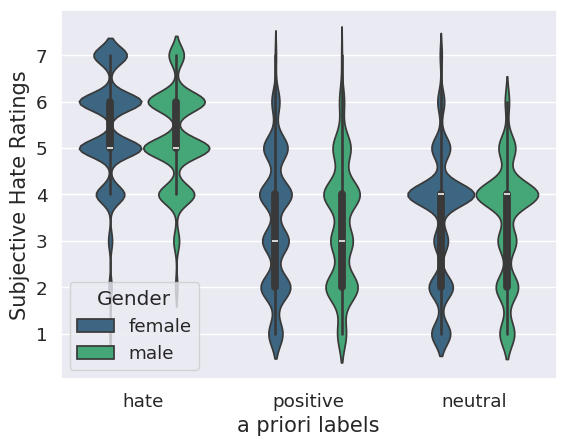

In [49]:
# Draw a nested barplot 
import seaborn as sns

#increase font size of all elements
sns.set(font_scale=1.2)

g = sns.violinplot(
    data=df_period_procesed, 
    x="cond_remark_comb", y= "Intensity_rating",hue="Gender[1]", palette="viridis"
)
plt.legend(title='Gender', loc='lower left')

#g = sns.catplot(
#    data=df_period_procesed, kind="bar",
#    x="cond_remark", y= "Intensity_rating", hue="Gender[1]",
#    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
#     order = [ 'positive', 'neutral','hate' ]

g.set_xlabel("a priori labels", fontsize = 15)
g.set_ylabel("Subjective Hate Ratings", fontsize = 15)

plt.savefig("figures/"+target_period+"_intensity_x_gender.png")

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

IARC_list = df_period_procesed['IP_DURATION'].tolist()
Intensity_list = df_period_procesed['cond_remark_comb'].tolist()
#perform two-way ANOVA
model = ols('IARC_list ~ C(Intensity_list)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F        PR(>F)
C(Intensity_list)  4.026826e+09      2.0  193.868565  2.527635e-84
Residual           2.804384e+11  27003.0         NaN           NaN

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

IARC_list = df_period_procesed['Confidence_rating'].tolist()
Intensity_list = df_period_procesed['cond_remark_comb'].tolist()

#perform two-way ANOVA
model = ols('IARC_list ~ C(Intensity_list)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F        PR(>F)
C(Intensity_list)    248.293581      2.0  120.378241  8.955261e-53
Residual           27848.353238  27003.0         NaN           NaN

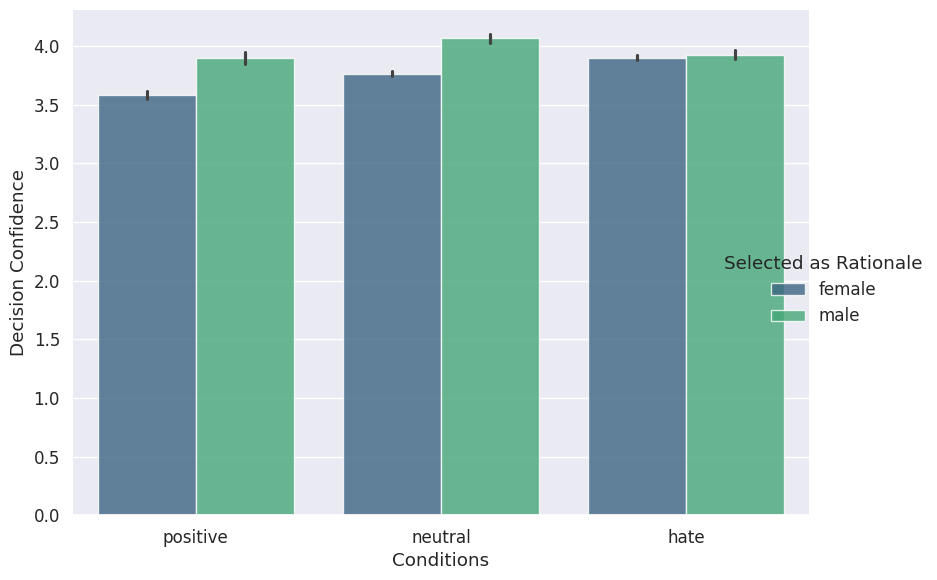

In [52]:
# Draw a nested barplot 
import seaborn as sns

#increase font size of all elements
sns.set(font_scale=1.1)

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="cond_remark_comb", y= "Confidence_rating", hue="Gender[1]",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Decision Confidence")
g.legend.set_title("Selected as Rationale")
plt.savefig("figures/"+target_period+"_confidence_gender_condition.png")

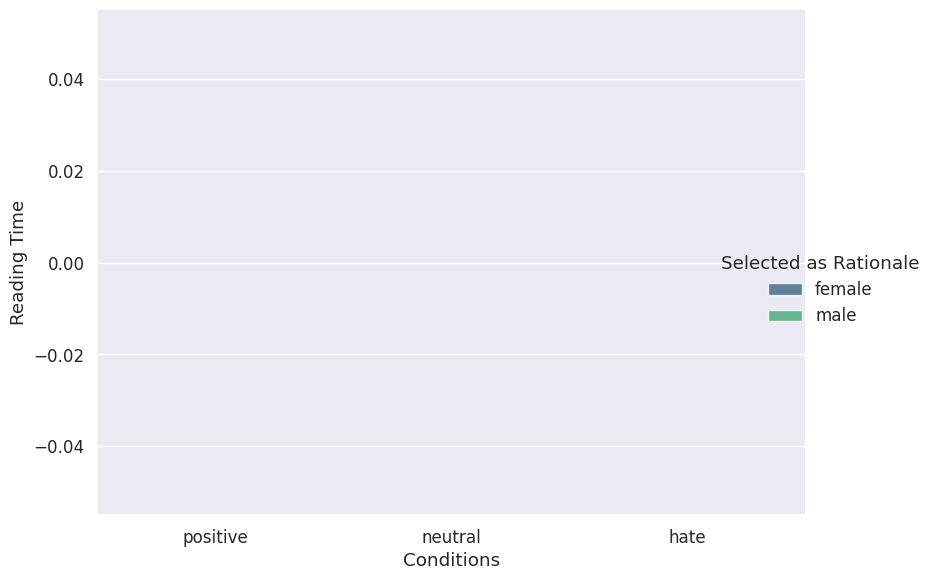

In [53]:
# Draw a nested barplot 
import seaborn as sns

#increase font size of all elements
sns.set(font_scale=1.1)

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="cond_remark", y= "IP_DURATION", hue="Gender[1]",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Reading Time")
g.legend.set_title("Selected as Rationale")
plt.savefig("figures/"+target_period+"_ipduration_hate_x_gender.png")

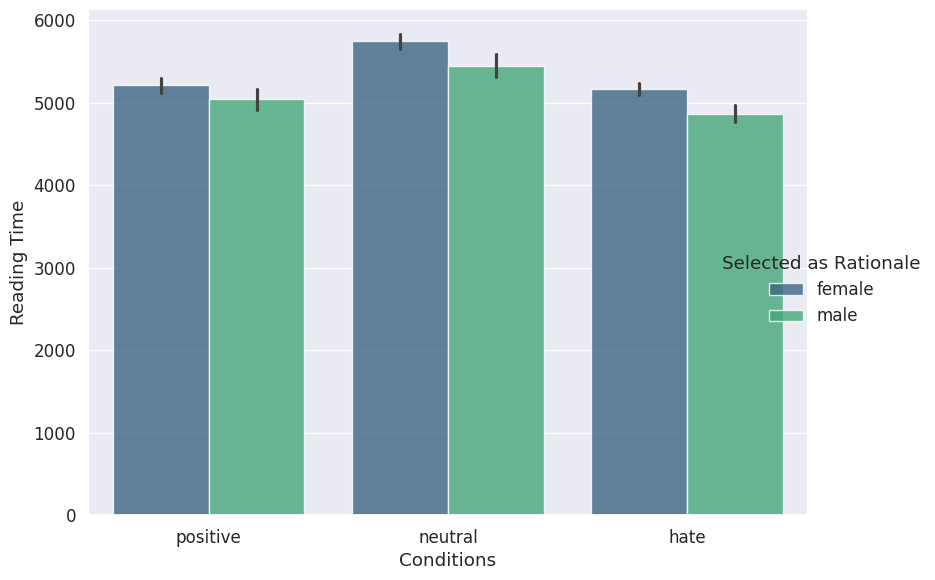

In [54]:
# Draw a nested barplot 
import seaborn as sns

#increase font size of all elements
sns.set(font_scale=1.1)

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IP_DURATION", hue="Gender[1]",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Reading Time")
g.legend.set_title("Selected as Rationale")
plt.savefig("figures/"+target_period+"_ipduration_hate_x_gender.png")

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

IARC_list = df_period_procesed['IP_DURATION'].tolist()
Intensity_list = df_period_procesed['cond_remark'].tolist()
clicked_list = df_period_procesed['Click_binary'].tolist()

#perform two-way ANOVA
model = ols('IARC_list ~ C(Intensity_list) + C(clicked_list) + C(Intensity_list):C(clicked_list)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F  \
C(Intensity_list)                  1.294015e+10      5.0  258.462857   
C(clicked_list)                    4.922259e+08      1.0   49.157912   
C(Intensity_list):C(clicked_list)  2.340045e+08      5.0    4.673941   
Residual                           2.702951e+11  26994.0         NaN   

                                          PR(>F)  
C(Intensity_list)                  8.918628e-271  
C(clicked_list)                     2.417201e-12  
C(Intensity_list):C(clicked_list)   2.879392e-04  
Residual                                     NaN

/tmp/ipykernel_821057/4251805588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


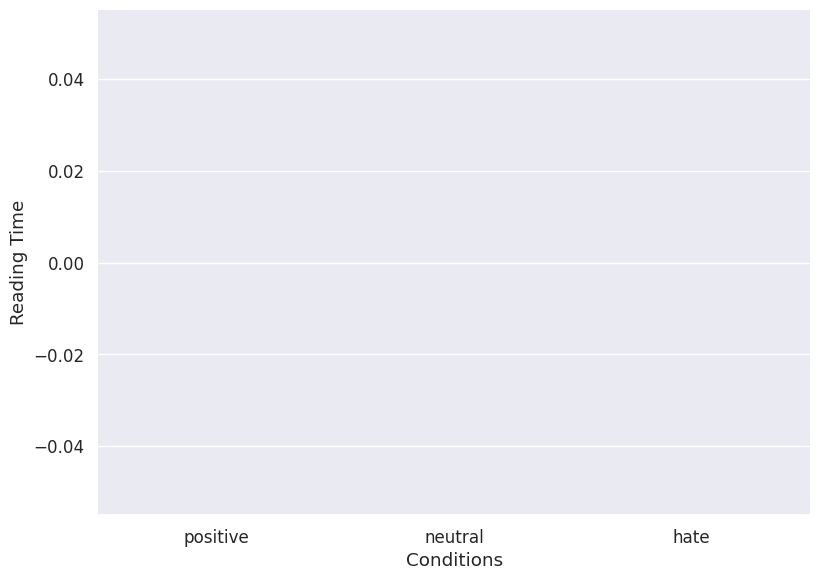

In [56]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="cond_remark", y= "IP_DURATION",#hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Reading Time")
#g.legend.set_title("Selected as Rationale")
plt.savefig("figures/"+target_period+"_readingtime_conditions.png")

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

IARC_list = df_period_procesed['IA_RUN_COUNT'].tolist()
Intensity_list = df_period_procesed['Intensity_Category'].tolist()
clicked_list = df_period_procesed['Clicked'].tolist()
#perform two-way ANOVA
model = ols('IARC_list ~ C(Intensity_list) + C(clicked_list) + C(Intensity_list):C(clicked_list)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F  \
C(Intensity_list)                      3.632612      2.0    0.837924   
C(clicked_list)                      304.672840      1.0  140.555938   
C(Intensity_list):C(clicked_list)     41.930480      2.0    9.671978   
Residual                           58525.927522  27000.0         NaN   

                                         PR(>F)  
C(Intensity_list)                  4.326191e-01  
C(clicked_list)                    2.420679e-32  
C(Intensity_list):C(clicked_list)  6.324371e-05  
Residual                                    NaN

In [58]:
to_analyse = ['IP_DURATION', 'IA_FIXATION_COUNT', 'IA_FIXATION_%', 'IA_DWELL_TIME', 'IA_DWELL_TIME_%',
              'IA_MAX_FIX_PUPIL_SIZE', 'IA_MIN_FIX_PUPIL_SIZE' ,  'IA_AVERAGE_FIX_PUPIL_SIZE', 'Pupilsize_variation',
            'IA_RUN_COUNT', 'backward_reg_count', 'forward_reg_count', 'total_reg_count', 
            'IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT','IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP',
            'TRIAL_TOTAL_VISITED_IA_COUNT', 'IA_FIRST_FIXATION_DURATION', 'IA_SECOND_FIXATION_DURATION', 'IA_FIRST_RUN_FIXATION_%','IA_SECOND_RUN_FIXATION_%']


to_analyse_cat = ['IA_REGRESSION_IN', 'IA_REGRESSION_OUT','IA_SKIP']
       
       

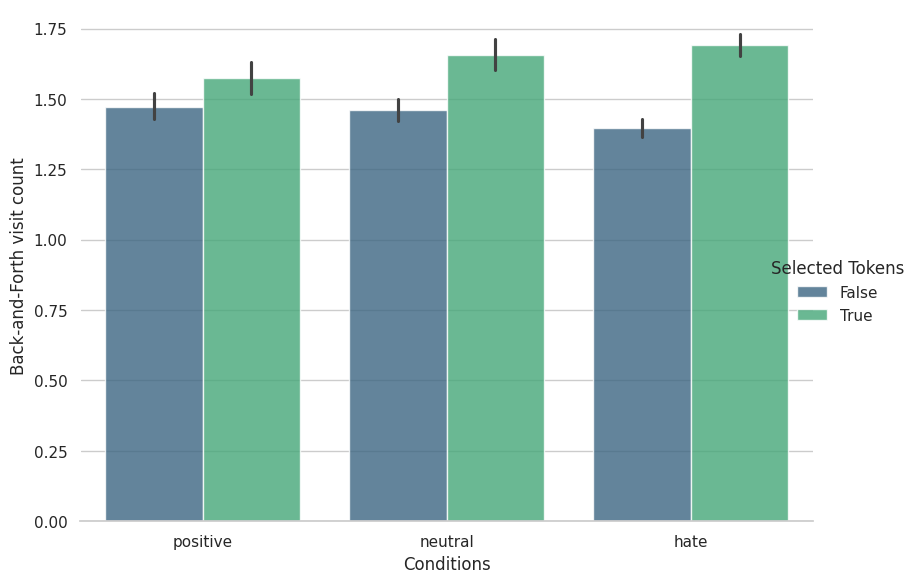

In [59]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_RUN_COUNT", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Back-and-Forth visit count")
g.legend.set_title("Selected Tokens")
plt.savefig("figures/"+target_period+"_runcount_hate_x_clicked.png")

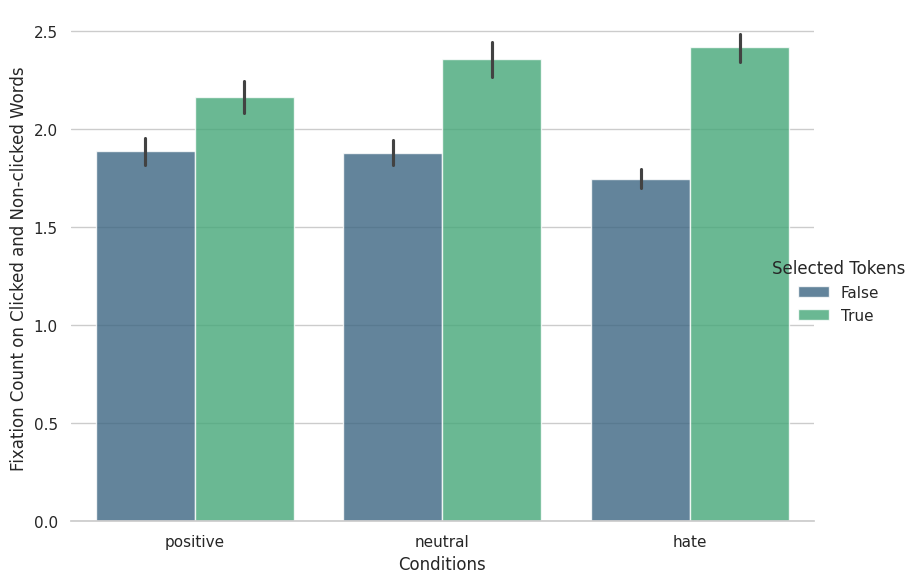

In [60]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_FIXATION_COUNT", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Fixation Count on Clicked and Non-clicked Words ")
g.legend.set_title("Selected Tokens")
plt.savefig("figures/"+target_period+"_fix_count_hate_x_clicked.png")

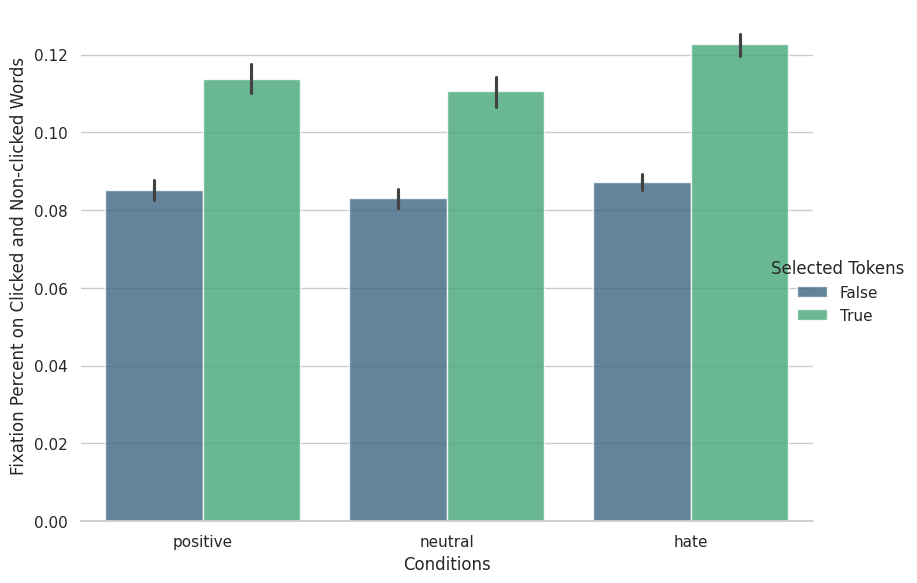

In [61]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_FIXATION_%", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Fixation Percent on Clicked and Non-clicked Words")
g.legend.set_title("Selected Tokens")
plt.savefig("figures/"+target_period+"_fixation_percent_hate_x_clicked.png")

In [62]:
IARC_list = df_period_procesed['IA_FIXATION_%'].tolist()
Intensity_list = df_period_procesed['Intensity_Category'].tolist()
clicked_list = df_period_procesed['Clicked'].tolist()
#perform two-way ANOVA
model = ols('IARC_list ~ C(Intensity_list) + C(clicked_list) + C(Intensity_list):C(clicked_list)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F  \
C(Intensity_list)                    0.284688      2.0   15.901153   
C(clicked_list)                      6.503758      1.0  726.531157   
C(Intensity_list):C(clicked_list)    0.092544      2.0    5.169012   
Residual                           241.698482  27000.0         NaN   

                                          PR(>F)  
C(Intensity_list)                   1.253952e-07  
C(clicked_list)                    6.273676e-158  
C(Intensity_list):C(clicked_list)   5.695822e-03  
Residual                                     NaN

In [63]:
IARC_list = df_period_procesed['IA_FIXATION_%'].tolist()
Intensity_list = df_period_procesed['Intensity_Category'].tolist()
clicked_list = df_period_procesed['Clicked'].tolist()
#perform two-way ANOVA
model = ols('IARC_list ~ C(Intensity_list) + C(clicked_list) + C(Intensity_list):C(clicked_list)', data=df_period_procesed).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df           F  \
C(Intensity_list)                    0.284688      2.0   15.901153   
C(clicked_list)                      6.503758      1.0  726.531157   
C(Intensity_list):C(clicked_list)    0.092544      2.0    5.169012   
Residual                           241.698482  27000.0         NaN   

                                          PR(>F)  
C(Intensity_list)                   1.253952e-07  
C(clicked_list)                    6.273676e-158  
C(Intensity_list):C(clicked_list)   5.695822e-03  
Residual                                     NaN

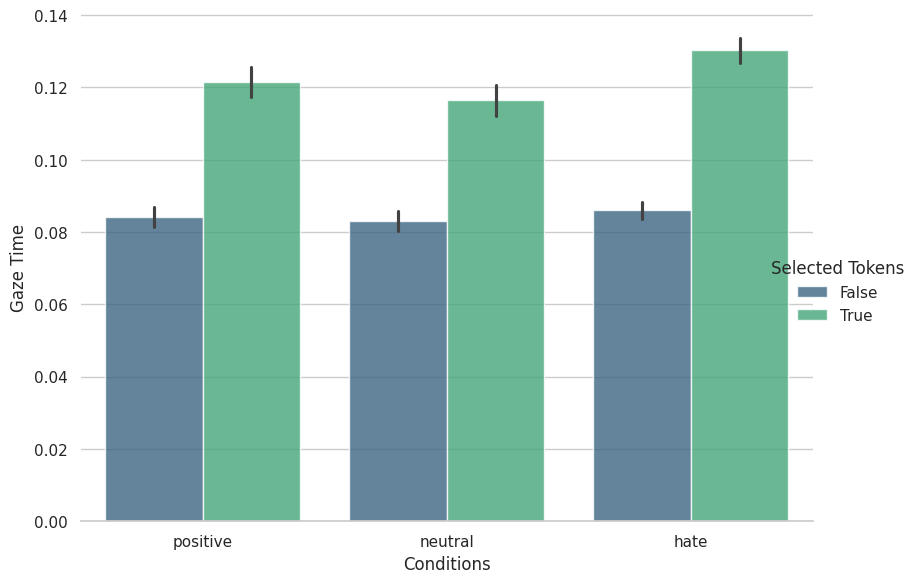

In [64]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_DWELL_TIME_%", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Gaze Time")
g.legend.set_title("Selected Tokens")
plt.savefig("figures/"+target_period+"_gazetime_hate_x_clicked.png")

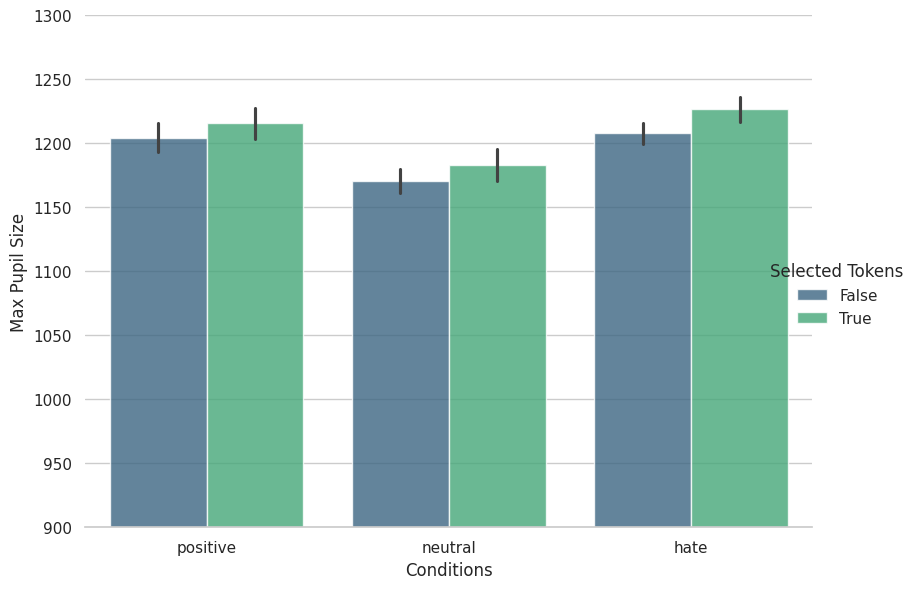

In [65]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_MAX_FIX_PUPIL_SIZE", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Max Pupil Size")
g.legend.set_title("Selected Tokens")
plt.ylim(900, 1300)
plt.savefig("figures/"+target_period+"_max_pupil_size_hate_x_clicked.png")

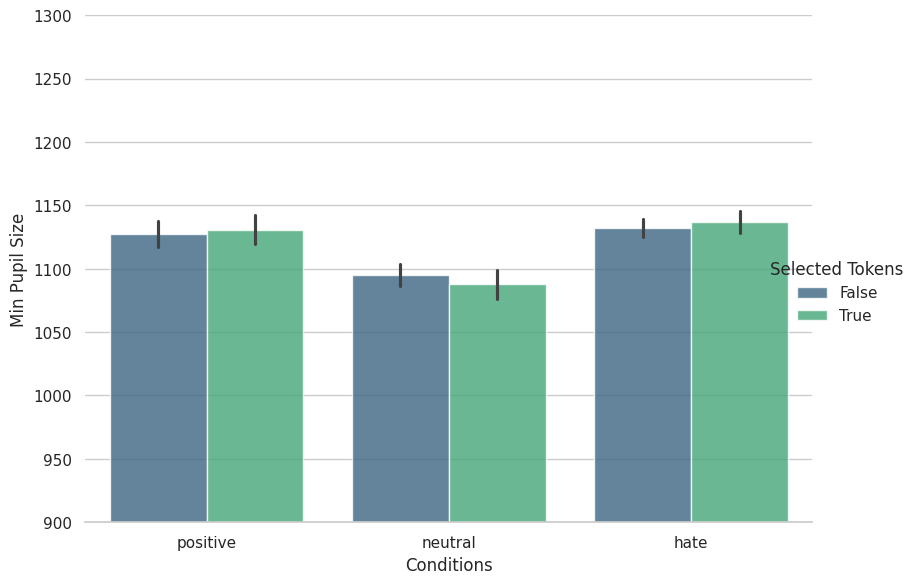

In [66]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_MIN_FIX_PUPIL_SIZE", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)

#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Min Pupil Size")
g.legend.set_title("Selected Tokens")
plt.ylim(900, 1300)
plt.savefig("figures/"+target_period+"_min_pupilsize_hate_x_clicked.png")

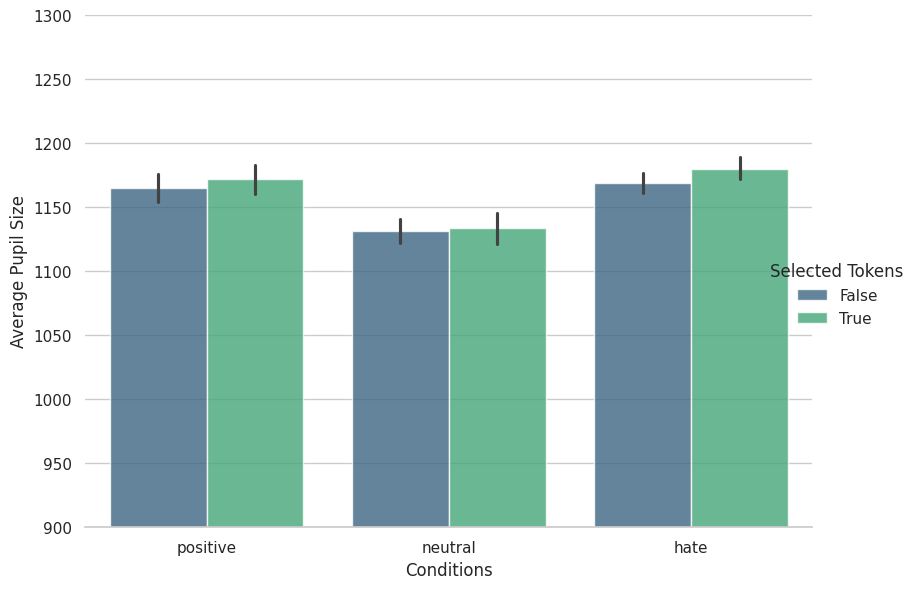

In [67]:
# Draw a nested barplot 

g = sns.catplot(
    data=df_period_procesed, kind="bar",
    x="Intensity_Category", y= "IA_AVERAGE_FIX_PUPIL_SIZE", hue="Clicked",
    palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
     order = [ 'positive', 'neutral','hate' ]
)


#plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
g.despine(left=True)
g.set_axis_labels("Conditions", "Average Pupil Size")
g.legend.set_title("Selected Tokens")
plt.ylim(900, 1300)
plt.savefig("figures/"+target_period+"_avg_pupilsize_hate_x_clicked.png")

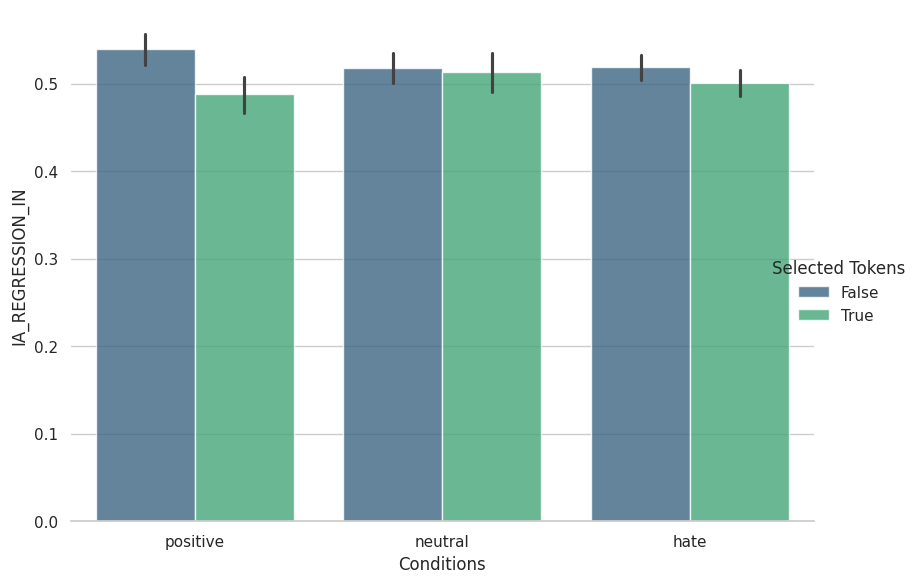

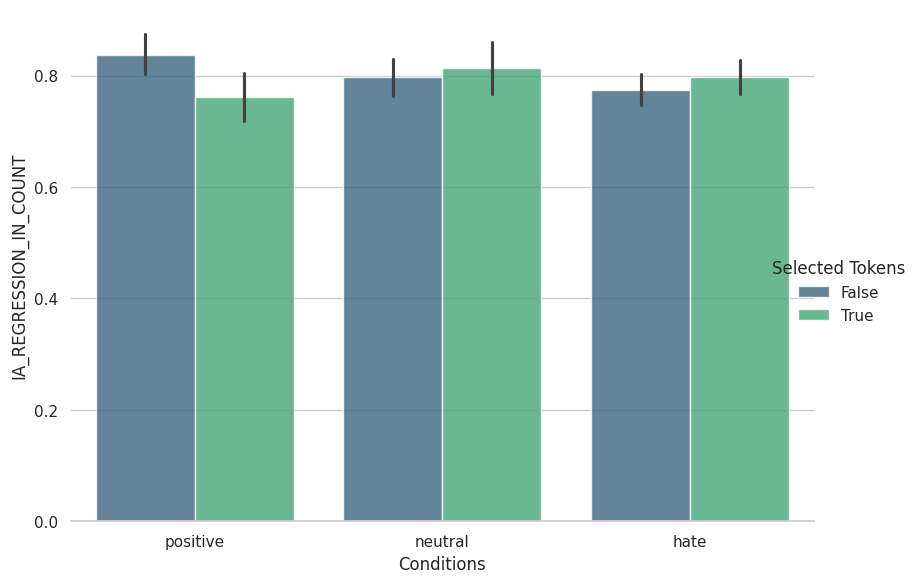

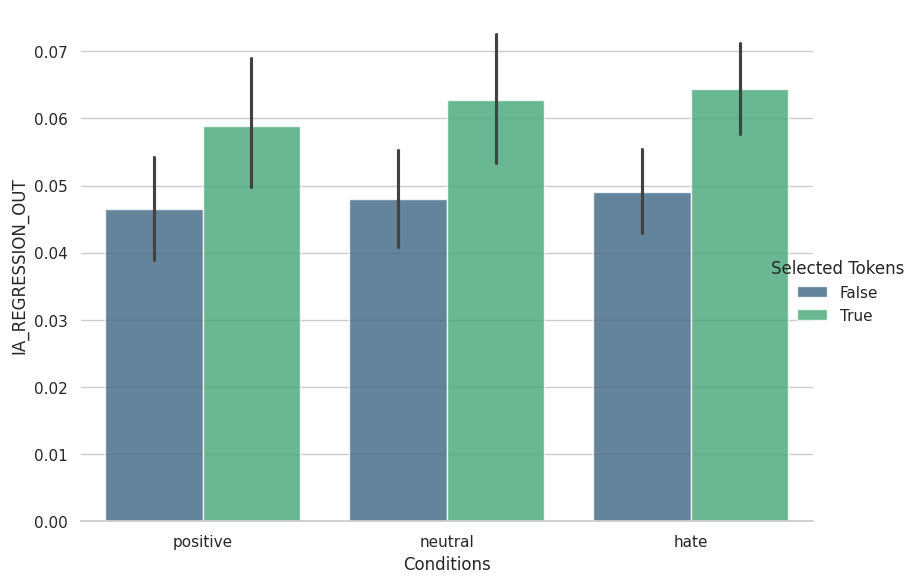

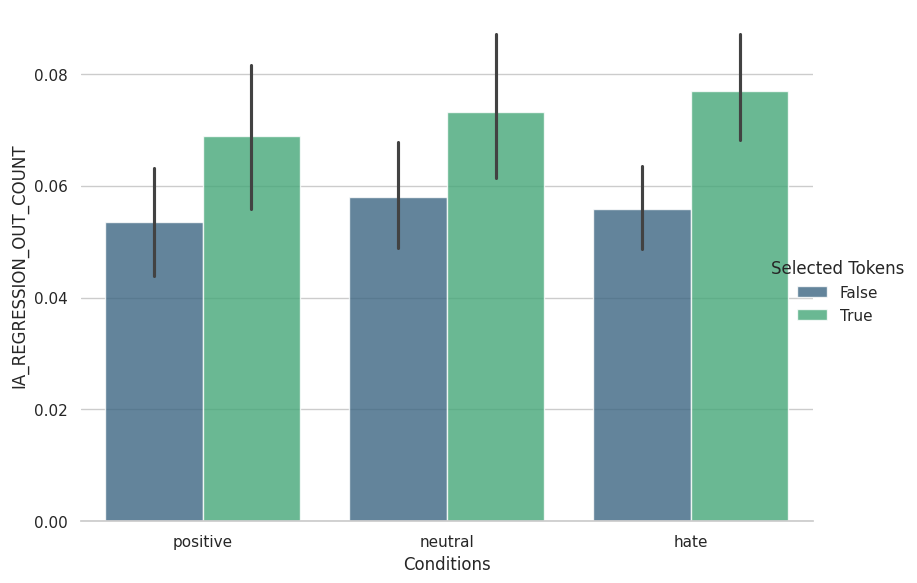

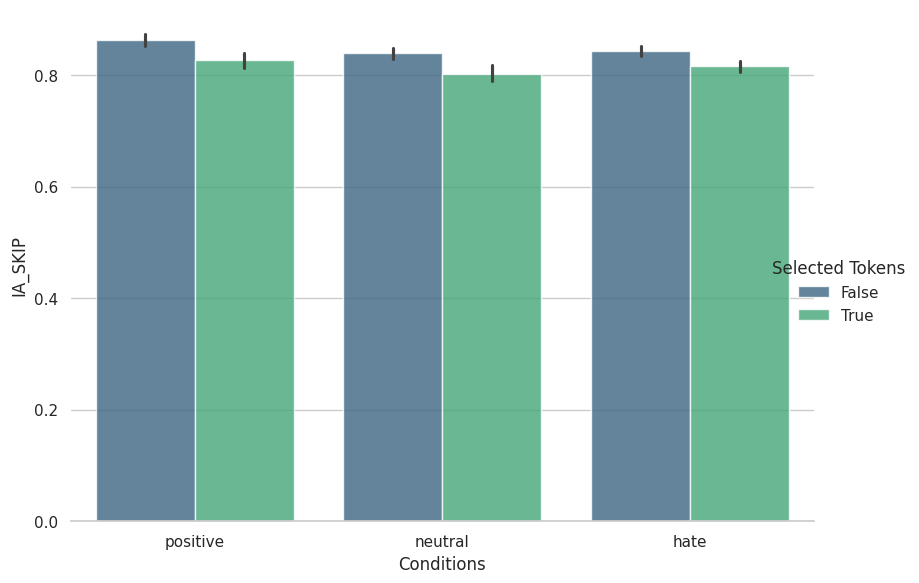

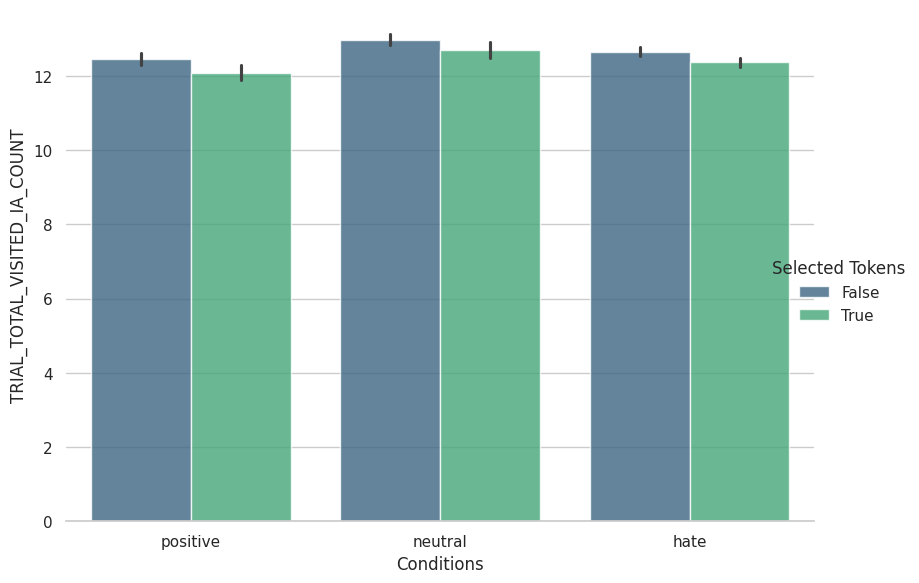

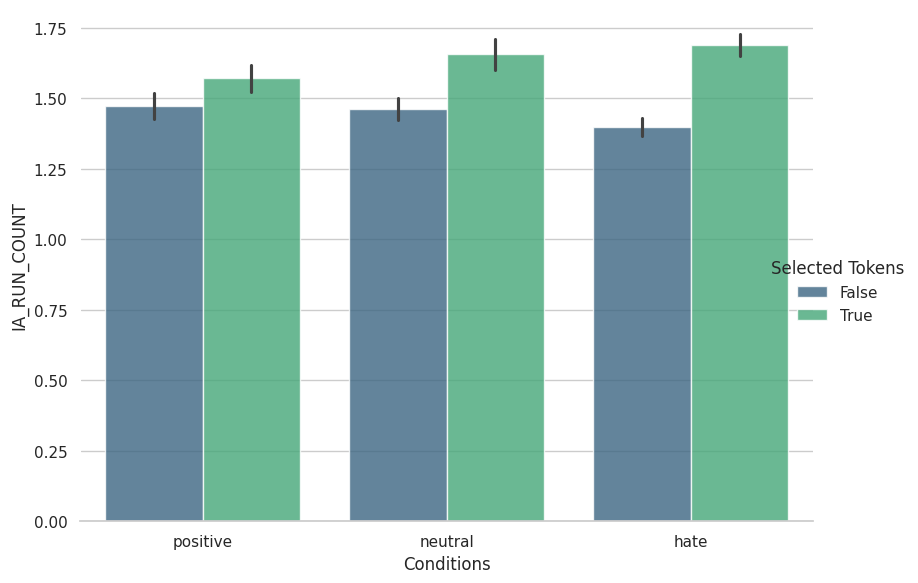

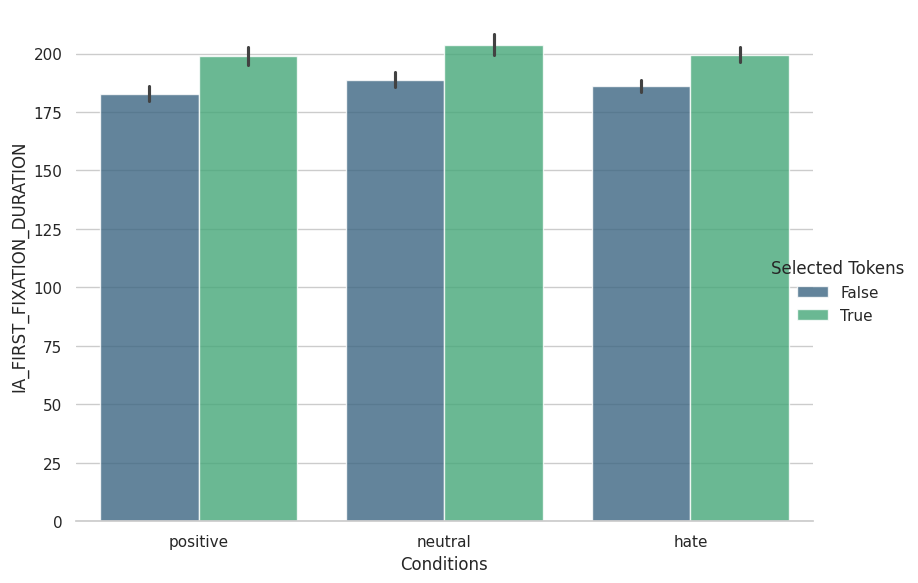

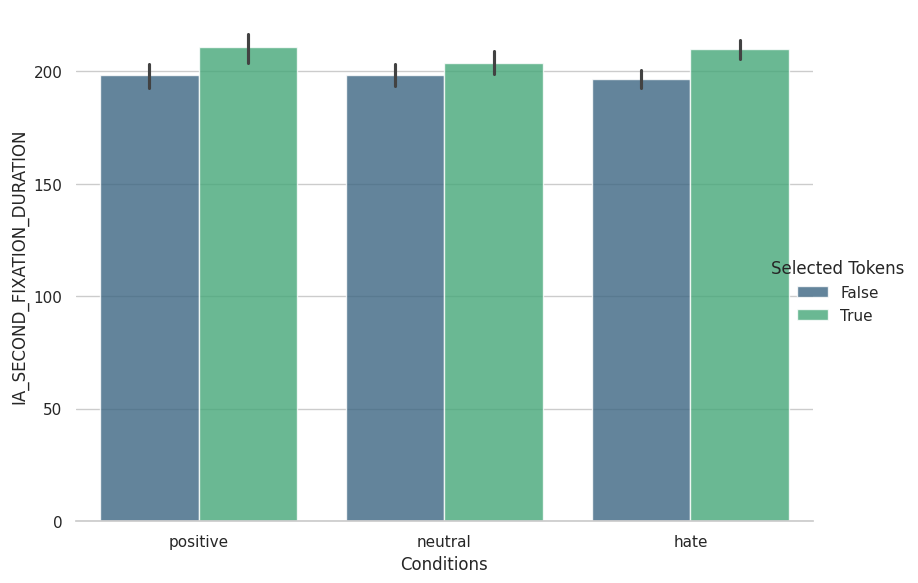

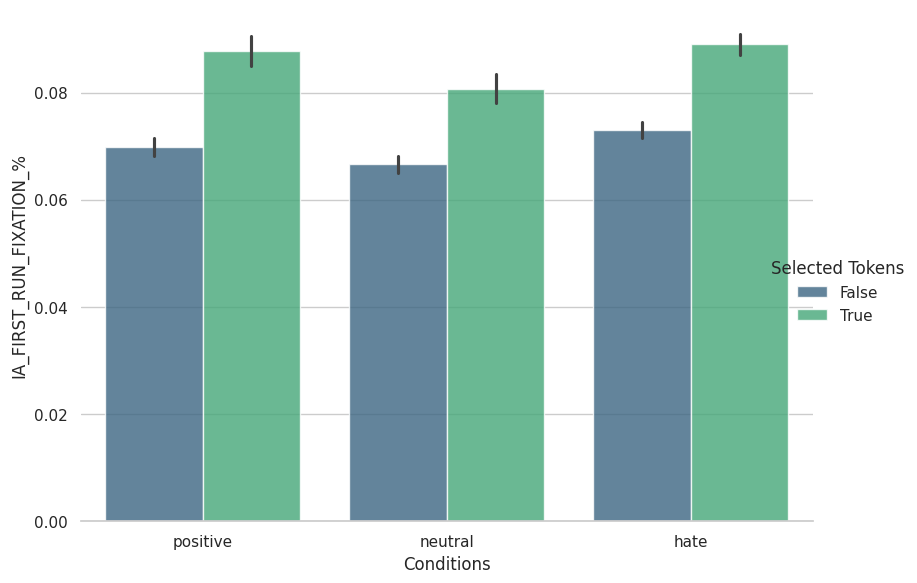

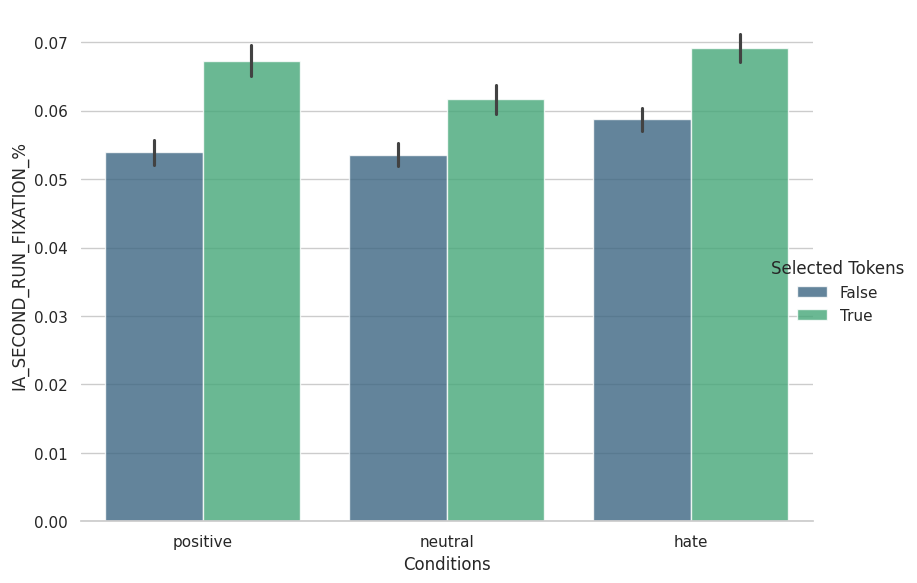

In [68]:
new_params = ['IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT','IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP',
'TRIAL_TOTAL_VISITED_IA_COUNT', 'IA_RUN_COUNT', 'IA_FIRST_FIXATION_DURATION', 'IA_SECOND_FIXATION_DURATION', 'IA_FIRST_RUN_FIXATION_%', 'IA_SECOND_RUN_FIXATION_%']
            
# Draw a nested barplot 

for nparam in new_params:
    g = sns.catplot(
        data=df_period_procesed, kind="bar",
        x="Intensity_Category", y= nparam, hue="Clicked",
        palette="viridis", alpha=.8, height=6, aspect=7/5, #errorbar=None, 
        order = [ 'positive', 'neutral','hate' ]
    )


    #plt.legend(title="Reading Time", loc='upper left', labels=['female - N=', 'Divers', 'Male'])
    g.despine(left=True)
    g.set_axis_labels("Conditions", nparam)
    g.legend.set_title("Selected Tokens")
    #plt.ylim(900, 1300)
    plt.savefig("figures/"+target_period+"_"+nparam+"_hate_x_clicked.png")
    plt.show

------------------------------------

<div style="background-color:Pink">
<h2> 
<strong> Manipulated - Clicked - All cases on df_period_procesed on MC cases (cond_remark)
</strong> </h2>
</div>

+ one for H versus Neutral and one for Hate versus Positive
+ for all "to_analyze" columns

In [69]:
df_period_procesed['cond_remark'].unique().tolist()

['hate_w_high',
 'pos_w',
 'hate_w_med',
 'neutral_to_gender',
 'no_hate_w',
 'hate_m']

In [70]:
df_period_procesed.columns

Index(['IP_INDEX', 'IP_LABEL', 'RECORDING_SESSION_LABEL', 'TRIAL_INDEX',
       'IA_AVERAGE_FIX_PUPIL_SIZE', 'TRIAL_DWELL_TIME', 'TRIAL_FIXATION_COUNT',
       'TRIAL_IA_COUNT', 'TRIAL_LABEL', 'IA_FIXATION_%', 'IA_FIXATION_COUNT',
       'GROUPING_VARIABLES', 'IA_DWELL_TIME', 'IA_DWELL_TIME_%',
       'IA_FIRST_FIXATION_DURATION', 'IA_LABEL', 'IA_MAX_FIX_PUPIL_SIZE',
       'IA_MIN_FIX_PUPIL_SIZE', 'IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT',
       'IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP',
       'TRIAL_TOTAL_VISITED_IA_COUNT', 'IP_END_TIME', 'IP_START_TIME',
       'IA_RUN_COUNT', 'INTEREST_AREA_FIXATION_SEQUENCE', 'image_name', 'AGE',
       'Confidence_rating', 'Intensity_rating', 'L1[1]', 'RT', 'RT[1]',
       'RT_confidence', 'RT_confidence[1]', 'annotation_clicks', 'sno',
       'change_remark', 'condition', 'assertion', 'Gender[1]',
       'IA_SECOND_FIXATION_DURATION', 'IA_SECOND_RUN_FIXATION_%',
       'IA_FIRST_RUN_FIXATION_%', 'IP_DURATION', 'Clicked_words

In [71]:
#df_period_procesed['cond_remark'].values.tolist()

df_period_procesed['Manipulated_all'] = 0
df_period_procesed.loc[(df_period_procesed['Manipulated_words_H_N']==1), 'Manipulated_all'] = 1
df_period_procesed.loc[(df_period_procesed['Manipulated_words_H_P']==1 ),'Manipulated_all'] = 1

In [72]:
df_period_procesed['Clicked_Manipulated'] = 0
df_period_procesed.loc[(df_period_procesed['Click_binary']==1) & (df_period_procesed['Manipulated_all']==1 ), 'Clicked_Manipulated'] = 1

In [73]:
MC_H_N_conds = ['hate_w_high', 'neutral_w']
MC_H_P_conds = ['hate_w_high', 'pos_w']
manipulated_cond = ['hate_w_high', 'pos_w', 'neutral_w']
print(len(df_period_procesed))
df_period_procesed_MC_H_N = df_period_procesed.loc[df_period_procesed['cond_remark'].isin(MC_H_N_conds)]
df_period_procesed_MC_H_P = df_period_procesed.loc[df_period_procesed['cond_remark'].isin(MC_H_P_conds)]
df_period_procesed_M = df_period_procesed.loc[df_period_procesed['cond_remark'].isin(manipulated_cond)]
print(len(df_period_procesed_MC_H_N))
print(len(df_period_procesed_MC_H_P))
print(len(df_period_procesed_M))

27006
6174
12264
12264


In [74]:
grouped_df_freq = df_period_procesed.groupby(['Intensity_Category'], dropna=False)
word_freq= dict()
for group_name in grouped_df_freq.groups.keys(): # sample key : ('p1', 5)
    print('Processing : ',group_name)
    group_dict= dict()
    trial_df = grouped_df_freq.get_group(group_name)
    words_M_R = trial_df['Clicked_Manipulated'].sum()
    group_dict['words_M_R'] = words_M_R
    
    only_M = trial_df['Manipulated_all'].sum() - trial_df['Clicked_Manipulated'].sum()
    group_dict['only_M'] = only_M
    
    only_R = trial_df['Click_binary'].sum() - trial_df['Clicked_Manipulated'].sum()
    group_dict['only_R'] = only_R
    
    group_dict['other'] =  len(trial_df)-(only_R+only_M+words_M_R)
    word_freq[group_name] = group_dict

Processing :  hate
Processing :  neutral
Processing :  positive


/tmp/ipykernel_821057/1992578954.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df_freq.get_group(group_name)


In [75]:
word_freq

{'hate': {'words_M_R': 1604,
  'only_M': 1126,
  'only_R': 4070.0,
  'other': 5574.0},
 'neutral': {'words_M_R': 607,
  'only_M': 569,
  'only_R': 2176.0,
  'other': 4113.0},
 'positive': {'words_M_R': 597,
  'only_M': 369,
  'only_R': 2400.0,
  'other': 3801.0}}

In [76]:
freq_df = pd.DataFrame(word_freq).T
freq_df

words_M_R  only_M  only_R   other
hate         1604.0  1126.0  4070.0  5574.0
neutral       607.0   569.0  2176.0  4113.0
positive      597.0   369.0  2400.0  3801.0

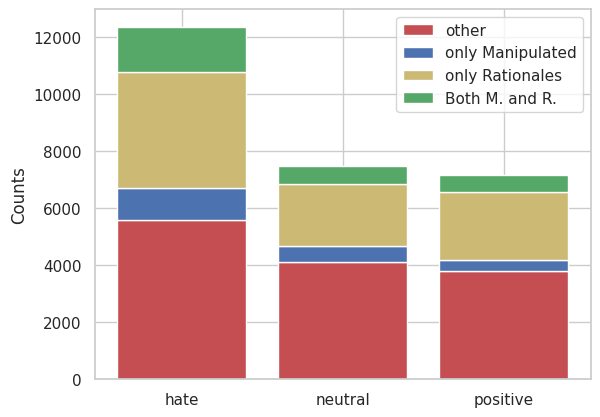

<Figure size 640x480 with 0 Axes>

In [77]:
# create data
x = ['hate', 'neutral', 'positive']

y1 = np.array(freq_df['other'].values.tolist())
y2 = np.array(freq_df['only_M'].values.tolist())
y3 = np.array(freq_df['only_R'].values.tolist())
y4 = np.array(freq_df['words_M_R'].values.tolist())



 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')

plt.ylabel("Counts")
plt.legend([ "other",  "only Manipulated", "only Rationales","Both M. and R.",])
plt.title("")
plt.show()
 
plt.savefig("figures/token_dist.jpeg")

In [78]:
print('number of the tokens which are both manipulated and selected: ', df_period_procesed['Clicked_Manipulated'].sum())
print('number of the tokens which are selected: ', df_period_procesed['Click_binary'].sum())
print('number of the tokens which are manipulated: ', df_period_procesed['Manipulated_all'].sum())
print('number of all tokens : ', len(df_period_procesed))

number of the tokens which are both manipulated and selected:  2808
number of the tokens which are selected:  11454.0
number of the tokens which are manipulated:  4872
number of all tokens :  27006


In [79]:
grouped_df = df_period_procesed_MC_H_P.groupby(['cond_remark'], dropna=False)

MC_H_P_dict= dict()
for group_name in grouped_df.groups.keys(): # sample key : ('p1', 5)
    print('Processing : ',group_name)
    trial_df = grouped_df.get_group(group_name)
    all_cols_dict = dict()    
    for col in to_analyse:
        values_dict= dict()
        print('Parameter : ',col)
        print('All values (Mean): ', trial_df[col].mean())
        print('Manipulated : ', trial_df.loc[trial_df['Manipulated_words_H_P']==1][col].mean())
        print('Non-Manipulated : ', trial_df.loc[trial_df['Manipulated_words_H_P']==0][col].mean())
        print('Clicked : ', trial_df.loc[trial_df['Clicked']=='True'][col].mean())
        print('Un-Clicked : ', trial_df.loc[trial_df['Clicked']=='False'][col].mean())
        values_dict['All Mean'] = trial_df[col].mean()
        values_dict['Manipulated_Mean'] = trial_df.loc[trial_df['Manipulated_words_H_P']==1][col].mean()
        values_dict['UnManipulated_Mean'] = trial_df.loc[trial_df['Manipulated_words_H_P']==0][col].mean()
        values_dict['Clicked'] = trial_df.loc[trial_df['Clicked']=='True'][col].mean()
        values_dict['UnClicked'] = trial_df.loc[trial_df['Clicked']=='False'][col].mean()
        all_cols_dict[col]= values_dict
    
    MC_H_P_dict[group_name] =  all_cols_dict  

Processing :  hate_w_high
Parameter :  IP_DURATION
All values (Mean):  4673.679138321995
Manipulated :  4813.874039938556
Non-Manipulated :  4636.213259441708
Clicked :  4592.827011697979
Un-Clicked :  4741.702952579779
Parameter :  IA_FIXATION_COUNT
All values (Mean):  1.813087139617752
Manipulated :  2.4062980030721968
Non-Manipulated :  1.6545566502463054
Clicked :  2.1492378589152783
Un-Clicked :  1.5302713987473904
Parameter :  IA_FIXATION_%
All values (Mean):  0.0967937641723356
Manipulated :  0.12485760368663593
Non-Manipulated :  0.0892939449917898
Clicked :  0.11502786246012053
Un-Clicked :  0.08145275872353115
Parameter :  IA_DWELL_TIME
All values (Mean):  381.87139617751865
Manipulated :  544.052995391705
Non-Manipulated :  338.5297619047619
Clicked :  477.0067352002836
Un-Clicked :  301.8305994631673
Parameter :  IA_DWELL_TIME_%
All values (Mean):  0.0997505344995141
Manipulated :  0.13555261136712748


/tmp/ipykernel_821057/4130113536.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)


Non-Manipulated :  0.09018273809523811
Clicked :  0.12260163062743709
Un-Clicked :  0.08052508201610498
Parameter :  IA_MAX_FIX_PUPIL_SIZE
All values (Mean):  1198.2812568666227
Manipulated :  1187.5294117647059
Non-Manipulated :  1201.3207440811725
Clicked :  1219.0736842105264
Un-Clicked :  1179.079459002536
Parameter :  IA_MIN_FIX_PUPIL_SIZE
All values (Mean):  1125.1678751922655
Manipulated :  1099.1266201395813
Non-Manipulated :  1132.5295941375423
Clicked :  1135.9157894736843
Un-Clicked :  1115.242180896027
Parameter :  IA_AVERAGE_FIX_PUPIL_SIZE
All values (Mean):  1160.5783212480771
Manipulated :  1141.693190428714
Non-Manipulated :  1165.917043404735
Clicked :  1175.9426498855835
Un-Clicked :  1146.3893702451394
Parameter :  Pupilsize_variation
All values (Mean):  73.11338167435729
Manipulated :  88.40279162512462
Non-Manipulated :  68.79114994363022
Clicked :  83.15789473684211
Un-Clicked :  63.837278106508876
Parameter :  IA_RUN_COUNT
All values (Mean):  1.3780369290573373
M

In [80]:
## H-P
all_params_MC_H_P_dict= dict()
for col in to_analyse:
    print('Parameter : ',col)    
    grouped_df = df_period_procesed_MC_H_P.groupby(['cond_remark'], dropna=False)
    all_groups_dict = dict()
    for group_name in grouped_df.groups.keys(): # sample key : ('p1', 5)
        print('Processing : ',group_name)
        trial_df = grouped_df.get_group(group_name)
        values_dict = dict()    
        print('All values (Mean): ', trial_df[col].mean())
        print('Manipulated : ', trial_df.loc[trial_df['Manipulated_words_H_P']==1][col].mean())
        #print('Non-Manipulated : ', trial_df.loc[trial_df['Manipulated_words_H_P']==0][col].mean())
        print('Clicked : ', trial_df.loc[trial_df['Clicked']=='True'][col].mean())
        #print('Un-Clicked : ', trial_df.loc[trial_df['Clicked']=='False'][col].mean())
        values_dict['All'] = trial_df[col].mean()
        values_dict['Manipulated'] = trial_df.loc[trial_df['Manipulated_words_H_P']==1][col].mean()
        #values_dict['Non-Manipulated'] = trial_df.loc[trial_df['Manipulated_words_H_P']==0][col].mean()
        values_dict['Clicked'] = trial_df.loc[trial_df['Clicked']=='True'][col].mean()
        #values_dict['Non-Clicked'] = trial_df.loc[trial_df['Clicked']=='False'][col].mean()
        all_groups_dict[group_name]= values_dict
    
    all_params_MC_H_P_dict[col] =  all_groups_dict  

Parameter :  IP_DURATION
Processing :  hate_w_high
All values (Mean):  4673.679138321995
Manipulated :  4813.874039938556
Clicked :  4592.827011697979
Processing :  pos_w
All values (Mean):  5677.5784893267655
Manipulated :  5723.261904761905
Clicked :  5395.380023875846
Parameter :  IA_FIXATION_COUNT
Processing :  hate_w_high
All values (Mean):  1.813087139617752
Manipulated :  2.4062980030721968
Clicked :  2.1492378589152783
Processing :  pos_w
All values (Mean):  2.158128078817734
Manipulated :  2.994047619047619
Clicked :  2.421408674890569
Parameter :  IA_FIXATION_%
Processing :  hate_w_high
All values (Mean):  0.0967937641723356
Manipulated :  0.12485760368663593
Clicked :  0.11502786246012053
Processing :  pos_w
All values (Mean):  0.09706129720853858
Manipulated :  0.13200654761904762
Clicked :  0.11417170712296061
Parameter :  IA_DWELL_TIME
Processing :  hate_w_high
All values (Mean):  381.87139617751865
Manipulated :  544.052995391705
Clicked :  477.0067352002836
Processing :

/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

Parameter :  forward_reg_count
Processing :  hate_w_high
All values (Mean):  0.9012259194395796
Manipulated :  0.972682119205298
Clicked :  0.933154053015751
Processing :  pos_w
All values (Mean):  1.0652500940203085
Manipulated :  1.108512628624883
Clicked :  1.0600641907381936
Parameter :  total_reg_count
Processing :  hate_w_high
All values (Mean):  1.304553415061296
Manipulated :  1.4991721854304636
Clicked :  1.419131771033423
Processing :  pos_w
All values (Mean):  1.5844302369311771
Manipulated :  1.8344246959775492
Clicked :  1.653828519027969
Parameter :  IA_REGRESSION_IN
Processing :  hate_w_high
All values (Mean):  0.4976928147659855
Manipulated :  0.47357926221335994
Clicked :  0.49153318077803204
Processing :  pos_w
All values (Mean):  0.5136837532580365
Manipulated :  0.48501070663811563
Clicked :  0.4888324873096447
Parameter :  IA_REGRESSION_IN_COUNT
Processing :  hate_w_high
All values (Mean):  0.7218193803559657
Manipulated :  0.6799601196410767
Clicked :  0.729519450

/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1551012676.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

Processing :  pos_w
All values (Mean):  0.055810276532137514
Manipulated :  0.06369857594936709
Clicked :  0.06142585774058577


In [81]:
from matplotlib import cm
import scipy.stats as stats
from scipy.stats import ttest_ind


## H-N
all_params_MC_H_N_dict= dict()
for col in to_analyse:
    m_values = []
    unm_values = []
    avg_values = []
    cl_values = []
    uncl_values = []
    
    print('Parameter : ',col)    
    grouped_df = df_period_procesed_MC_H_N.groupby(['cond_remark'], dropna=False)
    all_groups_dict = dict()
    for group_name in grouped_df.groups.keys(): #hate_w_high and neutral_w
        print('Processing : ',group_name)
        trial_df = grouped_df.get_group(group_name)
        values_dict = dict()
        
        avg_values.append(trial_df[col].values.tolist()) 
        m_values.append(trial_df.loc[trial_df['Manipulated_words_H_N']==1][col].values.tolist())
        cl_values.append(trial_df.loc[trial_df['Clicked']=='True'][col].values.tolist())    

        t, p = ttest_ind(m_values[0], cl_values[0]) 
        print('t-test:', t, 'p-value:', p)
        print('All values (Mean): ', trial_df[col].mean())
        print('Manipulated : ', trial_df.loc[trial_df['Manipulated_words_H_N']==1][col].mean())
        #print('Non-Manipulated : ', trial_df.loc[trial_df['Manipulated_words_H_N']==0][col].mean())
        print('Clicked : ', trial_df.loc[trial_df['Clicked']=='True'][col].mean())
        #print('Un-Clicked : ', trial_df.loc[trial_df['Clicked']=='False'][col].mean())
        
        
        
        values_dict['All'] = trial_df[col].mean()
        values_dict['Manipulated'] = trial_df.loc[trial_df['Manipulated_words_H_N']==1][col].mean()
        #values_dict['Non-Manipulated'] = trial_df.loc[trial_df['Manipulated_words_H_N']==0][col].mean()
        values_dict['Clicked'] = trial_df.loc[trial_df['Clicked']=='True'][col].mean()
        #values_dict['Non-Clicked'] = trial_df.loc[trial_df['Clicked']=='False'][col].mean()
        
        ### statistical test to compare two conditions (hate versus neutral , or hate versus supportive)
        # Conduct Welch's t-Test and print the result 
        #print(stats.ttest_ind(data_group1, data_group2, equal_var = False)) 
    
    
        all_groups_dict[group_name]= values_dict
    ### statistical test to compare two conditions (hate versus neutral , or hate versus supportive)
    
    all_params_MC_H_N_dict[col] =  all_groups_dict  

Parameter :  IP_DURATION
Processing :  hate_w_high
t-test: 3.0823476542190145 p-value: 0.002067049973903378
All values (Mean):  4673.679138321995
Manipulated :  4895.023809523809
Clicked :  4592.827011697979
Parameter :  IA_FIXATION_COUNT
Processing :  hate_w_high
t-test: -2.864881496239355 p-value: 0.004192338094813045
All values (Mean):  1.813087139617752
Manipulated :  1.9213564213564214
Clicked :  2.1492378589152783
Parameter :  IA_FIXATION_%
Processing :  hate_w_high
t-test: -4.54733519702535 p-value: 5.585811284121225e-06
All values (Mean):  0.0967937641723356
Manipulated :  0.10002012987012988
Clicked :  0.11502786246012053
Parameter :  IA_DWELL_TIME
Processing :  hate_w_high
t-test: -3.710385745790761 p-value: 0.0002096181520508272
All values (Mean):  381.87139617751865
Manipulated :  394.476911976912
Clicked :  477.0067352002836
Parameter :  IA_DWELL_TIME_%
Processing :  hate_w_high
t-test: -6.268659820706018 p-value: 4.0079785356238947e-10
All values (Mean):  0.09975053449951

/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

t-test: nan p-value: nan
All values (Mean):  0.06086574379257306
Manipulated :  0.03085824493731919
Clicked :  0.06361556064073226
Parameter :  IA_SKIP
Processing :  hate_w_high
t-test: 1.2120503920351615 p-value: 0.2255611898138359
All values (Mean):  0.8386783284742468
Manipulated :  0.8398268398268398
Clicked :  0.8248847926267281
Parameter :  TRIAL_TOTAL_VISITED_IA_COUNT
Processing :  hate_w_high
t-test: -1.8591347295715883 p-value: 0.06307784805014742
All values (Mean):  12.287981859410431
Manipulated :  12.056277056277056
Clicked :  12.347040056717477
Parameter :  IA_FIRST_FIXATION_DURATION
Processing :  hate_w_high
t-test: nan p-value: nan
All values (Mean):  191.02702702702703
Manipulated :  181.96046287367406
Clicked :  198.3020594965675
Parameter :  IA_SECOND_FIXATION_DURATION
Processing :  hate_w_high
t-test: nan p-value: nan
All values (Mean):  201.95050618672667
Manipulated :  195.3264331210191
Clicked :  207.2394567548249
Parameter :  IA_FIRST_RUN_FIXATION_%
Processing : 

/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  trial_df = grouped_df.get_group(group_name)
/tmp/ipykernel_821057/1114493908.py:20: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

IP_DURATION
             hate_w_high        pos_w
All          4673.679138  5677.578489
Manipulated  4813.874040  5723.261905
Clicked      4592.827012  5395.380024
IA_FIXATION_COUNT
             hate_w_high     pos_w
All             1.813087  2.158128
Manipulated     2.406298  2.994048
Clicked         2.149238  2.421409
IA_FIXATION_%
             hate_w_high     pos_w
All             0.096794  0.097061
Manipulated     0.124858  0.132007
Clicked         0.115028  0.114172


/tmp/ipykernel_821057/3104275289.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Paired') # Colour map (there are many others)


IA_DWELL_TIME
             hate_w_high       pos_w
All           381.871396  457.029721
Manipulated   544.052995  685.143707
Clicked       477.006735  530.918424
IA_DWELL_TIME_%
             hate_w_high     pos_w
All             0.099751  0.099602
Manipulated     0.135553  0.144914
Clicked         0.122602  0.121367
IA_MAX_FIX_PUPIL_SIZE
             hate_w_high        pos_w
All          1198.281257  1203.322328
Manipulated  1187.529412  1196.150964
Clicked      1219.073684  1208.588832
IA_MIN_FIX_PUPIL_SIZE
             hate_w_high        pos_w
All          1125.167875  1114.336229
Manipulated  1099.126620  1090.734475
Clicked      1135.915789  1113.482741
IA_AVERAGE_FIX_PUPIL_SIZE
             hate_w_high        pos_w
All          1160.578321  1157.444114
Manipulated  1141.693190  1140.963555
Clicked      1175.942650  1159.132497
Pupilsize_variation
             hate_w_high       pos_w
All            73.113382   88.986099
Manipulated    88.402792  105.416488
Clicked        83.157895 

/home/oalacam/projects/gaze4hate/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


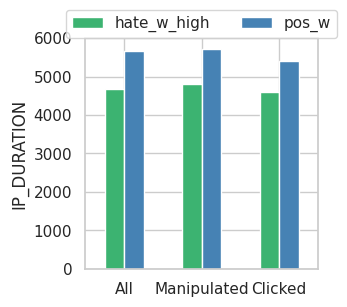

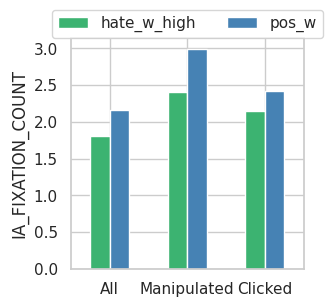

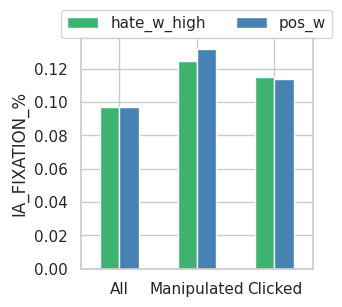

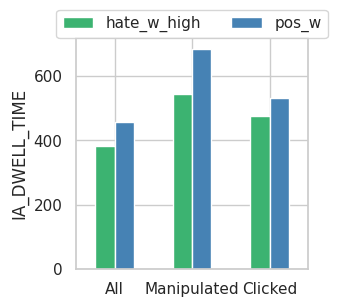

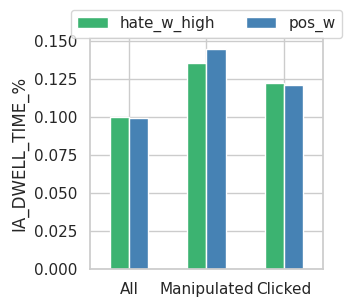

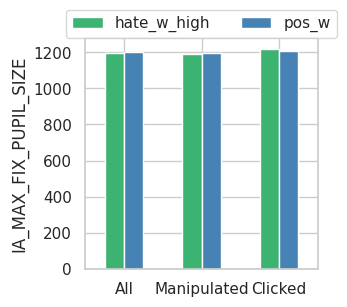

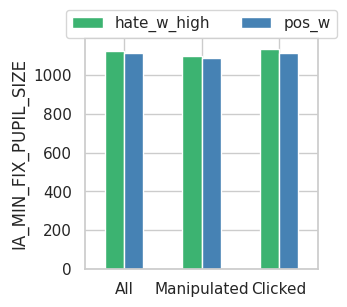

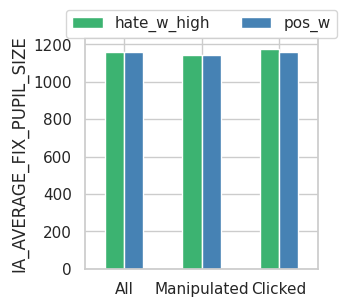

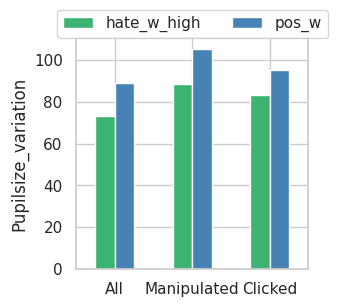

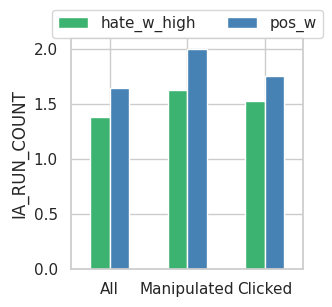

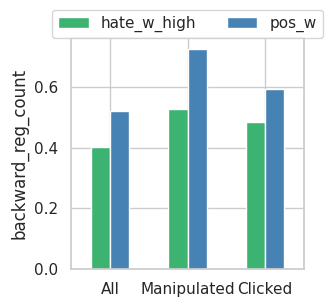

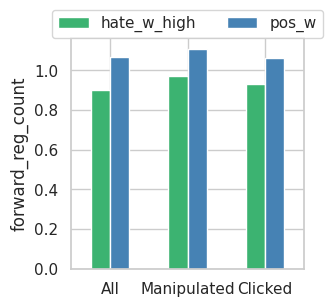

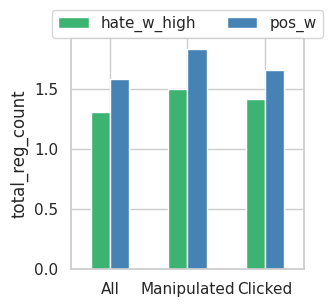

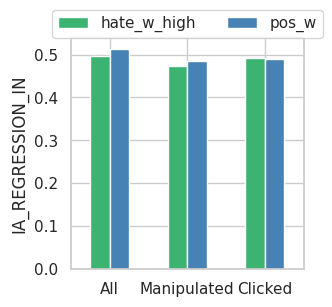

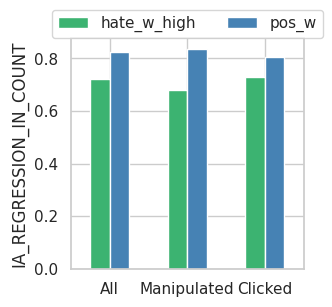

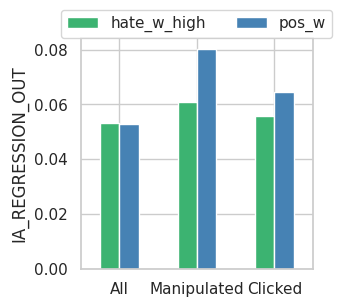

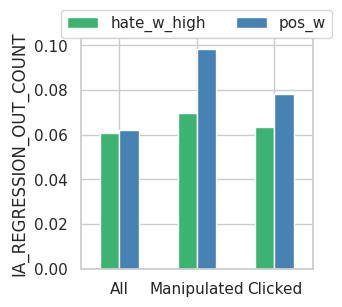

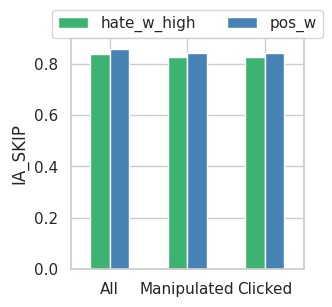

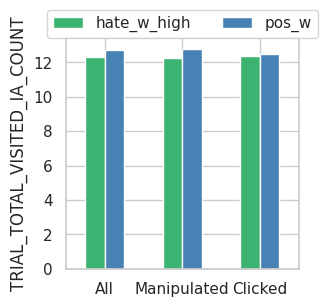

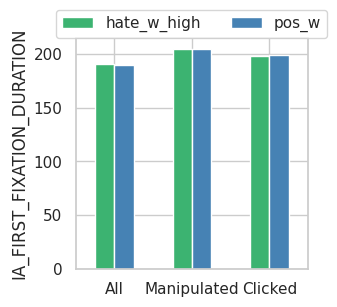

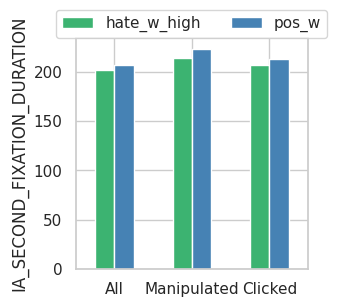

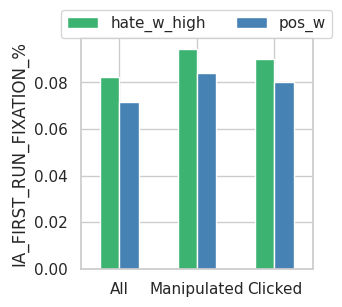

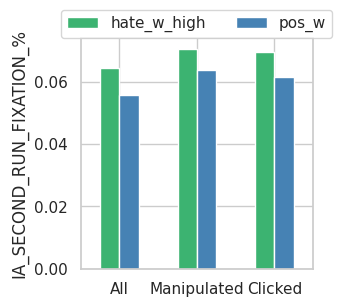

In [82]:
from matplotlib import cm
###Plot the graphs per parameter
cmap = cm.get_cmap('Paired') # Colour map (there are many others)

for param, values  in all_params_MC_H_P_dict.items():
    param_df = pd.DataFrame(values)
    print(param)
    print(param_df)
    
    # Creating barplot
    ax = param_df.plot.bar(rot=0, color=['mediumseagreen', 'steelblue'], figsize=(3,3))#cmap=cmap)
    #ax.set_title(param)
    #ax.set_xlabel("my x-label")
    ax.set_ylabel(param)
    
    ax.legend(ncol=2, loc='center', bbox_to_anchor=(0.5, 1.06))
    #ax.legend(title='conditions', bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.savefig('figures/MC_H_P_'+param+'.png')


/tmp/ipykernel_821057/4131838551.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c') # Colour map (there are many others)


IP_DURATION
             hate_w_high
All          4673.679138
Manipulated  4895.023810
Clicked      4592.827012
IA_FIXATION_COUNT
             hate_w_high
All             1.813087
Manipulated     1.921356
Clicked         2.149238
IA_FIXATION_%
             hate_w_high
All             0.096794
Manipulated     0.100020
Clicked         0.115028
IA_DWELL_TIME
             hate_w_high
All           381.871396
Manipulated   394.476912
Clicked       477.006735
IA_DWELL_TIME_%
             hate_w_high
All             0.099751
Manipulated     0.098703
Clicked         0.122602
IA_MAX_FIX_PUPIL_SIZE
             hate_w_high
All          1198.281257
Manipulated  1216.383799
Clicked      1219.073684
IA_MIN_FIX_PUPIL_SIZE
             hate_w_high
All          1125.167875
Manipulated  1135.369335
Clicked      1135.915789
IA_AVERAGE_FIX_PUPIL_SIZE
             hate_w_high
All          1160.578321
Manipulated  1174.146866
Clicked      1175.942650
Pupilsize_variation
             hate_w_high
All        

/home/oalacam/projects/gaze4hate/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


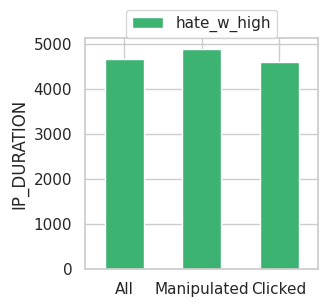

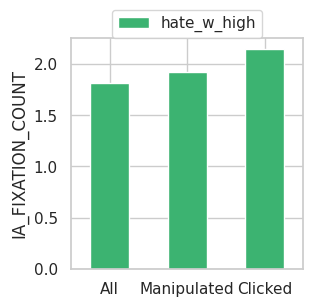

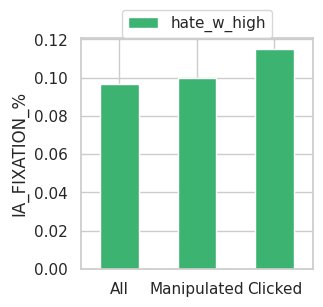

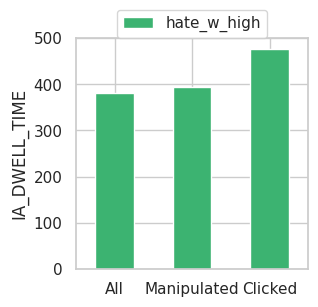

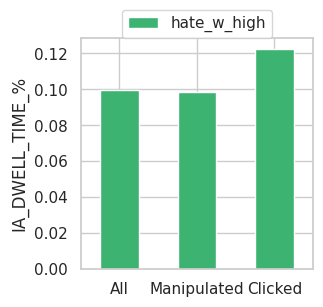

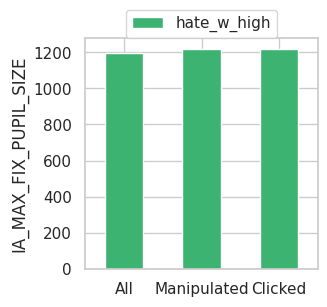

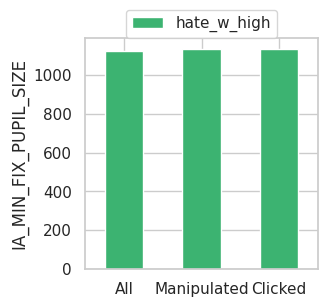

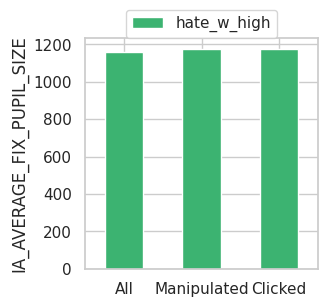

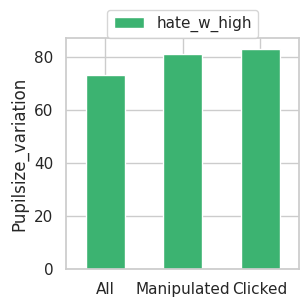

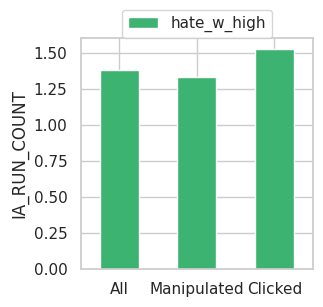

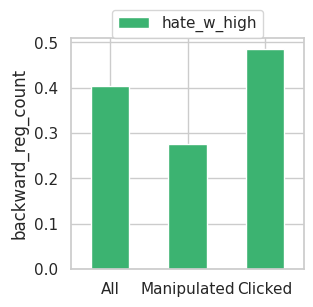

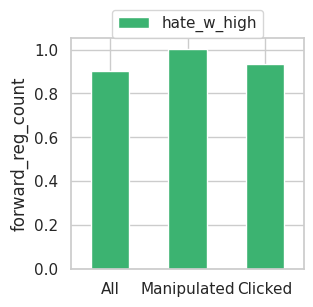

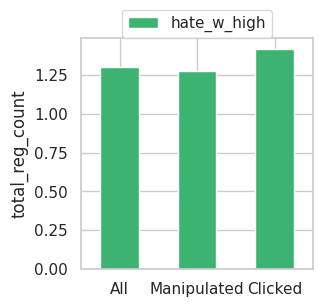

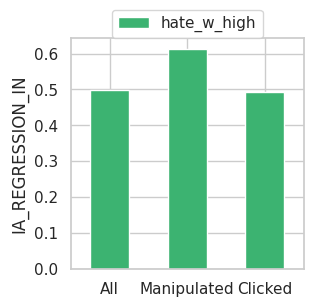

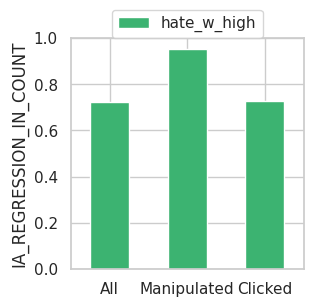

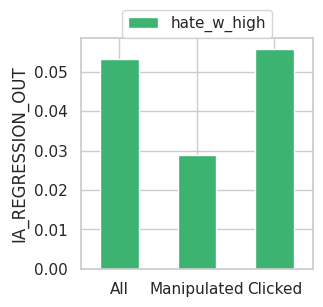

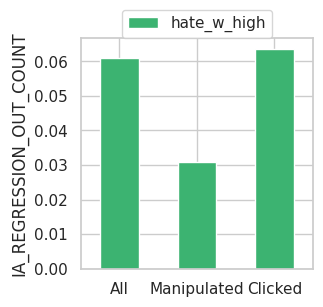

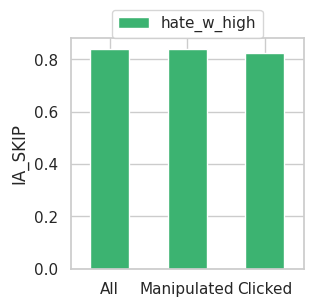

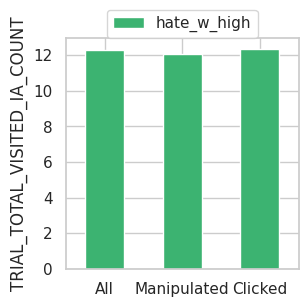

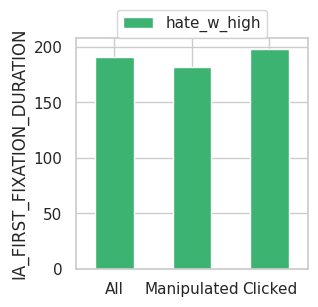

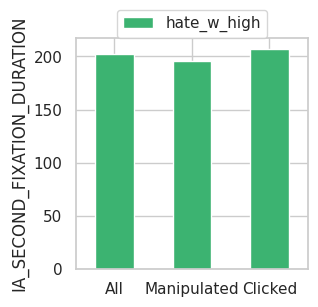

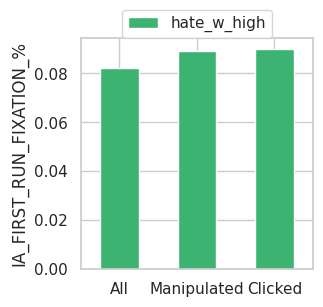

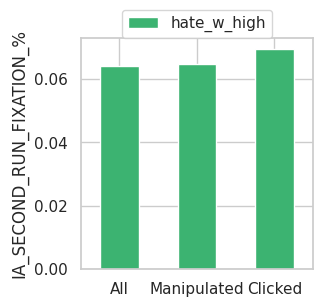

In [83]:
from matplotlib import cm
import scipy.stats as stats

###Plot the graphs per parameter
cmap = cm.get_cmap('tab20c') # Colour map (there are many others)

for param, values  in all_params_MC_H_N_dict.items():
    param_df = pd.DataFrame(values)
    print(param)
    print(param_df)
    # Creating barplot
    ax = param_df.plot.bar(rot=0, color=['mediumseagreen', 'teal'], figsize=(3,3)) #cmap=cmap)
    #ax.set_title(param)
    #ax.set_xlabel("my x-label")
    ax.set_ylabel(param)
    ax.legend(ncol=2, loc='center', bbox_to_anchor=(0.5, 1.06))
    plt.savefig('figures/MC_H_N_'+param+'.png')


------------------------------------

In [84]:
formatter = "{0:10.3f}"
 
base_columns = ['RECORDING_SESSION_LABEL', 'TRIAL_LABEL']


stat_df = df_period_procesed.dropna()

for param in to_analyse:

   print('Processing :', param)
   #logging.info('Processing :'+param)
   stat_df = df_period_procesed[base_columns+to_analyse]
   
   
   #independent = stat_df['cond_remark'].values.tolist()
   dependent = stat_df[param].values.tolist()

   print('Conducting ANOVA')
   cond_remark_list = df_period_procesed['cond_remark'].tolist() ### XXXXXXXXX
   Intensity_list = df_period_procesed['Intensity_Category'].tolist() ### XXXXXXXXX
   clicked_list = df_period_procesed['Clicked'].tolist()
   #perform two-way ANOVA
   model = ols('dependent ~ C(cond_remark_list) + C(Intensity_list) + C(clicked_list) + C(cond_remark_list):C(clicked_list)+ C(Intensity_list):C(clicked_list)', data=stat_df).fit()
   print(sm.stats.anova_lm(model, typ=2))

   print('--------------------------------')


Processing : IP_DURATION
Conducting ANOVA
                                           sum_sq       df           F  \
C(cond_remark_list)                  1.260492e+10      5.0  252.927320   
C(Intensity_list)                    9.214427e+08      2.0   46.223616   
C(clicked_list)                      5.298541e+08      1.0   53.159620   
C(cond_remark_list):C(clicked_list)  7.875994e+07      5.0    1.580378   
C(Intensity_list):C(clicked_list)    3.581954e+08      2.0   17.968655   
Residual                             2.690155e+11  26990.0         NaN   

                                            PR(>F)  
C(cond_remark_list)                  4.743547e-265  
C(Intensity_list)                     9.112561e-21  
C(clicked_list)                       3.159689e-13  
C(cond_remark_list):C(clicked_list)   1.617670e-01  
C(Intensity_list):C(clicked_list)     1.590387e-08  
Residual                                       NaN  
--------------------------------
Processing : IA_FIXATION_COUNT
Cond

------------------

In [85]:
#### Only on MC conditions

### df_period_procesed_MC_H_N
### df_period_procesed_MC_H_P

base_columns = ['RECORDING_SESSION_LABEL', 'TRIAL_LABEL']

stat_df = df_period_procesed_MC_H_N.dropna()

for param in to_analyse:

   print('Processing :', param)
   stat_df = df_period_procesed[base_columns+to_analyse]
   
   
   #independent = stat_df['cond_remark'].values.tolist()
   dependent = stat_df[param].values.tolist()
   
   print('Conducting ANOVA')
   cond_remark_list = df_period_procesed['cond_remark'].tolist() ### XXXXXXXXX
   Intensity_list = df_period_procesed['Intensity_Category'].tolist() ### XXXXXXXXX
   clicked_list = df_period_procesed['Clicked'].tolist()
   manipulated_list = df_period_procesed['Manipulated_words_H_N'].tolist()
   #perform two-way ANOVA
   model = ols('dependent ~ C(cond_remark_list)+ C(Intensity_list) + C(clicked_list) + C(manipulated_list) + + C(cond_remark_list):C(clicked_list)+ C(Intensity_list):C(manipulated_list) +C(clicked_list):C(manipulated_list) + C(Intensity_list):C(clicked_list)', data=stat_df).fit()
   print(sm.stats.anova_lm(model, typ=2))

   print('--------------------------------')


Processing : IP_DURATION
Conducting ANOVA
                                             sum_sq       df           F  \
C(cond_remark_list)                    1.254705e+10      5.0  251.928907   
C(Intensity_list)                      9.183819e+08      2.0   46.099853   
C(clicked_list)                        5.483154e+08      1.0   55.047376   
C(manipulated_list)                    8.416170e+07      1.0    8.449299   
C(cond_remark_list):C(clicked_list)    4.039851e+07      5.0    0.811151   
C(Intensity_list):C(manipulated_list)  7.122797e+06      2.0    0.357542   
C(clicked_list):C(manipulated_list)    1.216949e+08      1.0   12.217394   
C(Intensity_list):C(clicked_list)      3.589315e+08      2.0   18.017220   
Residual                               2.688019e+11  26986.0         NaN   

                                              PR(>F)  
C(cond_remark_list)                    5.129995e-264  
C(Intensity_list)                       1.030889e-20  
C(clicked_list)                 

In [86]:
#### Only on MC conditions

### df_period_procesed_MC_H_N
### df_period_procesed_MC_H_P

base_columns = ['RECORDING_SESSION_LABEL', 'TRIAL_LABEL']

stat_df = df_period_procesed_MC_H_P.dropna()

for param in to_analyse:

   print('Processing :', param)
   stat_df = df_period_procesed[base_columns+to_analyse]
   
   
   #independent = stat_df['cond_remark'].values.tolist()
   dependent = stat_df[param].values.tolist()
   
   print('Conducting ANOVA')
   cond_remark_list = df_period_procesed['cond_remark'].tolist() ### XXXXXXXXX
   Intensity_list = df_period_procesed['Intensity_Category'].tolist() ### XXXXXXXXX
   clicked_list = df_period_procesed['Clicked'].tolist()
   manipulated_list = df_period_procesed['Manipulated_words_H_P'].tolist()
   #perform two-way ANOVA
   model = ols('dependent ~ C(cond_remark_list)+ C(Intensity_list) + C(clicked_list) + C(manipulated_list) + + C(cond_remark_list):C(clicked_list)+ C(Intensity_list):C(manipulated_list) +C(clicked_list):C(manipulated_list) + C(Intensity_list):C(clicked_list)', data=stat_df).fit()
   print(sm.stats.anova_lm(model, typ=2))

   print('--------------------------------')


Processing : IP_DURATION
Conducting ANOVA
                                             sum_sq       df           F  \
C(cond_remark_list)                    1.263244e+10      5.0  253.637220   
C(Intensity_list)                      9.140280e+08      2.0   45.880190   
C(clicked_list)                        5.616860e+08      1.0   56.388335   
C(manipulated_list)                    7.479105e+07      1.0    7.508364   
C(cond_remark_list):C(clicked_list)    6.236622e+07      5.0    1.252204   
C(Intensity_list):C(manipulated_list)  7.971557e+07      2.0    4.001371   
C(clicked_list):C(manipulated_list)    3.833929e+07      1.0    3.848927   
C(Intensity_list):C(clicked_list)      3.536267e+08      2.0   17.750505   
Residual                               2.688084e+11  26986.0         NaN   

                                              PR(>F)  
C(cond_remark_list)                    8.760359e-266  
C(Intensity_list)                       1.283177e-20  
C(clicked_list)                 

In [87]:
df_period_procesed_MC_H_P.columns

Index(['IP_INDEX', 'IP_LABEL', 'RECORDING_SESSION_LABEL', 'TRIAL_INDEX',
       'IA_AVERAGE_FIX_PUPIL_SIZE', 'TRIAL_DWELL_TIME', 'TRIAL_FIXATION_COUNT',
       'TRIAL_IA_COUNT', 'TRIAL_LABEL', 'IA_FIXATION_%', 'IA_FIXATION_COUNT',
       'GROUPING_VARIABLES', 'IA_DWELL_TIME', 'IA_DWELL_TIME_%',
       'IA_FIRST_FIXATION_DURATION', 'IA_LABEL', 'IA_MAX_FIX_PUPIL_SIZE',
       'IA_MIN_FIX_PUPIL_SIZE', 'IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT',
       'IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP',
       'TRIAL_TOTAL_VISITED_IA_COUNT', 'IP_END_TIME', 'IP_START_TIME',
       'IA_RUN_COUNT', 'INTEREST_AREA_FIXATION_SEQUENCE', 'image_name', 'AGE',
       'Confidence_rating', 'Intensity_rating', 'L1[1]', 'RT', 'RT[1]',
       'RT_confidence', 'RT_confidence[1]', 'annotation_clicks', 'sno',
       'change_remark', 'condition', 'assertion', 'Gender[1]',
       'IA_SECOND_FIXATION_DURATION', 'IA_SECOND_RUN_FIXATION_%',
       'IA_FIRST_RUN_FIXATION_%', 'IP_DURATION', 'Clicked_words

-------------------------------------------------------

# Ovarall analysis to check the difference between polarity conditions
+ on all tokens
+ on Selected Tokens (clicked ones)
+ on manipulated tokens

In [88]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

def normality_test(sequence):
    k2, p = stats.normaltest(sequence)
    alpha = 0.05
    #print("p = {:g}".format(p))
    sig ='ns.'
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Normality violation")
        sig='sig.'
    else:
        print("Normal distribution")
    return sig

In [89]:
df_period_procesed['Intensity_Category'].unique().tolist()

['hate', 'positive', 'neutral']

In [90]:
df_period_procesed.head(3)

IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL TRIAL_INDEX  \
0        1  Assertion_Image_Period                      p1           5   
2        1  Assertion_Image_Period                      p1           5   
4        1  Assertion_Image_Period                      p1           5   

   IA_AVERAGE_FIX_PUPIL_SIZE  TRIAL_DWELL_TIME TRIAL_FIXATION_COUNT  \
0                      931.0            6522.0                   30   
2                      950.0            6522.0                   30   
4                      901.0            6522.0                   30   

  TRIAL_IA_COUNT TRIAL_LABEL  IA_FIXATION_% IA_FIXATION_COUNT  \
0             13    Trial: 5            0.1                 3   
2             13    Trial: 5            0.1                 3   
4             13    Trial: 5            0.1                 3   

  GROUPING_VARIABLES IA_DWELL_TIME  IA_DWELL_TIME_%  \
0         image_name           732           0.1122   
2         image_name           499           0.0765   
4         image_name           454           0.0696   

   IA_FIRST_FIXATION_DURATION IA_LABEL  IA_MAX_FIX_PUPIL_SIZE  \
0                       150.0   Word 1                  963.0   
2                       157.0   Word 2                 1002.0   
4                       157.0   Word 3                  928.0   

   IA_MIN_FIX_PUPIL_SIZE  IA_REGRESSION_IN  IA_REGRESSION_IN_COUNT  \
0                  895.0               1.0                     3.0   
2                  891.0               1.0                     1.0   
4                  873.0               1.0                     2.0   

   IA_REGRESSION_OUT  IA_REGRESSION_OUT_COUNT  IA_SKIP  \
0                0.0                      0.0      1.0   
2                0.0                      0.0      1.0   
4                0.0                      0.0      1.0   

   TRIAL_TOTAL_VISITED_IA_COUNT IP_END_TIME IP_START_TIME  IA_RUN_COUNT  \
0                          13.0      799648        791899           3.0   
2                          13.0      799648        791899           3.0   
4                          13.0      799648        791899           3.0   

                     INTEREST_AREA_FIXATION_SEQUENCE image_name AGE  \
0  [99, 3, 1, 3, 4, 6, 2, 1, 2, 4, 5, 6, 5, 3, 1,...  img_1.png  22   
2  [99, 3, 1, 3, 4, 6, 2, 1, 2, 4, 5, 6, 5, 3, 1,...  img_1.png  22   
4  [99, 3, 1, 3, 4, 6, 2, 1, 2, 4, 5, 6, 5, 3, 1,...  img_1.png  22   

  Confidence_rating Intensity_rating   L1[1]       RT    RT[1] RT_confidence  \
0                 4                6  German  -597990  -392735          6377   
2                 4                6  German  -597990  -392735          6377   
4                 4                6  German  -597990  -392735          6377   

  RT_confidence[1] annotation_clicks sno change_remark condition  \
0             7264                -1   1     no_change         1   
2             7264                -1   1     no_change         1   
4             7264                -1   1     no_change         1   

                                           assertion Gender[1]  \
0  Frauen haben einen signifikant geringeren Durc...    female   
2  Frauen haben einen signifikant geringeren Durc...    female   
4  Frauen haben einen signifikant geringeren Durc...    female   

   IA_SECOND_FIXATION_DURATION  IA_SECOND_RUN_FIXATION_%  \
0                        320.0                    0.0333   
2                        167.0                    0.0333   
4                        155.0                    0.0333   

   IA_FIRST_RUN_FIXATION_% IP_DURATION  \
0                   0.0333        7749   
2                   0.0333        7749   
4                   0.0333        7749   

                             Clicked_words Manipulated_words_H_N  \
0  [False, False, False, True, True, True]                     1   
2  [False, False, False, True, True, True]                     0   
4  [False, False, False, True, True, True]                     0   

  Manipulated_words_H_P Manipulated



<div style="background-color:DarkSeaGreen">
<h2> 
<strong>ALL Conditions 
</strong> </h2>
</div>



% https://www.w3schools.com/colors/colors_names.asp

In [91]:
all_stats_dict = dict.fromkeys(["allset_alltokens", "allset_clktokens", "mcset_alltokens", "mcset_clktokens", "mcset_mtokens",  "mcset_m_clktokens"])
all_F_dict = dict.fromkeys(["allset_alltokens", "allset_clktokens", "mcset_alltokens", "mcset_clktokens", "mcset_mtokens",  "mcset_m_clktokens"])

base_columns = ['RECORDING_SESSION_LABEL', 'TRIAL_LABEL', 'condition', 'cond_remark', 'Intensity_Category']


In [92]:
print(to_analyse)

['IP_DURATION', 'IA_FIXATION_COUNT', 'IA_FIXATION_%', 'IA_DWELL_TIME', 'IA_DWELL_TIME_%', 'IA_MAX_FIX_PUPIL_SIZE', 'IA_MIN_FIX_PUPIL_SIZE', 'IA_AVERAGE_FIX_PUPIL_SIZE', 'Pupilsize_variation', 'IA_RUN_COUNT', 'backward_reg_count', 'forward_reg_count', 'total_reg_count', 'IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT', 'IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP', 'TRIAL_TOTAL_VISITED_IA_COUNT', 'IA_FIRST_FIXATION_DURATION', 'IA_SECOND_FIXATION_DURATION', 'IA_FIRST_RUN_FIXATION_%', 'IA_SECOND_RUN_FIXATION_%']


In [93]:
from scipy.stats import chi2_contingency

def categorical_chisqt(dependent_col, independent_col):

    cross_df = pd.crosstab(dependent_col, independent_col)
    chi2, p, dof, ex = chi2_contingency(cross_df)
    print(chi2, p, dof, ex)
    return chi2, p, dof, ex

In [94]:
import pingouin as pg



In [95]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov



In [96]:
def statistics_on_multiclass(base_columns, to_analyse, df):
    stats_dict= dict()
    F_dict = dict()
    for param in to_analyse:
        
        

        print('Processing :', param)
        stat_df = df[base_columns+to_analyse]
        
        ## dropna while processing particular column
        print('Before dropna (columnwise): ', len(stat_df))
        stat_df = stat_df.dropna(subset=[param])
        print('After dropna (columnwise): ', len(stat_df))
        
        if param in to_analyse_cat:
            print('Categorical Data: conducting Chi-Sqr Test')
            chi2, p, dof, ex = categorical_chisqt(stat_df[param], stat_df['Intensity_Category'])
            
        else:   
            print('Continious Scale')
            anova_df = stat_df.copy()
            #independent = stat_df['cond_remark'].values.tolist()

            independent = stat_df['Intensity_Category'].values.tolist()
            dependent = stat_df[param].values.tolist()
            
            
            #Create a boxplot
            #stat_df.boxplot(param, by='cond_remark', figsize=(12, 8))
            grps = pd.unique(stat_df.Intensity_Category.values)
            
            d_data = {grp:df[param][df.Intensity_Category == grp] for grp in grps}

            print('Hate',  ' Mean :', formatter.format(d_data['hate'].mean()), ' Std: ', formatter.format(d_data['hate'].std()))
            print('Neutral',  ' Mean :', formatter.format(d_data['neutral'].mean()), ' Std: ', formatter.format(d_data['neutral'].std()))
            print('Positive',  ' Mean :', formatter.format(d_data['positive'].mean()), ' Std: ', formatter.format(d_data['positive'].std()))
            
            sig = normality_test(dependent)
            
            #aov = pg.anova(dv=param, between='Intensity_Category', data=stat_df, detailed=True, effsize='n2')
            #print(aov)
            #hate_conds = ['hate_w_high', 'hate_w_med', 'hate_m']
            #pos_conds =['pos_w', 'no-hate_w']
            #neut_conds = ['neutral_w']

            print('+++++++++++++++++')
            model = ols('dependent ~ C(Intensity_Category)', data=stat_df).fit()
            aov_table = sm.stats.anova_lm(model, typ=2)
            aov_table_2= anova_table(aov_table)
            ols_F= aov_table['F'].iloc[0]
            #print('OLS F Score ', aov_table['F'].iloc[0])
            print(aov_table_2)
            print('+++++++++++++++++')
            
            if sig =='ns.':
                print('Conducting ANOVA')
                F, p = stats.f_oneway(d_data['hate'], d_data['neutral'], d_data['positive'])
                print(param, F, p)
                if p <0.01:
                    print(param , ' sig. difference at 0.01')
                if (p <0.05) & (p >= 0.01):
                    print(param , ' sig. difference at 0.05')
                if p > 0.05:
                    print(param, ' no sig.')     
            
            if sig=='sig.':
                print('Conducting Kruskal-Wallis')
                condition_df = stat_df.groupby('Intensity_Category')
                grouped_conditions = []
                for c in condition_df.groups.keys(): 
                    group = condition_df.get_group(c)
                    grouped_conditions.append(group[param].values.tolist())
                    
                F, p = stats.kruskal(grouped_conditions[0], grouped_conditions[1], grouped_conditions[2]) # F is k for kruskall wallis
                print(param, p)
                
                if p <0.01:
                    print(param , ' sig. difference at 0.01')
                if (p <0.05) & (p >= 0.01):
                    print(param , ' sig. difference at 0.05')
                    
                if p > 0.05:
                    print(param, ' no sig.')   
                
            
            
            ### Posthoc test
            print('Posthoc tests')
            tukey = pairwise_tukeyhsd(endog=dependent,     # Data
                                    groups=independent,   # Groups
                                    alpha=0.05)          # Significance level

            #tukey.plot_simultaneous()    # Plot group confidence intervals
            #plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

            print(tukey.summary())              # See test summary
        
        stats_dict[param]= p
        F_dict[param] = ols_F
    return stats_dict, F_dict


In [97]:
# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on all sentences in the dataset (hate_w_high, hate_w_med, hate_m, no_hate, pos_w, neutral_w) 
### All conditions and all tokens

stat_name = "allset_alltokens"
stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict

Processing : IP_DURATION
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :   5096.151  Std:    3266.959
Neutral  Mean :   5662.686  Std:    3161.948
Positive  Mean :   5166.037  Std:    3260.504
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  1.602519e+09      2.0  8.012597e+08  76.490882   
Residual               2.828627e+11  27003.0  1.047523e+07        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  7.484773e-34  0.005633   0.00556  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 3.877510548352887e-73
IP_DURATION  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2   meandiff p-adj   lower     upper   reject
-----------------------------------------------------------
   hate  neutral  566.5342   0.0  455.3616  677.7069   True
   hate positive   69.8853 0.313  -42.7196  182.4903  False
neutral positive -496.6489   0.0 -622.1005 -371.1973   True
-----------------------------------------------------------
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      2.056  Std:       2.452
Neutral  Mean :      2.058  Std:       2.346
Positive  Mean :      2.005  Std:       2.378
Normality violation
+++++++++++++++++
                              sum_sq       df   mean_sq         F    PR(>F)  \
C(Intensity_Category)      13.801604      2.0  6.900802  1.194685  0.302815   
Residual               155976.200470  27003.0  5.776255       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensit

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral    0.002 0.9982 -0.0805 0.0846  False
   hate positive  -0.0504 0.3343  -0.134 0.0332  False
neutral positive  -0.0524 0.3845 -0.1456 0.0407  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      0.103  Std:       0.100
Neutral  Mean :      0.093  Std:       0.092
Positive  Mean :      0.097  Std:       0.092
Normality violation
+++++++++++++++++
                           sum_sq       df   mean_sq          F        PR(>F)  \
C(Intensity_Category)    0.513919      2.0  0.256959  27.945295  7.517188e-13   
Residual               248.294784  27003.0  0.009195        NaN           NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.002066  0.001992  

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0102    0.0 -0.0134 -0.0069   True
   hate positive  -0.0064    0.0 -0.0097  -0.003   True
neutral positive   0.0038 0.0436  0.0001  0.0075   True
-------------------------------------------------------
Processing : IA_DWELL_TIME
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :    437.633  Std:     644.890
Neutral  Mean :    428.657  Std:     559.792
Positive  Mean :    420.721  Std:     597.391
Normality violation
+++++++++++++++++
                             sum_sq       df        mean_sq         F  \
C(Intensity_Category)  1.339653e+06      2.0  669826.621253  1.801156   
Residual               1.004207e+10  27003.0  371887.020388       NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.165128  0.000133  0.00005

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral  -8.9759 0.5741 -29.9229 11.9711  False
   hate positive -16.9125  0.148 -38.1293  4.3044  False
neutral positive  -7.9365 0.7111 -31.5739 15.7009  False
--------------------------------------------------------
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      0.106  Std:       0.114
Neutral  Mean :      0.095  Std:       0.103
Positive  Mean :      0.100  Std:       0.105
Normality violation
+++++++++++++++++
                           sum_sq       df   mean_sq          F        PR(>F)  \
C(Intensity_Category)    0.590173      2.0  0.295086  24.842379  1.663432e-11   
Residual               320.750982  27003.0  0.011878        NaN           NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.00

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0109    0.0 -0.0147 -0.0072   True
   hate positive  -0.0066 0.0001 -0.0104 -0.0028   True
neutral positive   0.0043 0.0425  0.0001  0.0086   True
-------------------------------------------------------
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :   1216.988  Std:     307.867
Neutral  Mean :   1175.021  Std:     299.248
Positive  Mean :   1209.187  Std:     317.222
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  6.408538e+06      2.0  3.204269e+06  33.776181   
Residual               1.921830e+09  20258.0  9.486771e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  2.267745e-15  0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral -41.9678    0.0 -54.1688 -29.7668   True
   hate positive  -7.8009 0.3037 -20.2094   4.6076  False
neutral positive  34.1669    0.0  20.3222  48.0116   True
---------------------------------------------------------
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :   1134.366  Std:     273.236
Neutral  Mean :   1092.293  Std:     266.337
Positive  Mean :   1128.969  Std:     282.829
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  6.613186e+06      2.0  3.306593e+06  44.072703   
Residual               1.519874e+09  20258.0  7.502588e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  7

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral -42.0727    0.0 -52.9231 -31.2224   True
   hate positive  -5.3969 0.4855 -16.4317    5.638  False
neutral positive  36.6759    0.0  24.3638  48.9879   True
---------------------------------------------------------
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :   1174.219  Std:     284.024
Neutral  Mean :   1132.310  Std:     277.096
Positive  Mean :   1167.873  Std:     294.171
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  6.487627e+06      2.0  3.243813e+06  39.982241   
Residual               1.643559e+09  20258.0  8.113135e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral -41.9092    0.0 -53.1924 -30.626   True
   hate positive  -6.3455 0.3974 -17.8206  5.1296  False
neutral positive  35.5637    0.0  22.7605 48.3669   True
--------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :     82.622  Std:     119.934
Neutral  Mean :     82.727  Std:     115.185
Positive  Mean :     80.218  Std:     119.149
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq        F    PR(>F)  \
C(Intensity_Category)  2.339148e+04      2.0  11695.739059  0.83379  0.434415   
Residual               2.841631e+08  20258.0  14027.202590      NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral    0.105 0.9985 -4.5867 4.7966  False
   hate positive   -2.404 0.4646 -7.1754 2.3674  False
neutral positive   -2.509 0.5112 -7.8326 2.8147  False
------------------------------------------------------
Processing : IA_RUN_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      1.532  Std:       1.475
Neutral  Mean :      1.535  Std:       1.458
Positive  Mean :      1.515  Std:       1.498
Normality violation
+++++++++++++++++
                             sum_sq       df   mean_sq         F    PR(>F)  \
C(Intensity_Category)      1.805862      2.0  0.902931  0.414146  0.660908   
Residual               58872.530841  27003.0  2.180222       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000031 -0.000043  
Residual 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0033 0.9873 -0.0474  0.054  False
   hate positive   -0.017 0.7175 -0.0684 0.0344  False
neutral positive  -0.0203 0.6831 -0.0775 0.0369  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  27006
After dropna (columnwise):  24792
Continious Scale
Hate  Mean :      0.460  Std:       0.831
Neutral  Mean :      0.464  Std:       0.806
Positive  Mean :      0.466  Std:       0.833
Normality violation
+++++++++++++++++
                             sum_sq       df   mean_sq         F    PR(>F)  \
C(Intensity_Category)      0.197311      2.0  0.098656  0.145095  0.864941   
Residual               16854.991419  24789.0  0.679938       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000012 -0.000069  
Res

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0047 0.9261 -0.0248 0.0343  False
   hate positive   0.0064 0.8721 -0.0236 0.0364  False
neutral positive   0.0017 0.9925 -0.0318 0.0352  False
------------------------------------------------------
Processing : forward_reg_count
Before dropna (columnwise):  27006
After dropna (columnwise):  24792
Continious Scale
Hate  Mean :      0.986  Std:       1.089
Neutral  Mean :      1.015  Std:       1.072
Positive  Mean :      0.998  Std:       1.096
Normality violation
+++++++++++++++++
                             sum_sq       df   mean_sq         F   PR(>F)  \
C(Intensity_Category)      3.546156      2.0  1.773078  1.501929  0.22272   
Residual               29264.256199  24789.0  1.180534       NaN      NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000121   0.00004  
Residua

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0288 0.1929 -0.0101 0.0677  False
   hate positive   0.0112 0.7831 -0.0283 0.0508  False
neutral positive  -0.0175   0.62 -0.0617 0.0266  False
------------------------------------------------------
Processing : total_reg_count
Before dropna (columnwise):  27006
After dropna (columnwise):  24792
Continious Scale
Hate  Mean :      1.446  Std:       1.404
Neutral  Mean :      1.479  Std:       1.365
Positive  Mean :      1.463  Std:       1.428
Normality violation
+++++++++++++++++
                             sum_sq       df   mean_sq        F    PR(>F)  \
C(Intensity_Category)      4.924556      2.0  2.462278  1.25641  0.284692   
Residual               48580.820482  24789.0  1.959773      NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000101  0.000021  
Residual 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0335  0.261 -0.0167 0.0837  False
   hate positive   0.0176 0.6964 -0.0333 0.0686  False
neutral positive  -0.0159 0.7899 -0.0727  0.041  False
------------------------------------------------------
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Categorical Data: conducting Chi-Sqr Test
0.8818847197794517 0.6434297928683315 2 [[4561.92137604 2718.08198016 2576.9966438 ]
 [4815.07862396 2868.91801984 2720.0033562 ]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :      0.784  Std:       1.015
Neutral  Mean :      0.803  Std:       1.015
Positive  Mean :      0.804  Std:       1.029
Normality violation
+++++++++++++++++
                             sum_sq       df   mea

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0186 0.5248 -0.0217  0.059  False
   hate positive   0.0194 0.5099 -0.0217 0.0604  False
neutral positive   0.0007 0.9992 -0.0451 0.0465  False
------------------------------------------------------
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Categorical Data: conducting Chi-Sqr Test
1.4236470699988613 0.49074848399026794 2 [[8866.05740092 5282.5704062  5008.37219288]
 [ 510.94259908  304.4295938   288.62780712]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :      0.066  Std:       0.291
Neutral  Mean :      0.064  Std:       0.291
Positive  Mean :      0.060  Std:       0.282
Normality violation
+++++++++++++++++
                            sum_sq       df   m

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0023 0.8854 -0.0137 0.0091  False
   hate positive  -0.0058 0.4733 -0.0174 0.0058  False
neutral positive  -0.0035 0.8028 -0.0165 0.0095  False
------------------------------------------------------
Processing : IA_SKIP
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Categorical Data: conducting Chi-Sqr Test
15.644133194551802 0.00040079254956507 2 [[ 2051.7948604   1237.80900541  1188.39613419]
 [10322.2051396   6227.19099459  5978.60386581]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :     12.526  Std:       5.345
Neutral  Mean :     12.880  Std:       5.644
Positive  Mean :     12.302  Std:       5.518
Normality violation
+++++++++++++++++
                              sum_sq       df 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   0.3541    0.0   0.166  0.5421   True
   hate positive  -0.2238 0.0162 -0.4143 -0.0333   True
neutral positive  -0.5779    0.0 -0.7901 -0.3657   True
-------------------------------------------------------
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :    192.554  Std:      99.492
Neutral  Mean :    194.527  Std:      96.651
Positive  Mean :    189.769  Std:      93.118
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq         F  PR(>F)  \
C(Intensity_Category)  6.214915e+04      2.0  31074.576009  3.297364   0.037   
Residual               1.909127e+08  20258.0   9424.065669       NaN     NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   1.9725 0.4518  -1.873   5.818  False
   hate positive  -2.7855  0.217 -6.6965  1.1254  False
neutral positive   -4.758 0.0286 -9.1216 -0.3944   True
-------------------------------------------------------
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  27006
After dropna (columnwise):  12850
Continious Scale
Hate  Mean :    203.459  Std:     115.515
Neutral  Mean :    200.590  Std:     109.286
Positive  Mean :    203.847  Std:     122.696
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq         F  \
C(Intensity_Category)  2.388562e+04      2.0  11942.811261  0.892042   
Residual               1.719979e+08  12847.0  13388.175603       NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.409844  0.0001

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :      0.081  Std:       0.061
Neutral  Mean :      0.072  Std:       0.057
Positive  Mean :      0.078  Std:       0.057
Normality violation
+++++++++++++++++
                          sum_sq       df   mean_sq          F        PR(>F)  \
C(Intensity_Category)   0.268947      2.0  0.134474  38.856563  1.435803e-17   
Residual               70.108225  20258.0  0.003461        NaN           NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.003822  0.003723  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_% 2.74110442132528e-25
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0088    0.0 -0.0111 -0.0064   True
   hate positive  -0.0032 0.0038 -0.0056 -0.0009   True
neutral positive   0.0055    0.0  0.0029  0.0082   True
-------------------------------------------------------
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  27006
After dropna (columnwise):  10993
Continious Scale
Hate  Mean :      0.064  Std:       0.047
Neutral  Mean :      0.057  Std:       0.039
Positive  Mean :      0.060  Std:       0.039
Normality violation
+++++++++++++++++
                          sum_sq       df  mean_sq         F        PR(>F)  \
C(Intensity_Category)   0.100280      2.0  0.05014  27.25209  1.562499e-12   
Residual               20.220027  10990.0  0.00184       NaN           NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.004935  0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


## Only MC conditions

In [98]:
# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the sentences from the MC conditions  in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and all tokens

stat_name = "mcset_alltokens"

MC_conds= ['hate_w_high', 'neutral_w', 'pos_w']

df_period_procesed_MC = df_period_procesed[df_period_procesed['cond_remark'].isin(MC_conds)]

stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_MC)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict

Processing : IP_DURATION
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :   4953.586  Std:    3119.480
Neutral  Mean :   5834.578  Std:    3425.652
Positive  Mean :   5244.645  Std:    3296.080
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  1.221748e+09      2.0  6.108738e+08  59.008988   
Residual               1.269285e+11  12261.0  1.035222e+07        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  3.128050e-26  0.009534  0.009371  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 1.620975242815444e-29
IP_DURATION  sig. difference at 0.01
Posthoc tests
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower     upper   reject
------------------------------------------------------------
   hate  neu

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Normality violation
+++++++++++++++++
                             sum_sq       df    mean_sq         F    PR(>F)  \
C(Intensity_Category)     53.417355      2.0  26.708677  5.033076  0.006532   
Residual               65064.608004  12261.0   5.306631       NaN       NaN   

                        eta_sq  omega_sq  
C(Intensity_Category)  0.00082  0.000657  
Residual                   NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIXATION_COUNT 0.7263218190457573
IA_FIXATION_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral    0.057 0.5945 -0.0804 0.1944  False
   hate positive   0.1551 0.0044  0.0404 0.2699   True
neutral positive   0.0982 0.2948 -0.0561 0.2524  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  12264
After dropna (columnwise):

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Hate  Mean :    407.738  Std:     595.108
Neutral  Mean :    417.400  Std:     540.963
Positive  Mean :    445.353  Std:     628.959
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq        F    PR(>F)  \
C(Intensity_Category)  3.141107e+06      2.0  1.570554e+06  4.42232  0.012026   
Residual               4.354402e+09  12261.0  3.551424e+05      NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000721  0.000558  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_DWELL_TIME 0.5735376648591282
IA_DWELL_TIME  no sig.
Posthoc tests
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral    9.662 0.7996 -25.8817 45.2057  False
   hate positive  37.6149 0.0084   7.9325 67.2972   True
neutral positive  27.9529 0.2279 -11.9425 67.8482  Fal

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   -0.007 0.0242 -0.0133 -0.0007   True
   hate positive   0.0007 0.9455 -0.0045   0.006  False
neutral positive   0.0077 0.0276  0.0007  0.0148   True
-------------------------------------------------------
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :   1212.622  Std:     307.999
Neutral  Mean :   1130.153  Std:     282.723
Positive  Mean :   1218.524  Std:     326.003
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  8.864976e+06     2.0  4.432488e+06  46.468613   
Residual               8.729791e+08  9152.0  9.538671e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  8.331385e-21  0.010

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  8.050456e+06     2.0  4.025228e+06  49.426065   
Residual               7.453332e+08  9152.0  8.143938e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  4.463039e-22  0.010686  0.010468  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE 7.794318056122141e-17
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral -80.2337    0.0  -99.897 -60.5705   True
   hate positive   1.0745 0.9873 -15.4839  17.6328  False
neutral positive  81.3082    0.0  59.1123 103.5041   True
---------------------------------------------------------
Processing : Pupilsize_variation
Before dropna

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq       df    mean_sq         F    PR(>F)  \
C(Intensity_Category)     21.026582      2.0  10.513291  4.842138  0.007905   
Residual               26621.187377  12261.0   2.171208       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000789  0.000626  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_RUN_COUNT 0.6887588090779133
IA_RUN_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0526 0.3389 -0.0352 0.1405  False
   hate positive   0.0954 0.0065   0.022 0.1688   True
neutral positive   0.0428 0.5661 -0.0558 0.1414  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  12264
After dropna (columnwise):  11028
Continious Scale
Hate  Mean :   

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0086 0.9186 -0.0428 0.0601  False
   hate positive   0.0733 0.0002  0.0299 0.1167   True
neutral positive   0.0647 0.0251  0.0064 0.1229   True
------------------------------------------------------
Processing : forward_reg_count
Before dropna (columnwise):  12264
After dropna (columnwise):  11028
Continious Scale
Hate  Mean :      0.955  Std:       1.045
Neutral  Mean :      0.979  Std:       1.112
Positive  Mean :      1.039  Std:       1.163
Normality violation
+++++++++++++++++
                             sum_sq       df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     13.683390      2.0  6.841695  5.789348  0.003069   
Residual               13029.046661  11025.0  1.181773       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.001049  0.000868  
Resi

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0239 0.6909 -0.0444 0.0922  False
   hate positive   0.0837 0.0019   0.026 0.1414   True
neutral positive   0.0598 0.1653 -0.0175 0.1372  False
------------------------------------------------------
Processing : total_reg_count
Before dropna (columnwise):  12264
After dropna (columnwise):  11028
Continious Scale
Hate  Mean :      1.394  Std:       1.341
Neutral  Mean :      1.427  Std:       1.423
Positive  Mean :      1.551  Std:       1.531
Normality violation
+++++++++++++++++
                             sum_sq       df    mean_sq          F    PR(>F)  \
C(Intensity_Category)     48.456416      2.0  24.228208  12.281081  0.000005   
Residual               21750.201818  11025.0   1.972807        NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.002223  0.002042  


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0325 0.6636 -0.0558 0.1208  False
   hate positive    0.157    0.0  0.0825 0.2315   True
neutral positive   0.1245 0.0098  0.0246 0.2244   True
------------------------------------------------------
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Categorical Data: conducting Chi-Sqr Test
8.153352673591542 0.01696375386388336 2 [[2630.48061169  731.01856909 1163.50081922]
 [2691.51938831  747.98143091 1190.49918078]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :      0.739  Std:       0.957
Neutral  Mean :      0.776  Std:       1.030
Positive  Mean :      0.850  Std:       1.087
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Hate  Mean :      0.062  Std:       0.272
Neutral  Mean :      0.057  Std:       0.285
Positive  Mean :      0.063  Std:       0.298
Normality violation
+++++++++++++++++
                           sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)    0.032867     2.0  0.016434  0.207959  0.812244   
Residual               723.221529  9152.0  0.079023       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000045 -0.000173  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT 0.5281022648312251
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0045 0.8471 -0.0239 0.0148  False
   hate positive   0.0013 0.9812  -0.015 0.0176  False
neutral positive   0.0058 0.8067  -0.016 0.0277  False
-------

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


After dropna (columnwise):  9155
Continious Scale
Hate  Mean :    190.656  Std:      93.519
Neutral  Mean :    191.898  Std:      89.893
Positive  Mean :    188.789  Std:      94.110
Normality violation
+++++++++++++++++
                             sum_sq      df      mean_sq        F    PR(>F)  \
C(Intensity_Category)  9.771884e+03     2.0  4885.941983  0.56375  0.569091   
Residual               7.931914e+07  9152.0  8666.863529      NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000123 -0.000095  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION 0.1534066162302456
IA_FIRST_FIXATION_DURATION  no sig.
Posthoc tests
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   1.2421 0.8927  -5.1725 7.6567  False
   hate positive  -1.8669 0.6967  -7.2686 3.5

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0061 0.0009 -0.0101 -0.0022   True
   hate positive  -0.0022 0.2842 -0.0055  0.0012  False
neutral positive    0.004 0.0962 -0.0005  0.0085  False
-------------------------------------------------------
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  12264
After dropna (columnwise):  4905
Continious Scale
Hate  Mean :      0.062  Std:       0.042
Neutral  Mean :      0.054  Std:       0.035
Positive  Mean :      0.059  Std:       0.037
Normality violation
+++++++++++++++++
                         sum_sq      df   mean_sq          F    PR(>F)  \
C(Intensity_Category)  0.033704     2.0  0.016852  10.651174  0.000024   
Residual               7.755870  4902.0  0.001582        NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.004327   0.00392  
Res

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [99]:
F_dict

{'IP_DURATION': 59.008988023293334,
 'IA_FIXATION_COUNT': 5.033075617879463,
 'IA_FIXATION_%': 3.917033034455604,
 'IA_DWELL_TIME': 4.422320033558119,
 'IA_DWELL_TIME_%': 3.963872862999044,
 'IA_MAX_FIX_PUPIL_SIZE': 46.468613042581865,
 'IA_MIN_FIX_PUPIL_SIZE': 47.85945343531744,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 49.42606459437544,
 'Pupilsize_variation': 7.789009449535687,
 'IA_RUN_COUNT': 4.842137985112862,
 'backward_reg_count': 8.02871412146052,
 'forward_reg_count': 5.78934817852575,
 'total_reg_count': 12.281081071728808,
 'IA_REGRESSION_IN': 12.281081071728808,
 'IA_REGRESSION_IN_COUNT': 9.945160732526551,
 'IA_REGRESSION_OUT': 9.945160732526551,
 'IA_REGRESSION_OUT_COUNT': 0.20795875971277422,
 'IA_SKIP': 0.20795875971277422,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 61.21155934057769,
 'IA_FIRST_FIXATION_DURATION': 0.5637497309177947,
 'IA_SECOND_FIXATION_DURATION': 3.89468352912862,
 'IA_FIRST_RUN_FIXATION_%': 6.7033300765323665,
 'IA_SECOND_RUN_FIXATION_%': 10.651173612679312}

-------------------------------------------------------------

from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display


@register_cell_magic
def bgc(color, cell=None):
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))


bgc('yellow')
print('bla')

----------------------------------------------------

<div style="background-color:Orange">
<h2> 
<strong>Same analysis but this time only regarding the clicked words 
</strong> </h2>
</div>

In [100]:
# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the all sentences in the dataset (hate_w_high, pos_w, neutral_w) + (no_hate, hate_w_med, hate_m)
### all conditions and Selected Tokens

stat_name = "allset_clktokens"

print('DF processedlength: ', len(df_period_procesed))
df_period_procesed_clicked =df_period_procesed[df_period_procesed['Clicked']=='True']

print('DF clicked length: ', len(df_period_procesed_clicked))

stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_clicked)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict



DF processedlength:  27006
DF clicked length:  11454
Processing : IP_DURATION
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :   5019.084  Std:    3322.561
Neutral  Mean :   5402.628  Std:    2877.710
Positive  Mean :   4771.654  Std:    2924.093
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  5.836077e+08      2.0  2.918039e+08  30.026925   
Residual               1.112817e+11  11451.0  9.718074e+06        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  9.852541e-14  0.005217  0.005043  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 3.244067376986109e-34
IP_DURATION  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower     upper   reject
------------------------------------------------------------
   hate  neutral  383.5444    0.0  214.4397  552.6491   True
   hate positive -247.4301 0.0013 -412.4344  -82.4257   True
neutral positive -630.9744    0.0 -823.3336 -438.6153   True
------------------------------------------------------------
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      2.419  Std:       2.788
Neutral  Mean :      2.358  Std:       2.596
Positive  Mean :      2.167  Std:       2.392
Normality violation
+++++++++++++++++
                             sum_sq       df    mean_sq         F   PR(>F)  \
C(Intensity_Category)    126.210535      2.0  63.105267  9.035612  0.00012   
Residual               79974.485554  11451.0   6.984061       NaN      NaN   

                         eta_sq  omega_sq  
C(Inte

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0616 0.5726 -0.2049  0.0818  False
   hate positive  -0.2523 0.0001 -0.3922 -0.1124   True
neutral positive  -0.1907 0.0169 -0.3538 -0.0276   True
-------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      0.123  Std:       0.109
Neutral  Mean :      0.111  Std:       0.103
Positive  Mean :      0.114  Std:       0.101
Normality violation
+++++++++++++++++
                           sum_sq       df   mean_sq          F        PR(>F)  \
C(Intensity_Category)    0.329649      2.0  0.164825  14.735143  4.062837e-07   
Residual               128.088707  11451.0  0.011186        NaN           NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.002567  0.0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0121    0.0 -0.0178 -0.0064   True
   hate positive   -0.009 0.0005 -0.0146 -0.0034   True
neutral positive   0.0031 0.5056 -0.0034  0.0096  False
-------------------------------------------------------
Processing : IA_DWELL_TIME
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :    541.308  Std:     779.904
Neutral  Mean :    505.578  Std:     624.226
Positive  Mean :    466.579  Std:     604.474
Normality violation
+++++++++++++++++
                             sum_sq       df       mean_sq          F  \
C(Intensity_Category)  1.115837e+07      2.0  5.579183e+06  11.348982   
Residual               5.629335e+09  11451.0  4.916021e+05        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.000012  0.001978  0.00180

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral -35.7299 0.0709  -73.764   2.3041  False
   hate positive -74.7292    0.0 -111.841 -37.6174   True
neutral positive -38.9992 0.0872 -82.2635    4.265  False
---------------------------------------------------------
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      0.130  Std:       0.128
Neutral  Mean :      0.116  Std:       0.116
Positive  Mean :      0.122  Std:       0.119
Normality violation
+++++++++++++++++
                           sum_sq       df   mean_sq          F    PR(>F)  \
C(Intensity_Category)    0.396253      2.0  0.198127  13.088238  0.000002   
Residual               173.342577  11451.0  0.015138        NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.002281 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0138    0.0 -0.0205 -0.0072   True
   hate positive  -0.0087 0.0048 -0.0152 -0.0022   True
neutral positive   0.0051 0.2564 -0.0025  0.0127  False
-------------------------------------------------------
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :   1226.669  Std:     321.141
Neutral  Mean :   1182.856  Std:     307.752
Positive  Mean :   1215.612  Std:     308.785
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.795865e+06     2.0  1.397933e+06  14.102821   
Residual               8.851803e+08  8930.0  9.912433e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  7.671402e-07  0.003

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


IA_MIN_FIX_PUPIL_SIZE 2.1067231944510147e-13
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral -48.5987    0.0 -65.6695 -31.528   True
   hate positive  -5.7786 0.6952 -22.4477 10.8905  False
neutral positive  42.8202    0.0   23.275 62.3653   True
--------------------------------------------------------
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :   1180.031  Std:     293.582
Neutral  Mean :   1133.892  Std:     282.316
Positive  Mean :   1171.691  Std:     287.380
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  3.154922e+06     2.0  1.577461e+06  18.842825   
Residual               7.475909e+08  8930.0  8.371679e+0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral -46.1391    0.0 -63.9605 -28.3177   True
   hate positive  -8.3403 0.4996 -25.7423   9.0617  False
neutral positive  37.7988    0.0  17.3942  58.2034   True
---------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :     90.000  Std:     123.825
Neutral  Mean :     94.785  Std:     123.806
Positive  Mean :     84.722  Std:     121.445
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  1.123053e+05     2.0  56152.655356  3.698695  0.024794   
Residual               1.355730e+08  8930.0  15181.748380       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Categ

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq       df    mean_sq         F    PR(>F)  \
C(Intensity_Category)     26.943457      2.0  13.471729  5.771643  0.003124   
Residual               26728.049471  11451.0   2.334124       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.001007  0.000832  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_RUN_COUNT 0.005204009744164942
IA_RUN_COUNT  sig. difference at 0.01
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0322 0.6326 -0.1151 0.0506  False
   hate positive  -0.1169  0.002 -0.1978 -0.036   True
neutral positive  -0.0847 0.0889 -0.1789 0.0096  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  11454
After dropna (columnwise):  10465
Continious Sca

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                            sum_sq       df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     1.303265      2.0  0.651633  0.829562  0.436269   
Residual               8218.050390  10462.0  0.785514       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000159 -0.000033  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
backward_reg_count 0.5812004797653103
backward_reg_count  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0062 0.9554 -0.0565 0.0442  False
   hate positive  -0.0269 0.4064 -0.0762 0.0224  False
neutral positive  -0.0207 0.6765 -0.0784  0.037  False
------------------------------------------------------
Processing : forward_reg_count
Before dropna (columnwise):  11454
After dropna (columnwise):  10465
Continious Scale
Hate  Mean

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


total_reg_count 0.00654044799061808
total_reg_count  sig. difference at 0.01
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0345 0.5822 -0.0471 0.1161  False
   hate positive  -0.0559 0.2281 -0.1358 0.0239  False
neutral positive  -0.0905 0.0604 -0.1839  0.003  False
------------------------------------------------------
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Categorical Data: conducting Chi-Sqr Test
2.790676388436812 0.24774923483859432 2 [[2252.73838576 1066.40277622 1144.85883802]
 [2255.26161424 1067.59722378 1146.14116198]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :      0.797  Std:       1.063
Neutral  Mean :      0.813  Std:       1.047
Positive  Mean :      0.761  Std:       1.035

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


IA_REGRESSION_IN_COUNT 0.15026618361062508
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0164 0.8229 -0.0483 0.0812  False
   hate positive  -0.0353 0.3898 -0.0986 0.0279  False
neutral positive  -0.0518 0.2304  -0.126 0.0224  False
------------------------------------------------------
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Categorical Data: conducting Chi-Sqr Test
0.7583990636230195 0.6844090376661036 2 [[4225.90305608 2000.46076346 2147.63618045]
 [ 282.09694392  133.53923654  143.36381955]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :      0.077  Std:       0.320
Neutral  Mean :      0.073  Std:       0.304
Positive  Mean :      0.069  Std:       0.299

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   0.3391 0.0191  0.0445  0.6338   True
   hate positive  -0.2752 0.0641 -0.5627  0.0123  False
neutral positive  -0.6143 0.0001 -0.9495 -0.2792   True
-------------------------------------------------------
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :    199.546  Std:     104.478
Neutral  Mean :    203.670  Std:     105.427
Positive  Mean :    198.774  Std:     100.532
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F   PR(>F)  \
C(Intensity_Category)  3.212489e+04     2.0  16062.442647  1.493373  0.22467   
Residual               9.604944e+07  8930.0  10755.816312       NaN      NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.00

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral  -6.2245 0.2311 -15.1508  2.7018  False
   hate positive    0.829 0.9745  -8.1507  9.8088  False
neutral positive   7.0535 0.2476    -3.31 17.4171  False
--------------------------------------------------------
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :      0.089  Std:       0.069
Neutral  Mean :      0.081  Std:       0.065
Positive  Mean :      0.088  Std:       0.065
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq          F   PR(>F)  \
C(Intensity_Category)   0.103683     2.0  0.051841  11.502966  0.00001   
Residual               40.245620  8930.0  0.004507        NaN      NaN   

                        eta_sq  omega_sq  
C(Intensity_Category)  0.00257  0.002346  

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0075    0.0 -0.0111 -0.0039   True
   hate positive  -0.0019  0.444 -0.0056  0.0018  False
neutral positive   0.0056 0.0052  0.0014  0.0098   True
-------------------------------------------------------


In [101]:
F_dict

{'IP_DURATION': 30.026924585658346,
 'IA_FIXATION_COUNT': 9.03561194455167,
 'IA_FIXATION_%': 14.735142899983057,
 'IA_DWELL_TIME': 11.348982167669261,
 'IA_DWELL_TIME_%': 13.088238283375356,
 'IA_MAX_FIX_PUPIL_SIZE': 14.102821495735656,
 'IA_MIN_FIX_PUPIL_SIZE': 23.339720522594465,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 18.842824661671216,
 'Pupilsize_variation': 3.6986949032662704,
 'IA_RUN_COUNT': 5.771643166181069,
 'backward_reg_count': 0.8295616722992549,
 'forward_reg_count': 2.4870176602438736,
 'total_reg_count': 2.6664938275174963,
 'IA_REGRESSION_IN': 2.6664938275174963,
 'IA_REGRESSION_IN_COUNT': 1.4474462865944706,
 'IA_REGRESSION_OUT': 1.4474462865944706,
 'IA_REGRESSION_OUT_COUNT': 0.5162617524258398,
 'IA_SKIP': 0.5162617524258398,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 9.250352115390962,
 'IA_FIRST_FIXATION_DURATION': 1.4933727186012145,
 'IA_SECOND_FIXATION_DURATION': 1.6568254269580123,
 'IA_FIRST_RUN_FIXATION_%': 11.502965795056973,
 'IA_SECOND_RUN_FIXATION_%': 11.781076584898448}

In [102]:
## on only Selected Tokens and  on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens

stat_name = "mcset_clktokens"

df_period_procesed_clicked_MC =df_period_procesed_MC[df_period_procesed['Clicked']=='True']

print('MC DF with Selected Tokens, length: ', len(df_period_procesed_clicked_MC))

stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_clicked_MC)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict

MC DF with Selected Tokens, length:  5334
Processing : IP_DURATION
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :   4903.691  Std:    3189.355
Neutral  Mean :   5615.041  Std:    3083.665
Positive  Mean :   4815.323  Std:    2938.338
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  3.298883e+08     2.0  1.649441e+08  17.031901   
Residual               5.162766e+10  5331.0  9.684424e+06        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  4.233223e-08  0.006349  0.005975  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 8.299664591016598e-14
IP_DURATION  sig. difference at 0.01
Posthoc tests
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower      upper   reject
----------------------------------

/tmp/ipykernel_821057/3038651456.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_period_procesed_clicked_MC =df_period_procesed_MC[df_period_procesed['Clicked']=='True']
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Normality violation
+++++++++++++++++
                             sum_sq      df   mean_sq        F    PR(>F)  \
C(Intensity_Category)      0.540139     2.0  0.270069  0.04154  0.959311   
Residual               34658.811192  5331.0  6.501371      NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000016  -0.00036  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIXATION_COUNT 0.3025532750401742
IA_FIXATION_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0303 0.9573 -0.2221 0.2826  False
   hate positive   0.0002    1.0 -0.1909 0.1913  False
neutral positive  -0.0301 0.9656 -0.3098 0.2497  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  5334
After dropna (columnwise):  5334


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral   1.8208 0.9979 -66.9076 70.5491  False
   hate positive  -4.1958 0.9805 -56.2404 47.8489  False
neutral positive  -6.0165 0.9813 -82.2037 70.1706  False
--------------------------------------------------------
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :      0.123  Std:       0.118
Neutral  Mean :      0.114  Std:       0.113
Positive  Mean :      0.124  Std:       0.126
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)   0.049534     2.0  0.024767  1.735954  0.176332   
Residual               76.058120  5331.0  0.014267       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000651  0.000276  
Residu

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral  -73.053    0.0 -109.0195 -37.0865   True
   hate positive -12.5295 0.5392  -40.2495  15.1905  False
neutral positive  60.5235 0.0012   20.2623 100.7848   True
----------------------------------------------------------
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :   1138.899  Std:     285.327
Neutral  Mean :   1069.618  Std:     277.431
Positive  Mean :   1119.860  Std:     280.567
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.155048e+06     2.0  1.077524e+06  13.440436   
Residual               3.328672e+08  4152.0  8.017032e+04        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.241485e+06     2.0  1.120742e+06  12.850234   
Residual               3.621197e+08  4152.0  8.721572e+04        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.000003  0.006152  0.005672  
Residual                    NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE 0.00023599865624559707
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral -71.1063    0.0 -104.0969 -38.1156   True
   hate positive -16.4127 0.2847  -41.8392   9.0138  False
neutral positive  54.6935 0.0015   17.7635  91.6236   True
----------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (co

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq      df   mean_sq         F   PR(>F)  \
C(Intensity_Category)      0.594982     2.0  0.297491  0.127644  0.88017   
Residual               12424.634302  5331.0  2.330639       NaN      NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000048 -0.000327  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_RUN_COUNT 0.2978426456329409
IA_RUN_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0255 0.9172 -0.1256 0.1766  False
   hate positive  -0.0105 0.9747 -0.1249 0.1039  False
neutral positive   -0.036 0.8692 -0.2035 0.1314  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  5334
After dropna (columnwise):  4784
Continious Scale
Hate  Mean :      0.518  S

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0365 0.6253 -0.0562 0.1292  False
   hate positive   0.0519 0.1992  -0.019 0.1229  False
neutral positive   0.0154  0.935 -0.0882 0.1191  False
------------------------------------------------------
Processing : forward_reg_count
Before dropna (columnwise):  5334
After dropna (columnwise):  4784
Continious Scale
Hate  Mean :      0.990  Std:       1.098
Neutral  Mean :      0.990  Std:       1.155
Positive  Mean :      0.994  Std:       1.171
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     0.015546     2.0  0.007773  0.006152  0.993867   
Residual               6040.597957  4781.0  1.263459       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000003 -0.000416  
Residual    

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0366 0.8379 -0.1147 0.1879  False
   hate positive   0.0561 0.4922 -0.0597  0.172  False
neutral positive   0.0196 0.9604 -0.1497 0.1888  False
------------------------------------------------------
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Categorical Data: conducting Chi-Sqr Test
2.8451529268306768 0.2410920511555751 2 [[1317.18700361  270.67581227  530.13718412]
 [1266.81299639  260.32418773  509.86281588]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :      0.759  Std:       0.991
Neutral  Mean :      0.723  Std:       1.045
Positive  Mean :      0.805  Std:       1.130
Normality violation
+++++++++++++++++
                           sum_sq      df   mean_sq   

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                           sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)    0.146689     2.0  0.073345  0.800982  0.448957   
Residual               380.191698  4152.0  0.091568       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000386 -0.000096  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT 0.6701834932124392
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0014 0.9946 -0.0352 0.0324  False
   hate positive   0.0134  0.448 -0.0126 0.0395  False
neutral positive   0.0149 0.6274  -0.023 0.0527  False
------------------------------------------------------
Processing : IA_SKIP
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Categorical Data: conducting Chi-Sq

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


IA_SECOND_FIXATION_DURATION 0.32167268417421685
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral   2.9436 0.9127 -14.0081 19.8954  False
   hate positive   8.1358 0.3043  -4.8199 21.0915  False
neutral positive   5.1922  0.796 -13.7248 24.1092  False
--------------------------------------------------------
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :      0.085  Std:       0.063
Neutral  Mean :      0.081  Std:       0.068
Positive  Mean :      0.088  Std:       0.071
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)   0.022028     2.0  0.011014  2.558761  0.077523   
Residual               17.871683  4152.0  0.004304       NaN  

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0045 0.3211 -0.0118 0.0028  False
   hate positive   0.0033 0.3492 -0.0023  0.009  False
neutral positive   0.0078  0.065 -0.0004  0.016  False
------------------------------------------------------
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  5334
After dropna (columnwise):  2343
Continious Scale
Hate  Mean :      0.067  Std:       0.047
Neutral  Mean :      0.059  Std:       0.034
Positive  Mean :      0.066  Std:       0.040
Normality violation
+++++++++++++++++
                         sum_sq      df   mean_sq       F    PR(>F)    eta_sq  \
C(Intensity_Category)  0.016147     2.0  0.008073  4.2718  0.014066  0.003638   
Residual               4.422362  2340.0  0.001890     NaN       NaN       NaN   

                       omega_sq  
C(Intensity_Category)  0.002785  
Residual  

<div style="background-color:Pink">
<h2> 
<strong>Same analysis but this time only regarding the manipulated words (so only on MC condition) 
</strong> </h2>
</div>

In [103]:
#df_period_procesed_MC_H_N['Manipulated_words_H_N']

In [104]:
## on only manipulated  tokens and  on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens

stat_name = "mcset_mtokens"

df_period_procesed_manipulated_MC_H_N =df_period_procesed_MC_H_N[df_period_procesed_MC_H_N['Manipulated_words_H_N']==1]
df_period_procesed_manipulated_MC_H_P =df_period_procesed_MC_H_P[df_period_procesed_MC_H_P['Manipulated_words_H_P']==1]


# concatenating the dfs along rows
df_period_procesed_manipulated_MC_H_N_P= pd.concat([df_period_procesed_manipulated_MC_H_N, df_period_procesed_manipulated_MC_H_P], axis=0)
 
 
print('DF length: ', len(df_period_procesed_manipulated_MC_H_N_P))

stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_manipulated_MC_H_N_P)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict



DF length:  3864
Processing : IP_DURATION
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :   4920.116  Std:    3048.464
Neutral  Mean :   5984.663  Std:    3329.255
Positive  Mean :   5302.995  Std:    3497.457
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  4.991074e+08     2.0  2.495537e+08  24.928455   
Residual               3.865169e+10  3861.0  1.001080e+07        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  1.749900e-11  0.012748  0.012234  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 4.993297771065821e-13
IP_DURATION  sig. difference at 0.01
Posthoc tests
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower      upper   reject
-----------------------------------------------------------

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq      df    mean_sq         F    PR(>F)  \
C(Intensity_Category)    129.317325     2.0  64.658662  8.495953  0.000208   
Residual               29384.235211  3861.0   7.610525       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.004382  0.003865  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIXATION_COUNT 0.014542958258399383
IA_FIXATION_COUNT  sig. difference at 0.05
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral    0.263 0.1255 -0.0535 0.5796  False
   hate positive   0.4729 0.0003  0.1895 0.7563   True
neutral positive   0.2099 0.4116 -0.1772 0.5969  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Sca

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0023 0.8994   -0.01 0.0146  False
   hate positive   0.0102 0.0765 -0.0008 0.0212  False
neutral positive   0.0079 0.4355 -0.0071 0.0229  False
------------------------------------------------------
Processing : IA_DWELL_TIME
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :    499.445  Std:     713.147
Neutral  Mean :    579.071  Std:     709.573
Positive  Mean :    641.868  Std:     851.713
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  1.174927e+07     2.0  5.874637e+06  10.798136   
Residual               2.100545e+09  3861.0  5.440417e+05        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.000021  0.005562  0.005046  
Residual

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


IA_MAX_FIX_PUPIL_SIZE 7.505852581991598e-06
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral -96.9651    0.0 -136.7948 -57.1355   True
   hate positive  -5.5089 0.9326  -41.8115  30.7937  False
neutral positive  91.4562    0.0   42.3526 140.5597   True
----------------------------------------------------------
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :   1124.011  Std:     268.607
Neutral  Mean :   1028.116  Std:     254.730
Positive  Mean :   1109.238  Std:     290.118
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  3.005696e+06     2.0  1.502848e+06  20.541938   
Residual               2.173583e+08  2971.0  7.3

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral -95.0288    0.0 -131.578 -58.4796   True
   hate positive -10.5108 0.7398 -43.8234  22.8019  False
neutral positive   84.518    0.0  39.4588 129.5773   True
---------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :     89.801  Std:     124.922
Neutral  Mean :     88.731  Std:     116.545
Positive  Mean :     99.066  Std:     124.238
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq        F    PR(>F)  \
C(Intensity_Category)  3.641840e+04     2.0  18209.197862  1.18898  0.304677   
Residual               4.550081e+07  2971.0  15314.980428      NaN       NaN   

                       eta_sq  omega_sq  
C(Intensity_Category)  

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.1867 0.0349  0.0104  0.363   True
   hate positive    0.282 0.0001  0.1242 0.4398   True
neutral positive   0.0953 0.5538 -0.1203 0.3108  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  3864
After dropna (columnwise):  3547
Continious Scale
Hate  Mean :      0.431  Std:       0.775
Neutral  Mean :      0.599  Std:       0.960
Positive  Mean :      0.705  Std:       1.084
Normality violation
+++++++++++++++++
                            sum_sq      df    mean_sq          F  \
C(Intensity_Category)    40.644517     2.0  20.322259  27.678856   
Residual               2602.061431  3544.0   0.734216        NaN   

                             PR(>F)   eta_sq  omega_sq  
C(Intensity_Category)  1.180707e-12  0.01538   0.01482  
Residual 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0605 0.5429 -0.1951 0.0741  False
   hate positive   0.0029 0.9983 -0.1201 0.1259  False
neutral positive   0.0634 0.6441 -0.1029 0.2297  False
------------------------------------------------------
Processing : total_reg_count
Before dropna (columnwise):  3864
After dropna (columnwise):  3547
Continious Scale
Hate  Mean :      1.463  Std:       1.367
Neutral  Mean :      1.571  Std:       1.465
Positive  Mean :      1.740  Std:       1.718
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)    37.131340     2.0  18.56567  8.930053  0.000135   
Residual               7368.011597  3544.0   2.07901       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.005014  0.004452  
Residual      

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0229 0.9177 -0.1588 0.1131  False
   hate positive  -0.0259 0.8762 -0.1498  0.098  False
neutral positive   -0.003  0.999 -0.1706 0.1646  False
------------------------------------------------------
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Categorical Data: conducting Chi-Sqr Test
11.088018026274806 0.003910816852437501 2 [[1985.61667787  365.39878951  456.98453262]
 [ 117.38332213   21.60121049   27.01546738]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :      0.051  Std:       0.239
Neutral  Mean :      0.093  Std:       0.376
Positive  Mean :      0.103  Std:       0.378
Normality violation
+++++++++++++++++
                           sum_sq      df   mean_s

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   0.3626 0.2845  -0.199  0.9242  False
   hate positive  -0.8333 0.0003 -1.3361 -0.3305   True
neutral positive  -1.1959 0.0001 -1.8826 -0.5092   True
-------------------------------------------------------
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :    192.893  Std:      92.333
Neutral  Mean :    204.605  Std:      98.898
Positive  Mean :    207.831  Std:     105.911
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  1.145578e+05     2.0  57278.878491  6.276444  0.001905   
Residual               2.711337e+07  2971.0   9126.008599       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral  24.6494 0.0028   7.1672 42.1317   True
   hate positive  16.7794 0.0349   0.9352 32.6236   True
neutral positive    -7.87 0.6628 -29.2209 13.4808  False
--------------------------------------------------------
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :      0.091  Std:       0.070
Neutral  Mean :      0.084  Std:       0.075
Positive  Mean :      0.087  Std:       0.074
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)   0.019984     2.0  0.009992  1.976657  0.138714   
Residual               15.018383  2971.0  0.005055       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.001329  0.000656 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0057 0.1886 -0.0134  0.002  False
   hate positive  -0.0021 0.7485  -0.009 0.0048  False
neutral positive   0.0036 0.6395 -0.0057 0.0129  False
------------------------------------------------------


In [105]:
## on only manipulated and Selected Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_m_clktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_manipulated_MC_H_N_clicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==1) & (df_period_procesed_MC_H_N['Clicked']=='True')]
df_period_procesed_manipulated_MC_H_P_clicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==1) & (df_period_procesed_MC_H_P['Clicked']=='True')]
print(len(df_period_procesed_manipulated_MC_H_N_clicked), len(df_period_procesed_manipulated_MC_H_P_clicked))


# concatenating the dfs along rows
df_period_procesed_manipulated_MC_H_N_P_clicked = pd.concat([df_period_procesed_manipulated_MC_H_N_clicked, df_period_procesed_manipulated_MC_H_P_clicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_manipulated_MC_H_N_P_clicked))



stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_manipulated_MC_H_N_P_clicked)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict


6174 12264
713 1651
DF length:  2364
Processing : IP_DURATION
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :   4793.447  Std:    3095.606
Neutral  Mean :   5919.402  Std:    3373.676
Positive  Mean :   4745.457  Std:    3038.831
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.727650e+08     2.0  1.363825e+08  14.065438   
Residual               2.289293e+10  2361.0  9.696286e+06        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  8.463745e-07  0.011775  0.010933  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 4.627948586034808e-08
IP_DURATION  sig. difference at 0.01
Posthoc tests
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff  p-adj    lower     upper   reject
---------------------------------------

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.2864 0.3393 -0.1922  0.765  False
   hate positive   0.0741  0.885 -0.2948 0.4429  False
neutral positive  -0.2123 0.6435 -0.7688 0.3441  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :      0.132  Std:       0.114
Neutral  Mean :      0.136  Std:       0.119
Positive  Mean :      0.135  Std:       0.115
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)   0.005902     2.0  0.002951  0.225181  0.798389   
Residual               30.941832  2361.0  0.013105       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000191 -0.000656  
Residual              

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral  82.9622 0.3017  -48.6859 214.6103  False
   hate positive  35.3873 0.6919  -66.0743 136.8489  False
neutral positive -47.5749 0.7463 -200.6138 105.4639  False
----------------------------------------------------------
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :      0.141  Std:       0.133
Neutral  Mean :      0.147  Std:       0.134
Positive  Mean :      0.150  Std:       0.138
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)   0.033673     2.0  0.016837  0.936825  0.392016   
Residual               42.431727  2361.0  0.017972       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000793 -0.0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral -70.6359 0.0087 -126.5647 -14.7071   True
   hate positive -18.8523 0.5727  -62.7772  25.0726  False
neutral positive  51.7836 0.1525  -13.7167 117.2839  False
----------------------------------------------------------
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :   1132.618  Std:     264.455
Neutral  Mean :   1056.348  Std:     260.374
Positive  Mean :   1115.057  Std:     278.839
Normality violation
+++++++++++++++++
                             sum_sq      df        mean_sq         F  \
C(Intensity_Category)  9.727931e+05     2.0  486396.555826  6.839412   
Residual               1.318504e+08  1854.0   71116.717455       NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral -71.8275 0.0028 -122.7958 -20.8592   True
   hate positive -18.3603 0.5292  -58.3893  21.6688  False
neutral positive  53.4673 0.0899   -6.2236 113.1582  False
----------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :     97.093  Std:     129.333
Neutral  Mean :    102.727  Std:     139.938
Positive  Mean :     95.801  Std:     121.806
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  6.280459e+03     2.0   3140.229712  0.188307  0.828376   
Residual               3.091746e+07  1854.0  16676.084401       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.2303 0.0912 -0.0276 0.4882  False
   hate positive    0.101 0.4581 -0.0977 0.2998  False
neutral positive  -0.1293 0.5697 -0.4291 0.1705  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  2364
After dropna (columnwise):  2159
Continious Scale
Hate  Mean :      0.494  Std:       0.829
Neutral  Mean :      0.743  Std:       1.098
Positive  Mean :      0.639  Std:       1.006
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)    15.860993     2.0  7.930497  9.965905  0.000049   
Residual               1715.664713  2156.0  0.795763       NaN       NaN   

                        eta_sq  omega_sq  
C(Intensity_Category)  0.00916  0.008237  
Residual     

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0794 0.6032 -0.2736 0.1148  False
   hate positive  -0.0475 0.7447    -0.2 0.1049  False
neutral positive   0.0318 0.9424 -0.1959 0.2596  False
------------------------------------------------------
Processing : total_reg_count
Before dropna (columnwise):  2364
After dropna (columnwise):  2159
Continious Scale
Hate  Mean :      1.555  Std:       1.423
Neutral  Mean :      1.724  Std:       1.620
Positive  Mean :      1.653  Std:       1.620
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     7.304316     2.0  3.652158  1.668422  0.188788   
Residual               4719.459927  2156.0  2.188989       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.001545  0.000619  
Residual      

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.1073 0.3932 -0.3004 0.0857  False
   hate positive  -0.1043   0.24  -0.256 0.0473  False
neutral positive    0.003 0.9995 -0.2231 0.2291  False
------------------------------------------------------
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Categorical Data: conducting Chi-Sqr Test
9.86507355461358 0.007208194484333701 2 [[1265.22778675  176.82929456  313.94291869]
 [  72.77221325   10.17070544   18.05708131]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :      0.050  Std:       0.244
Neutral  Mean :      0.096  Std:       0.361
Positive  Mean :      0.105  Std:       0.394
Normality violation
+++++++++++++++++
                           sum_sq      df   mean_sq 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral    0.246 0.7476 -0.5478  1.0399  False
   hate positive  -1.0324 0.0002 -1.6442 -0.4206   True
neutral positive  -1.2785 0.0034 -2.2013 -0.3556   True
-------------------------------------------------------
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :    198.087  Std:      92.879
Neutral  Mean :    221.770  Std:     113.070
Positive  Mean :    212.304  Std:     113.062
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  1.269233e+05     2.0  63461.666920  6.485069  0.001561   
Residual               1.814290e+07  1854.0   9785.811936       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral  22.7331 0.0763  -1.8153 47.2816  False
   hate positive   12.415    0.3  -7.2427 32.0727  False
neutral positive -10.3182 0.6788 -39.1746 18.5383  False
--------------------------------------------------------
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :      0.099  Std:       0.075
Neutral  Mean :      0.095  Std:       0.085
Positive  Mean :      0.099  Std:       0.083
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F   PR(>F)  \
C(Intensity_Category)   0.002174     2.0  0.001087  0.180234  0.83509   
Residual               11.182287  1854.0  0.006031       NaN      NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000194 -0.000884  
R

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0116 0.0471 -0.0231 -0.0001   True
   hate positive  -0.0023 0.8224 -0.0115  0.0068  False
neutral positive   0.0093 0.2382 -0.0042  0.0228  False
-------------------------------------------------------


In [106]:
## on not manipulated but Clicked Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_um_clktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_unmanipulated_MC_H_N_clicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==0) & (df_period_procesed_MC_H_N['Clicked']=='True')]
df_period_procesed_unmanipulated_MC_H_P_clicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==0) & (df_period_procesed_MC_H_P['Clicked']=='True')]
print(len(df_period_procesed_unmanipulated_MC_H_N_clicked), len(df_period_procesed_unmanipulated_MC_H_P_clicked))


# concatenating the dfs along rows
df_period_procesed_unmanipulated_MC_H_N_P_clicked = pd.concat([df_period_procesed_unmanipulated_MC_H_N_clicked, df_period_procesed_unmanipulated_MC_H_P_clicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_unmanipulated_MC_H_N_P_clicked))



stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_unmanipulated_MC_H_N_P_clicked)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict

6174 12264
2108 3683
DF length:  5791
Processing : IP_DURATION
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :   4736.373  Std:    3111.572
Neutral  Mean :   5391.553  Std:    2830.034
Positive  Mean :   4827.151  Std:    2900.092
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.187197e+08     2.0  1.093599e+08  11.760497   
Residual               5.382212e+10  5788.0  9.298914e+06        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.000008  0.004047  0.003703  
Residual                    NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 6.24829382121349e-14
IP_DURATION  sig. difference at 0.01
Posthoc tests
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower     upper   reject
-----------------------------------------------------

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)      1.419434     2.0  0.709717  0.129983  0.878113   
Residual               31602.948033  5788.0  5.460081       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000045 -0.000301  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIXATION_COUNT 0.10653603338353722
IA_FIXATION_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0528 0.8666 -0.2955   0.19  False
   hate positive  -0.0072 0.9958 -0.2011 0.1866  False
neutral positive   0.0455 0.9265 -0.2414 0.3325  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :     

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   -0.012 0.0141  -0.022 -0.002   True
   hate positive  -0.0043 0.4267 -0.0123 0.0038  False
neutral positive   0.0077 0.2769 -0.0041 0.0196  False
------------------------------------------------------
Processing : IA_DWELL_TIME
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :    458.137  Std:     679.670
Neutral  Mean :    429.843  Std:     557.113
Positive  Mean :    440.117  Std:     581.279
Normality violation
+++++++++++++++++
                             sum_sq      df        mean_sq        F    PR(>F)  \
C(Intensity_Category)  5.821119e+05     2.0  291055.972420  0.68364  0.504817   
Residual               2.464209e+09  5788.0  425744.392781      NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000236 -0.000109  
R

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral   -0.016 0.0036 -0.0277 -0.0044   True
   hate positive  -0.0052 0.3868 -0.0145  0.0041  False
neutral positive   0.0108 0.1558 -0.0029  0.0246  False
-------------------------------------------------------
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :   1224.144  Std:     335.891
Neutral  Mean :   1142.115  Std:     323.169
Positive  Mean :   1213.730  Std:     317.733
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.625884e+06     2.0  1.312942e+06  11.923499   
Residual               4.933099e+08  4480.0  1.101138e+05        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.000007  0.005295   0.0

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral  -74.361    0.0 -108.8934 -39.8286   True
   hate positive -22.2452 0.1531  -50.4105     5.92  False
neutral positive  52.1158 0.0087   10.8093  93.4223   True
----------------------------------------------------------
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :   1182.262  Std:     307.902
Neutral  Mean :   1103.324  Std:     300.455
Positive  Mean :   1165.109  Std:     290.994
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  2.468762e+06     2.0  1.234381e+06  13.308617   
Residual               4.155224e+08  4480.0  9.275053e+04        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category) 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral  -7.6678 0.4378 -22.3303  6.9947  False
   hate positive  11.8314 0.0532  -0.1276 23.7904  False
neutral positive  19.4992 0.0249   1.9604 37.0379   True
--------------------------------------------------------
Processing : IA_RUN_COUNT
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :      1.561  Std:       1.420
Neutral  Mean :      1.520  Std:       1.488
Positive  Mean :      1.532  Std:       1.561
Normality violation
+++++++++++++++++
                             sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)      1.373772     2.0  0.686886  0.325965  0.721843   
Residual               12196.679069  5788.0  2.107235       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000113 -0.000233  


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0413 0.5586 -0.1354 0.0528  False
   hate positive   0.0254 0.7184 -0.0513  0.102  False
neutral positive   0.0667 0.3477  -0.046 0.1793  False
------------------------------------------------------
Processing : forward_reg_count
Before dropna (columnwise):  5791
After dropna (columnwise):  5228
Continious Scale
Hate  Mean :      0.927  Std:       1.061
Neutral  Mean :      0.972  Std:       1.106
Positive  Mean :      0.983  Std:       1.159
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     2.722123     2.0  1.361061  1.163626  0.312432   
Residual               6111.538589  5225.0  1.169672       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000445  0.000063  
Residual    

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     4.539627     2.0  2.269814  1.194124  0.303052   
Residual               9931.783823  5225.0  1.900820       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000457  0.000074  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
total_reg_count 0.5337536184218157
total_reg_count  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0043 0.9976  -0.148 0.1566  False
   hate positive   0.0814 0.2733 -0.0427 0.2055  False
neutral positive   0.0771 0.5823 -0.1052 0.2595  False
------------------------------------------------------
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Categorical Data: conducting Chi-Sqr Te

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


TRIAL_TOTAL_VISITED_IA_COUNT 1.4413919667151874e-16
TRIAL_TOTAL_VISITED_IA_COUNT  sig. difference at 0.01
Posthoc tests
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.1037 0.8877 -0.6263   0.419  False
   hate positive  -1.4552    0.0 -1.8726 -1.0378   True
neutral positive  -1.3515    0.0 -1.9693 -0.7338   True
-------------------------------------------------------
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :    197.330  Std:     105.253
Neutral  Mean :    197.495  Std:      94.800
Positive  Mean :    193.218  Std:      94.924
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  1.023533e+04     2.0   5117.665942  0.485352  0.615513   
Residual               4.723819

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral   0.1653 0.9994 -12.0222 12.3528  False
   hate positive  -4.1124 0.5959 -14.0528  5.8279  False
neutral positive  -4.2778 0.7705 -18.8561 10.3005  False
--------------------------------------------------------
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  5791
After dropna (columnwise):  2819
Continious Scale
Hate  Mean :    206.994  Std:     122.439
Neutral  Mean :    197.281  Std:      99.668
Positive  Mean :    212.667  Std:     140.060
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  3.961524e+04     2.0  19807.619786  1.296761  0.273579   
Residual               4.301351e+07  2816.0  15274.682962       NaN       NaN   

                        eta_sq  omega_sq  
C(Intensity_Catego

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0079  0.021 -0.0149 -0.001   True
   hate positive   0.0013 0.8501 -0.0044  0.007  False
neutral positive   0.0093 0.0254  0.0009 0.0176   True
------------------------------------------------------
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  5791
After dropna (columnwise):  2379
Continious Scale
Hate  Mean :      0.066  Std:       0.044
Neutral  Mean :      0.059  Std:       0.032
Positive  Mean :      0.064  Std:       0.036
Normality violation
+++++++++++++++++
                        sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)  0.00908     2.0  0.004540  2.570564  0.076705   
Residual               4.19653  2376.0  0.001766       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.002159  0.001319  
Residual         

In [107]:
## on manipulated but not Selected Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_m_unclktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_manipulated_MC_H_N_unclicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==1) & (df_period_procesed_MC_H_N['Clicked']=='False')]
df_period_procesed_manipulated_MC_H_P_unclicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==1) & (df_period_procesed_MC_H_P['Clicked']=='False')]
print(len(df_period_procesed_manipulated_MC_H_N_unclicked), len(df_period_procesed_manipulated_MC_H_P_unclicked))

# concatenating the dfs along rows
df_period_procesed_manipulated_MC_H_N_P_clicked = pd.concat([df_period_procesed_manipulated_MC_H_N_unclicked, df_period_procesed_manipulated_MC_H_P_unclicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_manipulated_MC_H_N_P_clicked))

stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_manipulated_MC_H_N_P_clicked)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict


6174 12264
673 827
DF length:  1500
Processing : IP_DURATION
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :   5128.161  Std:    2959.146
Neutral  Mean :   6043.625  Std:    3294.031
Positive  Mean :   6463.421  Std:    4067.270
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  4.120676e+08     2.0  2.060338e+08  20.200793   
Residual               1.526834e+10  1497.0  1.019929e+07        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  2.203967e-09  0.026279  0.024962  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 3.581971127524802e-07
IP_DURATION  sig. difference at 0.01
Posthoc tests
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower     upper   reject
------------------------------------------

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2  meandiff p-adj  lower  upper  reject
-----------------------------------------------------
   hate  neutral   0.4504 0.0202 0.0564 0.8445   True
   hate positive   1.1791    0.0  0.749 1.6092   True
neutral positive   0.7286 0.0035 0.2014 1.2559   True
-----------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :      0.090  Std:       0.084
Neutral  Mean :      0.103  Std:       0.100
Positive  Mean :      0.108  Std:       0.101
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)   0.074575     2.0  0.037288  4.642831  0.009769   
Residual               12.022785  1497.0  0.008031       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.006165  0.004834  
Residual                    N

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
   hate  neutral 136.3225 0.0031  38.6279 234.0171   True
   hate positive 329.7373    0.0 223.1096  436.365   True
neutral positive 193.4148 0.0015  62.7084 324.1213   True
---------------------------------------------------------
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :      0.089  Std:       0.095
Neutral  Mean :      0.113  Std:       0.117
Positive  Mean :      0.117  Std:       0.115
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq          F    PR(>F)  \
C(Intensity_Category)   0.223824     2.0  0.111912  10.815977  0.000022   
Residual               15.489322  1497.0  0.010347        NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.014244  0.01291

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
   hate  neutral -108.6415    0.0 -166.0384 -51.2447   True
   hate positive   16.7171  0.814  -47.4633  80.8976  False
neutral positive  125.3587 0.0005     47.59 203.1274   True
-----------------------------------------------------------
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :   1108.958  Std:     275.246
Neutral  Mean :   1001.720  Std:     247.077
Positive  Mean :   1096.526  Std:     313.937
Normality violation
+++++++++++++++++
                             sum_sq      df        mean_sq          F  \
C(Intensity_Category)  1.835915e+06     2.0  917957.676505  12.043219   
Residual               8.491126e+07  1114.0   76221.955903        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Cate

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
   hate  neutral -107.0522    0.0 -160.4137 -53.6908   True
   hate positive    1.4646 0.9982  -58.2035  61.1326  False
neutral positive  108.5168 0.0013   36.2158 180.8178   True
-----------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :     77.048  Std:     115.789
Neutral  Mean :     75.645  Std:      87.675
Positive  Mean :    106.197  Std:     129.516
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  1.141245e+05     2.0  57062.259946  4.443516  0.011964   
Residual               1.430565e+07  1114.0  12841.692176       NaN       NaN   

                         eta_sq  omega_sq  
C(In

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.2253 0.0671 -0.0121 0.4627  False
   hate positive   0.6123    0.0  0.3532 0.8715   True
neutral positive    0.387  0.012  0.0694 0.7047   True
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  1500
After dropna (columnwise):  1388
Continious Scale
Hate  Mean :      0.326  Std:       0.664
Neutral  Mean :      0.473  Std:       0.802
Positive  Mean :      0.837  Std:       1.217
Normality violation
+++++++++++++++++
                           sum_sq      df    mean_sq          F        PR(>F)  \
C(Intensity_Category)   42.067966     2.0  21.033983  34.011786  3.803217e-15   
Residual               856.528575  1385.0   0.618432        NaN           NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.046815  0.04540

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   -0.022 0.9594 -0.2106 0.1666  False
   hate positive   0.0936 0.5453 -0.1156 0.3028  False
neutral positive   0.1157 0.5352 -0.1388 0.3702  False
------------------------------------------------------
Processing : total_reg_count
Before dropna (columnwise):  1500
After dropna (columnwise):  1388
Continious Scale
Hate  Mean :      1.312  Std:       1.257
Neutral  Mean :      1.437  Std:       1.303
Positive  Mean :      1.916  Std:       1.892
Normality violation
+++++++++++++++++
                            sum_sq      df    mean_sq          F  \
C(Intensity_Category)    57.942743     2.0  28.971371  15.460401   
Residual               2595.362733  1385.0   1.873908        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  2.288161e-07  0.021838  0.020411  
Residual  

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0672 0.6932  -0.126 0.2603  False
   hate positive   0.1395 0.2836 -0.0764 0.3555  False
neutral positive   0.0724  0.793 -0.1893 0.3341  False
------------------------------------------------------
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Categorical Data: conducting Chi-Sqr Test
2.570778961519698 0.2765428545330151 2 [[720.48343778 188.36168308 143.15487914]
 [ 44.51656222  11.63831692   8.84512086]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :      0.054  Std:       0.231
Neutral  Mean :      0.090  Std:       0.391
Positive  Mean :      0.099  Std:       0.341
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq         

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.4383  0.411 -0.3698 1.2463  False
   hate positive  -0.4013 0.5344 -1.2833 0.4806  False
neutral positive  -0.8396 0.1627 -1.9207 0.2415  False
------------------------------------------------------
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :    183.809  Std:      90.716
Neutral  Mean :    188.555  Std:      80.538
Positive  Mean :    198.059  Std:      87.855
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  2.668252e+04     2.0  13341.258807  1.699799  0.183194   
Residual               8.743484e+06  1114.0   7848.728903       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.003042 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
   hate  neutral  30.6191  0.011   5.7455 55.4927   True
   hate positive  25.8387 0.0616  -0.9606 52.6379  False
neutral positive  -4.7804 0.9362 -37.2315 27.6706  False
--------------------------------------------------------
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :      0.077  Std:       0.056
Neutral  Mean :      0.073  Std:       0.063
Positive  Mean :      0.062  Std:       0.037
Normality violation
+++++++++++++++++
                         sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)  0.029574     2.0  0.014787  4.811114  0.008309   
Residual               3.423916  1114.0  0.003074       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.008564  0.006778  
R

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0054 0.3325 -0.0035 0.0143  False
   hate positive  -0.0014 0.9356 -0.0108  0.008  False
neutral positive  -0.0068 0.3458 -0.0182 0.0047  False
------------------------------------------------------


In [108]:
## on not manipulated but Clicked Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_um_uclktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_unmanipulated_MC_H_N_unclicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==0) & (df_period_procesed_MC_H_N['Clicked']=='False')]
df_period_procesed_unmanipulated_MC_H_P_unclicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==0) & (df_period_procesed_MC_H_P['Clicked']=='False')]
print(len(df_period_procesed_unmanipulated_MC_H_N_unclicked), len(df_period_procesed_unmanipulated_MC_H_P_unclicked))


# concatenating the dfs along rows
df_period_procesed_unmanipulated_MC_H_N_P_unclicked = pd.concat([df_period_procesed_unmanipulated_MC_H_N_unclicked, df_period_procesed_unmanipulated_MC_H_P_unclicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_unmanipulated_MC_H_N_P_unclicked))

stats_dict, F_dict = statistics_on_multiclass(base_columns, to_analyse, df_period_procesed_unmanipulated_MC_H_N_P_unclicked)
all_stats_dict[stat_name]=stats_dict
all_F_dict[stat_name] = F_dict

6174 12264
2680 6103
DF length:  8783
Processing : IP_DURATION
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :   4783.853  Std:    2973.247
Neutral  Mean :   5886.142  Std:    3552.908
Positive  Mean :   5440.715  Std:    3429.697
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  1.599417e+09     2.0  7.997083e+08  80.130085   
Residual               8.762550e+10  8780.0  9.980125e+06        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  3.263879e-35  0.017926    0.0177  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IP_DURATION 4.280299590214705e-31
IP_DURATION  sig. difference at 0.01
Posthoc tests
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2   meandiff p-adj    lower     upper   reject
----------------------------------------

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                             sum_sq      df    mean_sq          F  \
C(Intensity_Category)    100.141641     2.0  50.070820  14.078288   
Residual               31226.935440  8780.0   3.556599        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  7.864295e-07  0.003197  0.002969  
Residual                        NaN       NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_FIXATION_COUNT 0.0006410479590628532
IA_FIXATION_COUNT  sig. difference at 0.01
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.1853 0.0033  0.0516 0.3191   True
   hate positive   0.2498    0.0  0.1273 0.3723   True
neutral positive   0.0645 0.6181 -0.0971 0.2261  False
------------------------------------------------------
Processing : IA_FIXATION_%
Before dropna (columnwise):  8783
After dropna (columnwise):  878

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   -0.002 0.6845 -0.0077 0.0037  False
   hate positive   0.0004 0.9833 -0.0048 0.0056  False
neutral positive   0.0024  0.691 -0.0045 0.0093  False
------------------------------------------------------
Processing : IA_DWELL_TIME
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :    304.001  Std:     418.693
Neutral  Mean :    341.597  Std:     441.679
Positive  Mean :    362.354  Std:     529.155
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  5.110861e+06     2.0  2.555431e+06  12.881257   
Residual               1.741808e+09  8780.0  1.983836e+05        NaN   

                         PR(>F)    eta_sq  omega_sq  
C(Intensity_Category)  0.000003  0.002926  0.002698  
Residual

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral -85.4346    0.0 -109.7092   -61.16   True
   hate positive  15.3055 0.2474   -7.1763  37.7873  False
neutral positive 100.7401    0.0   71.3402 130.1399   True
----------------------------------------------------------
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :   1132.942  Std:     260.234
Neutral  Mean :   1048.364  Std:     253.905
Positive  Mean :   1135.048  Std:     288.266
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq          F  \
C(Intensity_Category)  6.017058e+06     2.0  3.008529e+06  42.882676   
Residual               4.382020e+08  6246.0  7.015721e+04        NaN   

                             PR(>F)    eta_sq  omega_sq  
C(Intensity_Category) 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
   hate  neutral  -85.971    0.0 -108.6726 -63.2694   True
   hate positive   9.0082 0.5741  -12.0167  30.0331  False
neutral positive  94.9792    0.0   67.4845 122.4739   True
----------------------------------------------------------
Processing : Pupilsize_variation
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :     67.086  Std:     111.179
Neutral  Mean :     66.229  Std:      94.470
Positive  Mean :     80.284  Std:     126.075
Normality violation
+++++++++++++++++
                             sum_sq      df       mean_sq         F    PR(>F)  \
C(Intensity_Category)  1.736899e+05     2.0  86844.968818  6.949684  0.000966   
Residual               7.805156e+07  6246.0  12496.247593       NaN       NaN   

                        eta_sq  omega_sq  
C(Intensity_

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.1343 0.0029  0.0385 0.2301   True
   hate positive   0.1709    0.0  0.0831 0.2587   True
neutral positive   0.0366 0.7394 -0.0792 0.1523  False
------------------------------------------------------
Processing : backward_reg_count
Before dropna (columnwise):  8783
After dropna (columnwise):  7963
Continious Scale
Hate  Mean :      0.358  Std:       0.696
Neutral  Mean :      0.377  Std:       0.741
Positive  Mean :      0.414  Std:       0.773
Normality violation
+++++++++++++++++
                            sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)     3.589141     2.0  1.794571  3.483164  0.030757   
Residual               4101.093767  7960.0  0.515213       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000874  0.000623  
Residual   

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


forward_reg_count 9.552626668611105e-05
forward_reg_count  sig. difference at 0.01
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral   0.0713 0.0639 -0.0031 0.1457  False
   hate positive    0.165    0.0  0.0958 0.2342   True
neutral positive   0.0937 0.0412  0.0029 0.1845   True
------------------------------------------------------
Processing : total_reg_count
Before dropna (columnwise):  8783
After dropna (columnwise):  7963
Continious Scale
Hate  Mean :      1.247  Std:       1.235
Neutral  Mean :      1.337  Std:       1.367
Positive  Mean :      1.467  Std:       1.465
Normality violation
+++++++++++++++++
                             sum_sq      df    mean_sq          F  \
C(Intensity_Category)     57.714070     2.0  28.857035  17.041547   
Residual               13478.940458  7960.0   1.693334        NaN   

                          

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral     0.09 0.0743 -0.0067 0.1868  False
   hate positive   0.2205    0.0  0.1305 0.3105   True
neutral positive   0.1305 0.0258  0.0125 0.2485   True
------------------------------------------------------
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Categorical Data: conducting Chi-Sqr Test
25.462688309986373 2.956973866447391e-06 2 [[1992.81405025  484.10225636  588.08369339]
 [2070.18594975  502.89774364  610.91630661]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :      0.694  Std:       0.900
Neutral  Mean :      0.793  Std:       0.975
Positive  Mean :      0.875  Std:       1.027
Normality violation
+++++++++++++++++
                            sum_sq      df    mean_

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


                           sum_sq      df   mean_sq         F    PR(>F)  \
C(Intensity_Category)    0.189831     2.0  0.094916  1.388875  0.249433   
Residual               426.851295  6246.0  0.068340       NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.000445  0.000124  
Residual                    NaN       NaN  
+++++++++++++++++
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT 0.055031511724292034
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
   hate  neutral  -0.0032 0.9382 -0.0249 0.0186  False
   hate positive  -0.0143 0.2182 -0.0345 0.0058  False
neutral positive  -0.0112  0.581 -0.0375 0.0152  False
------------------------------------------------------
Processing : IA_SKIP
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Categorical Data: conducting Chi-

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  17.7033  0.002  5.4868 29.9197   True
   hate positive   7.6756 0.2433 -3.5323 18.8835  False
neutral positive -10.0276 0.2426 -24.655  4.5998  False
-------------------------------------------------------
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :      0.073  Std:       0.049
Neutral  Mean :      0.067  Std:       0.052
Positive  Mean :      0.067  Std:       0.046
Normality violation
+++++++++++++++++
                          sum_sq      df   mean_sq          F    PR(>F)  \
C(Intensity_Category)   0.059915     2.0  0.029957  12.578188  0.000004   
Residual               14.876082  6246.0  0.002382        NaN       NaN   

                         eta_sq  omega_sq  
C(Intensity_Category)  0.004011  0.003692  
Re

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
   hate  neutral  -0.0081    0.0 -0.0122 -0.0039   True
   hate positive   -0.005 0.0067 -0.0088 -0.0011   True
neutral positive   0.0031 0.3124 -0.0019  0.0081  False
-------------------------------------------------------


In [109]:
all_stats_dict

{'allset_alltokens': {'IP_DURATION': 3.877510548352887e-73,
  'IA_FIXATION_COUNT': 0.027540998621048935,
  'IA_FIXATION_%': 8.104275675322056e-11,
  'IA_DWELL_TIME': 0.014993507877264405,
  'IA_DWELL_TIME_%': 3.844389066140338e-08,
  'IA_MAX_FIX_PUPIL_SIZE': 4.914790148690258e-13,
  'IA_MIN_FIX_PUPIL_SIZE': 2.1627882244572362e-20,
  'IA_AVERAGE_FIX_PUPIL_SIZE': 4.072271935494371e-17,
  'Pupilsize_variation': 0.015510577492969533,
  'IA_RUN_COUNT': 0.11975291444043512,
  'backward_reg_count': 0.5651033109229684,
  'forward_reg_count': 0.049174924248720706,
  'total_reg_count': 0.016724599416149902,
  'IA_REGRESSION_IN': 0.6434297928683315,
  'IA_REGRESSION_IN_COUNT': 0.4217678679209016,
  'IA_REGRESSION_OUT': 0.49074848399026794,
  'IA_REGRESSION_OUT_COUNT': 0.4827420708047393,
  'IA_SKIP': 0.00040079254956507,
  'TRIAL_TOTAL_VISITED_IA_COUNT': 3.3311381034985956e-15,
  'IA_FIRST_FIXATION_DURATION': 0.022763730115300376,
  'IA_SECOND_FIXATION_DURATION': 0.6740194833777464,
  'IA_FIRST_R

In [110]:
all_F_dict

{'allset_alltokens': {'IP_DURATION': 76.49088180588085,
  'IA_FIXATION_COUNT': 1.1946845255228562,
  'IA_FIXATION_%': 27.945294651162783,
  'IA_DWELL_TIME': 1.8011562236138328,
  'IA_DWELL_TIME_%': 24.842379492281303,
  'IA_MAX_FIX_PUPIL_SIZE': 33.77618061536221,
  'IA_MIN_FIX_PUPIL_SIZE': 44.072702943103046,
  'IA_AVERAGE_FIX_PUPIL_SIZE': 39.98224117674789,
  'Pupilsize_variation': 0.8337898439558041,
  'IA_RUN_COUNT': 0.4141463720855406,
  'backward_reg_count': 0.14509500620381907,
  'forward_reg_count': 1.501928949351578,
  'total_reg_count': 1.2564096591443346,
  'IA_REGRESSION_IN': 1.2564096591443346,
  'IA_REGRESSION_IN_COUNT': 0.8769168853987925,
  'IA_REGRESSION_OUT': 0.8769168853987925,
  'IA_REGRESSION_OUT_COUNT': 0.6813787906363155,
  'IA_SKIP': 0.6813787906363155,
  'TRIAL_TOTAL_VISITED_IA_COUNT': 20.933881284415463,
  'IA_FIRST_FIXATION_DURATION': 3.2973641208207756,
  'IA_SECOND_FIXATION_DURATION': 0.89204172514036,
  'IA_FIRST_RUN_FIXATION_%': 38.85656257577446,
  'IA_SE

In [111]:

all_F_df= pd.DataFrame(all_F_dict)
all_F_df

allset_alltokens  allset_clktokens  \
IP_DURATION                          76.490882         30.026925   
IA_FIXATION_COUNT                     1.194685          9.035612   
IA_FIXATION_%                        27.945295         14.735143   
IA_DWELL_TIME                         1.801156         11.348982   
IA_DWELL_TIME_%                      24.842379         13.088238   
IA_MAX_FIX_PUPIL_SIZE                33.776181         14.102821   
IA_MIN_FIX_PUPIL_SIZE                44.072703         23.339721   
IA_AVERAGE_FIX_PUPIL_SIZE            39.982241         18.842825   
Pupilsize_variation                   0.833790          3.698695   
IA_RUN_COUNT                          0.414146          5.771643   
backward_reg_count                    0.145095          0.829562   
forward_reg_count                     1.501929          2.487018   
total_reg_count                       1.256410          2.666494   
IA_REGRESSION_IN                      1.256410          2.666494   
IA_REGRESSION_IN_COUNT                0.876917          1.447446   
IA_REGRESSION_OUT                     0.876917          1.447446   
IA_REGRESSION_OUT_COUNT               0.681379          0.516262   
IA_SKIP                               0.681379          0.516262   
TRIAL_TOTAL_VISITED_IA_COUNT         20.933881          9.250352   
IA_FIRST_FIXATION_DURATION            3.297364          1.493373   
IA_SECOND_FIXATION_DURATION           0.892042          1.656825   
IA_FIRST_RUN_FIXATION_%              38.856563         11.502966   
IA_SECOND_RUN_FIXATION_%             27.252090         11.781077   

                              mcset_alltokens  mcset_clktokens  mcset_mtokens  \
IP_DURATION                         59.008988        17.031901      24.928455   
IA_FIXATION_COUNT                    5.033076         0.041540       8.495953   
IA_FIXATION_%                        3.917033         1.046040       2.356530   
IA_DWELL_TIME                        4.422320         0.023686      10.798136   
IA_DWELL_TIME_%                      3.963873         1.735954       5.875742   
IA_MAX_FIX_PUPIL_SIZE               46.468613        11.338804      16.490457   
IA_MIN_FIX_PUPIL_SIZE               47.859453        13.440436      20.541938   
IA_AVERAGE_FIX_PUPIL_SIZE           49.426065        12.850234      18.631420   
Pupilsize_variation                  7.789009         1.432414       1.188980   
IA_RUN_COUNT                         4.842138         0.127644      10.384583   
backward_reg_count                   8.028714         1.630721      27.678856   
forward_reg_count                    5.789348         0.006152       0.583456   
total_reg_count                     12.281081         0.697985       8.930053   
IA_REGRESSION_IN                    12.281081         0.697985       8.930053   
IA_REGRESSION_IN_COUNT               9.945161         1.254442       0.169835   
IA_REGRESSION_OUT                    9.945161         1.254442       0.169835   
IA_REGRESSION_OUT_COUNT              0.207959         0.800982       8.558837   
IA_SKIP                              0.207959         0.800982       8.558837   
TRIAL_TOTAL_VISITED_IA_COUNT        61.211559        38.344976       9.994822   
IA_FIRST_FIXATION_DURATION           0.563750         1.264076       6.276444   
IA_SECOND_FIXATION_DURATION          3.894684         1.087659       7.299627   
IA_FIRST_RUN_FIXATION_%              6.703330         2.558761       1.976657   
IA_SECOND_RUN_FIXATION_%            10.651174         4.271800       1.606694   

                              mcset_m_clktokens  mcset_um_clktokens  \
IP_DURATION                           14.065438           11.760497   
IA_FIXATION_COUNT                      1.016591            0.129983   
IA_FIXATION_%                          0.225181            4.273615   
IA_DWELL_TIME                          1.267736            0.683640   
IA_DWELL_TIME_%                        0.936825            5.563401   
IA_MAX_FIX_PUPIL_SIZE     

In [112]:
all_stat_df= pd.DataFrame(all_stats_dict)
all_stat_df

allset_alltokens  allset_clktokens  \
IP_DURATION                       3.877511e-73      3.244067e-34   
IA_FIXATION_COUNT                 2.754100e-02      3.392585e-04   
IA_FIXATION_%                     8.104276e-11      1.154537e-06   
IA_DWELL_TIME                     1.499351e-02      7.862507e-04   
IA_DWELL_TIME_%                   3.844389e-08      2.152720e-05   
IA_MAX_FIX_PUPIL_SIZE             4.914790e-13      8.447980e-07   
IA_MIN_FIX_PUPIL_SIZE             2.162788e-20      2.106723e-13   
IA_AVERAGE_FIX_PUPIL_SIZE         4.072272e-17      4.061664e-10   
Pupilsize_variation               1.551058e-02      9.419469e-05   
IA_RUN_COUNT                      1.197529e-01      5.204010e-03   
backward_reg_count                5.651033e-01      5.812005e-01   
forward_reg_count                 4.917492e-02      3.342317e-02   
total_reg_count                   1.672460e-02      6.540448e-03   
IA_REGRESSION_IN                  6.434298e-01      2.477492e-01   
IA_REGRESSION_IN_COUNT            4.217679e-01      1.502662e-01   
IA_REGRESSION_OUT                 4.907485e-01      6.844090e-01   
IA_REGRESSION_OUT_COUNT           4.827421e-01      6.757545e-01   
IA_SKIP                           4.007925e-04      5.290826e-02   
TRIAL_TOTAL_VISITED_IA_COUNT      3.331138e-15      2.833673e-07   
IA_FIRST_FIXATION_DURATION        2.276373e-02      1.640767e-01   
IA_SECOND_FIXATION_DURATION       6.740195e-01      9.101559e-01   
IA_FIRST_RUN_FIXATION_%           2.741104e-25      5.081699e-10   
IA_SECOND_RUN_FIXATION_%          4.526707e-09      5.509738e-04   

                              mcset_alltokens  mcset_clktokens  mcset_mtokens  \
IP_DURATION                      1.620975e-29     8.299665e-14   4.993298e-13   
IA_FIXATION_COUNT                7.263218e-01     3.025533e-01   1.454296e-02   
IA_FIXATION_%                    5.527603e-03     1.376771e-01   1.415621e-01   
IA_DWELL_TIME                    5.735377e-01     2.785515e-01   1.023193e-04   
IA_DWELL_TIME_%                  1.626706e-02     1.515998e-01   8.380824e-03   
IA_MAX_FIX_PUPIL_SIZE            3.889507e-15     6.378338e-04   7.505853e-06   
IA_MIN_FIX_PUPIL_SIZE            1.230756e-17     3.075962e-05   6.898764e-08   
IA_AVERAGE_FIX_PUPIL_SIZE        7.794318e-17     2.359987e-04   1.170574e-06   
Pupilsize_variation              1.743985e-02     4.768302e-01   3.151920e-02   
IA_RUN_COUNT                     6.887588e-01     2.978426e-01   1.066597e-02   
backward_reg_count               8.050928e-03     3.663200e-01   1.909817e-09   
forward_reg_count                1.480505e-01     7.082710e-01   8.596160e-02   
total_reg_count                  3.898640e-03     8.270018e-01   3.057496e-02   
IA_REGRESSION_IN                 1.696375e-02     2.410921e-01   1.062931e-01   
IA_REGRESSION_IN_COUNT           1.829069e-03     3.501027e-01   2.003460e-01   
IA_REGRESSION_OUT                5.172158e-01     6.749874e-01   3.910817e-03   
IA_REGRESSION_OUT_COUNT          5.281023e-01     6.701835e-01   3.326762e-03   
IA_SKIP                          5.969969e-06     1.612195e-03   3.570369e-02   
TRIAL_TOTAL_VISITED_IA_COUNT     6.326567e-31     5.589902e-20   6.456538e-06   
IA_FIRST_FIXATION_DURATION       1.534066e-01     1.400350e-01   2.167832e-03   
IA_SECOND_FIXATION_DURATION      4.558078e-02     3.216727e-01   1.823231e-04   
IA_FIRST_RUN_FIXATION_%          1.477287e-10     9.831702e-04   1.388746e-04   
IA_SECOND_RUN_FIXATION_%         1.783020e-05     3.090108e-02   3.314928e-01   

                              mcset_m_clktokens  mcset_um_clktokens  \
IP_DURATION                        4.627949e-08        6.248294e-14   
IA_FIXATION_COUNT                  2.851031e-01        1.065360e-01   
IA_FIXATION_%                      8.690530e-01        8.229539e-04   
IA_DWELL_TIME                      3.219365e-02        9.226108e-02   
IA_DWELL_TIME_%                    4.701588e-01        2.784495e-04   
IA_MAX_FIX_PUPIL_SIZE     

In [113]:
all_stat_df_pcat= pd.DataFrame(all_stats_dict).copy()
all_stat_df_pcat[all_stat_df_pcat <0.01] = 0.01
#all_stat_df_pcat[all_stat_df_pcat <0.05] = 0.05
all_stat_df_pcat[all_stat_df_pcat >0.05] = 'ns.'
all_stat_df_pcat

/tmp/ipykernel_821057/1272832910.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ns.' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_stat_df_pcat[all_stat_df_pcat >0.05] = 'ns.'


allset_alltokens allset_clktokens  \
IP_DURATION                              0.01             0.01   
IA_FIXATION_COUNT                    0.027541             0.01   
IA_FIXATION_%                            0.01             0.01   
IA_DWELL_TIME                        0.014994             0.01   
IA_DWELL_TIME_%                          0.01             0.01   
IA_MAX_FIX_PUPIL_SIZE                    0.01             0.01   
IA_MIN_FIX_PUPIL_SIZE                    0.01             0.01   
IA_AVERAGE_FIX_PUPIL_SIZE                0.01             0.01   
Pupilsize_variation                  0.015511             0.01   
IA_RUN_COUNT                              ns.             0.01   
backward_reg_count                        ns.              ns.   
forward_reg_count                    0.049175         0.033423   
total_reg_count                      0.016725             0.01   
IA_REGRESSION_IN                          ns.              ns.   
IA_REGRESSION_IN_COUNT                    ns.              ns.   
IA_REGRESSION_OUT                         ns.              ns.   
IA_REGRESSION_OUT_COUNT                   ns.              ns.   
IA_SKIP                                  0.01              ns.   
TRIAL_TOTAL_VISITED_IA_COUNT             0.01             0.01   
IA_FIRST_FIXATION_DURATION           0.022764              ns.   
IA_SECOND_FIXATION_DURATION               ns.              ns.   
IA_FIRST_RUN_FIXATION_%                  0.01             0.01   
IA_SECOND_RUN_FIXATION_%                 0.01             0.01   

                             mcset_alltokens mcset_clktokens mcset_mtokens  \
IP_DURATION                             0.01            0.01          0.01   
IA_FIXATION_COUNT                        ns.             ns.      0.014543   
IA_FIXATION_%                           0.01             ns.           ns.   
IA_DWELL_TIME                            ns.             ns.          0.01   
IA_DWELL_TIME_%                     0.016267             ns.          0.01   
IA_MAX_FIX_PUPIL_SIZE                   0.01            0.01          0.01   
IA_MIN_FIX_PUPIL_SIZE                   0.01            0.01          0.01   
IA_AVERAGE_FIX_PUPIL_SIZE               0.01            0.01          0.01   
Pupilsize_variation                  0.01744             ns.      0.031519   
IA_RUN_COUNT                             ns.             ns.      0.010666   
backward_reg_count                      0.01             ns.          0.01   
forward_reg_count                        ns.             ns.           ns.   
total_reg_count                         0.01             ns.      0.030575   
IA_REGRESSION_IN                    0.016964             ns.           ns.   
IA_REGRESSION_IN_COUNT                  0.01             ns.           ns.   
IA_REGRESSION_OUT                        ns.             ns.          0.01   
IA_REGRESSION_OUT_COUNT                  ns.             ns.          0.01   
IA_SKIP                                 0.01            0.01      0.035704   
TRIAL_TOTAL_VISITED_IA_COUNT            0.01            0.01          0.01   
IA_FIRST_FIXATION_DURATION               ns.             ns.          0.01   
IA_SECOND_FIXATION_DURATION         0.045581             ns.          0.01   
IA_FIRST_RUN_FIXATION_%                 0.01            0.01          0.01   
IA_SECOND_RUN_FIXATION_%                0.01        0.030901           ns.   

                             mcset_m_clktokens mcset_um_clktokens  \
IP_DURATION                               0.01               0.01   
IA_FIXATION_COUNT                          ns.                ns.   
IA_FIXATION_%                              ns.               0.01   
IA_DWELL_TIME                         0.032194                ns.   
IA_DWELL_TIME_%                            ns.               0.01   
IA_MAX_FIX_PUPIL_SIZE                 0.030463               0.01   
IA_MIN_FIX_PUPIL_SIZE                     0.01               0.01   
IA_AVERAGE_FIX_PUPI

--------------------------------------

<div style="background-color:SpringGreen">
<h2> 
<strong>Same analysis on Binary Intensity category
</strong> </h2>
</div>

In [114]:
all_stats_dict_binary = dict.fromkeys(["allset_alltokens", "allset_clktokens", "mcset_alltokens", "mcset_clktokens", "mcset_mtokens",  "mcset_m_clktokens"])
all_F_dict_binary = dict.fromkeys(["allset_alltokens", "allset_clktokens", "mcset_alltokens", "mcset_clktokens", "mcset_mtokens",  "mcset_m_clktokens"])

base_columns = ['RECORDING_SESSION_LABEL', 'TRIAL_LABEL', 'condition', 'cond_remark', 'Intensity_Category_Binary']


In [115]:
df_period_procesed['Intensity_Category_Binary'].unique().tolist()


['hate', 'nohate']

In [116]:
len(df_period_procesed[df_period_procesed['Intensity_Category_Binary']=='nohate']), len(df_period_procesed)


(14632, 27006)

In [117]:
df_period_procesed.columns

Index(['IP_INDEX', 'IP_LABEL', 'RECORDING_SESSION_LABEL', 'TRIAL_INDEX',
       'IA_AVERAGE_FIX_PUPIL_SIZE', 'TRIAL_DWELL_TIME', 'TRIAL_FIXATION_COUNT',
       'TRIAL_IA_COUNT', 'TRIAL_LABEL', 'IA_FIXATION_%', 'IA_FIXATION_COUNT',
       'GROUPING_VARIABLES', 'IA_DWELL_TIME', 'IA_DWELL_TIME_%',
       'IA_FIRST_FIXATION_DURATION', 'IA_LABEL', 'IA_MAX_FIX_PUPIL_SIZE',
       'IA_MIN_FIX_PUPIL_SIZE', 'IA_REGRESSION_IN', 'IA_REGRESSION_IN_COUNT',
       'IA_REGRESSION_OUT', 'IA_REGRESSION_OUT_COUNT', 'IA_SKIP',
       'TRIAL_TOTAL_VISITED_IA_COUNT', 'IP_END_TIME', 'IP_START_TIME',
       'IA_RUN_COUNT', 'INTEREST_AREA_FIXATION_SEQUENCE', 'image_name', 'AGE',
       'Confidence_rating', 'Intensity_rating', 'L1[1]', 'RT', 'RT[1]',
       'RT_confidence', 'RT_confidence[1]', 'annotation_clicks', 'sno',
       'change_remark', 'condition', 'assertion', 'Gender[1]',
       'IA_SECOND_FIXATION_DURATION', 'IA_SECOND_RUN_FIXATION_%',
       'IA_FIRST_RUN_FIXATION_%', 'IP_DURATION', 'Clicked_words

In [118]:
stat_df_rat = df_period_procesed.copy()

print(stat_df_rat)

       IP_INDEX                IP_LABEL RECORDING_SESSION_LABEL TRIAL_INDEX  \
0             1  Assertion_Image_Period                      p1           5   
2             1  Assertion_Image_Period                      p1           5   
4             1  Assertion_Image_Period                      p1           5   
6             1  Assertion_Image_Period                      p1           5   
8             1  Assertion_Image_Period                      p1           5   
...         ...                     ...                     ...         ...   
129298        1  Assertion_Image_Period                      p9          94   
129300        1  Assertion_Image_Period                      p9          94   
129302        1  Assertion_Image_Period                      p9          94   
129304        1  Assertion_Image_Period                      p9          94   
129306        1  Assertion_Image_Period                      p9          94   

        IA_AVERAGE_FIX_PUPIL_SIZE  TRIAL_DWELL_TIME

In [119]:

## dropna while processing particular column
print('Before dropna (columnwise): ', len(stat_df_rat))
stat_df_rat = stat_df_rat.dropna(subset=['Click_binary'])
print('After dropna (columnwise): ', len(stat_df_rat))

print('Categorical Data: conducting Chi-Sqr Test')
chi2, p, dof, ex = categorical_chisqt(stat_df_rat['Click_binary'], stat_df_rat['Intensity_Category_Binary'])

Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Categorical Data: conducting Chi-Sqr Test
110.48339039060613 7.678608509541311e-26 1 [[7125.84047989 8426.15952011]
 [5248.15952011 6205.84047989]]


In [120]:
def statistics_on_binary(base_columns, to_analyse, df_period_procesed):

    stats_dict= dict()
    F_dict_binary= dict()
    for param in to_analyse:

        print('Processing :', param)
        stat_df = df_period_procesed[base_columns+to_analyse]
        
        ## dropna while processing particular column
        print('Before dropna (columnwise): ', len(stat_df))
        stat_df = stat_df.dropna(subset=[param])
        print('After dropna (columnwise): ', len(stat_df))
        
        if param in to_analyse_cat:
            print('Categorical Data: conducting Chi-Sqr Test')
            chi2, p, dof, ex = categorical_chisqt(stat_df[param], stat_df['Intensity_Category_Binary'])
            
        else:   
            print('Continious Scale')
            anova_df = stat_df.copy()
            #independent = stat_df['cond_remark'].values.tolist()

            independent = stat_df['Intensity_Category_Binary'].values.tolist()
            dependent = stat_df[param].values.tolist()
            
            #Create a boxplot
            #stat_df.boxplot(param, by='cond_remark', figsize=(12, 8))
            grps = pd.unique(stat_df.Intensity_Category_Binary.values)
            
            d_data = {grp:df_period_procesed[param][df_period_procesed.Intensity_Category_Binary == grp] for grp in grps}

            print('Hate',  ' Mean :', formatter.format(d_data['hate'].mean()), ' Std: ', formatter.format(d_data['hate'].std()))
            print('NoHate',  ' Mean :', formatter.format(d_data['nohate'].mean()), ' Std: ', formatter.format(d_data['nohate'].std()))
            
            sig = normality_test(dependent)
            

            #hate_conds = ['hate_w_high', 'hate_w_med', 'hate_m']
            #pos_conds =['pos_w', 'no-hate_w']
            #neut_conds = ['neutral_w']
            
            #print('+++++++++++++++++')
            model = ols('dependent ~ C(Intensity_Category_Binary)', data=stat_df).fit()
            aov_table = sm.stats.anova_lm(model, typ=2)
            aov_table_2= anova_table(aov_table)
            ols_F= aov_table['F'].iloc[0]
            #print('OLS F Score ', aov_table['F'].iloc[0])
            #print(aov_table_2)
            #print('+++++++++++++++++')

            if sig =='ns.':
                print('Conducting ANOVA')
                F, p = stats.f_oneway(d_data['hate'], d_data['nohate'],)
                print(param, F, p)
                if p <0.01:
                    print(param , ' sig. difference at 0.01')
                if (p <0.05) & (p >= 0.01):
                    print(param , ' sig. difference at 0.05')
                if p > 0.05:
                    print(param, ' no sig.')     
            
            if sig=='sig.':
                print('Conducting Kruskal-Wallis')
                condition_df = stat_df.groupby('Intensity_Category_Binary')
                grouped_conditions = []
                for c in condition_df.groups.keys(): 
                    group = condition_df.get_group(c)
                    grouped_conditions.append(group[param].values.tolist())
                    
                k, p = stats.kruskal(grouped_conditions[0], grouped_conditions[1])
                #print(param, p)
                
                if p <0.01:
                    print(param , ' sig. difference at 0.01')
                if (p <0.05) & (p >= 0.01):
                    print(param , ' sig. difference at 0.05')
                    
                if p > 0.05:
                    print(param, ' no sig.')   

            ### Posthoc test
            print('Posthoc tests')
            tukey = pairwise_tukeyhsd(endog=dependent,     # Data
                                    groups=independent,   # Groups
                                    alpha=0.05)          # Significance level

            #tukey.plot_simultaneous()    # Plot group confidence intervals
            #plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

            #print(tukey.summary())              # See test summary

        stats_dict[param]= p
        F_dict_binary[param] = ols_F
    return stats_dict, F_dict_binary

In [121]:
# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on all sentences in the dataset (hate_w_high, hate_w_med, hate_m, no_hate, pos_w, neutral_w) 
### All conditions and all tokens
base_columns = ['RECORDING_SESSION_LABEL', 'TRIAL_LABEL', 'condition', 'cond_remark', 'Intensity_Category', 'Intensity_Category_Binary']

stat_name = "allset_alltokens"
stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

Processing : IP_DURATION
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :   5096.151  Std:    3266.959
NoHate  Mean :   5419.419  Std:    3220.077
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      2.056  Std:       2.452
NoHate  Mean :      2.032  Std:       2.362
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  no sig.
Posthoc tests
Processing :

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 IA_FIXATION_%
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      0.103  Std:       0.100
NoHate  Mean :      0.095  Std:       0.092
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing :

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 IA_DWELL_TIME
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :    437.633  Std:     644.890
NoHate  Mean :    424.770  Std:     578.508
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  no sig.
Posthoc tests
Processing :

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


 IA_DWELL_TIME_%
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      0.106  Std:       0.114
NoHate  Mean :      0.098  Std:       0.104
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  sig. difference at 0.01
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :   1216.988  Std:     307.867
NoHate  Mean :   1191.649  Std:     308.585
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :   1134.366  Std:     273.236
NoHate  Mean :   1110.143  Std:     275.086
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :   1174.219  Std:     284.024
NoHate  Mean :   1149.618  Std:     286.073
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : Pupilsize_variation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :     82.622  Std:     119.934
NoHate  Mean :     81.506  Std:     117.132
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  no sig.
Posthoc tests
Processing : IA_RUN_COUNT


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :      1.532  Std:       1.475
NoHate  Mean :      1.525  Std:       1.478
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  no sig.
Posthoc tests
Processing : backward_reg_count
Before dropna (columnwise):  27006


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


After dropna (columnwise):  24792
Continious Scale
Hate  Mean :      0.460  Std:       0.831
NoHate  Mean :      0.465  Std:       0.819
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : forward_reg_count
Before dropna (columnwise):  27006
After dropna (columnwise):  24792
Continious Scale
Hate  Mean :      0.986  Std:       1.089
NoHate  Mean :      1.007  Std:       1.084
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  27006
After dropna (columnwise):  24792
Continious Scale
Hate  Mean :      1.446  Std:       1.404
NoHate  Mean :      1.472  Std:       1.396
Normality violation
Conducting Kruskal-Wallis
total_reg_count  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_IN
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Categorical Data: conducting Chi-Sqr Test
0.8434329319027776 0.3584167927882199 1 [[4561.92137604 5295.07862396]
 [4815.07862396 5588.92137604]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :      0.784  Std:       1.015
NoHate  Mean :      0.803  Std:       1.022
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Categorical Data: conducting Chi-Sqr Test
1.1878293728205107 0.27576783513898506 1 [[ 8866.05740092 10290.94259908]
 [  510.94259908   593.05740092]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :      0.066  Std:       0.291
NoHate  Mean :      0.062  Std:       0.287
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_SKIP
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Categorical Data: conducting Chi-Sqr Test
2.0598010852087416 0.15122991064621388 1 [[ 2051.7948604  2426.2051396]
 [10322.2051396 12205.7948604]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  27006
After dropna (columnwise):  27006
Continious Scale
Hate  Mean :     12.526  Std:       5.345
NoHate  Mean :     12.597  Std:       5.590
Normality violation
Conducting Kruskal-Wallis
TRIAL_TOTAL_VISITED_IA_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale
Hate  Mean :    192.554  Std:      99.492
NoHate  Mean :    192.211  Std:      94.974
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  no sig.
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  27006
After dropna (columnwise):  12850
Continious Scale
Hate  Mean :    203.459  Std:     115.515
NoHate  Mean :    202.142  Std:     115.874
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  27006
After dropna (columnwise):  20261
Continious Scale


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Hate  Mean :      0.081  Std:       0.061
NoHate  Mean :      0.075  Std:       0.057
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  27006
After dropna (columnwise):  10993
Continious Scale


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Hate  Mean :      0.064  Std:       0.047
NoHate  Mean :      0.058  Std:       0.039
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests


In [122]:
F_dict

{'IP_DURATION': 66.67251071318546,
 'IA_FIXATION_COUNT': 0.649343081894808,
 'IA_FIXATION_%': 50.136099813904316,
 'IA_DWELL_TIME': 2.983036236803203,
 'IA_DWELL_TIME_%': 43.8804587052546,
 'IA_MAX_FIX_PUPIL_SIZE': 34.03886909696442,
 'IA_MIN_FIX_PUPIL_SIZE': 39.30330602048281,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 37.49961854956123,
 'Pupilsize_variation': 0.44733295012418123,
 'IA_RUN_COUNT': 0.13611856233799732,
 'backward_reg_count': 0.27647359759384144,
 'forward_reg_count': 2.1353288896623352,
 'total_reg_count': 2.0847469458098504,
 'IA_REGRESSION_IN': 2.0847469458098504,
 'IA_REGRESSION_IN_COUNT': 1.752497442819632,
 'IA_REGRESSION_OUT': 1.752497442819632,
 'IA_REGRESSION_OUT_COUNT': 0.9641179092776814,
 'IA_SKIP': 0.9641179092776814,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 1.1264393937182078,
 'IA_FIRST_FIXATION_DURATION': 0.06291188785622703,
 'IA_SECOND_FIXATION_DURATION': 0.41351449553903397,
 'IA_FIRST_RUN_FIXATION_%': 53.718311652628216,
 'IA_SECOND_RUN_FIXATION_%': 47.45261994884352}

In [123]:
# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the sentences from the MC conditions  in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and all tokens

stat_name = "mcset_alltokens"

MC_conds= ['hate_w_high', 'neutral_w', 'pos_w']

df_period_procesed_MC = df_period_procesed[df_period_procesed['cond_remark'].isin(MC_conds)]
stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_MC)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

Processing : IP_DURATION
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :   4953.586  Std:    3119.480
NoHate  Mean :   5468.761  Std:    3357.801
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :      1.934  Std:       2.239
NoHate  Mean :      2.052  Std:       2.389
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_FIXATION_COUNT  no sig.
Posthoc tests
Processing : IA_FIXATION_%
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :      0.098  Std:       0.092
NoHate  Mean :      0.096  Std:       0.093
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :    407.738  Std:     595.108
NoHate  Mean :    434.734  Std:     597.160
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  no sig.
Posthoc tests
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :      0.101  Std:       0.105
NoHate  Mean :      0.098  Std:       0.106
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_DWELL_TIME_%  sig. difference at 0.05
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :   1212.622  Std:     307.999
NoHate  Mean :   1184.425  Std:     312.953
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :   1133.119  Std:     273.038
NoHate  Mean :   1101.117  Std:     279.182
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :   1171.688  Std:     283.964
NoHate  Mean :   1141.389  Std:     290.002
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. diffe

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :     79.502  Std:     120.226
NoHate  Mean :     83.308  Std:     121.410
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  sig. difference at 0.05
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  12264
After dropna (columnwise):  12264
Continious Scale
Hate  Mean :      1.478  Std:       1.405
NoHate  Mean :      1.558  Std:       1.562
Normality violation
Conducting Kruskal-Wallis


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


IA_RUN_COUNT  no sig.
Posthoc tests
Processing : backward_reg_count
Before dropna (columnwise):  12264
After dropna (columnwise):  11028
Continious Scale
Hate  Mean :      0.439  Std:       0.787
NoHate  Mean :      0.487  Std:       0.861
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : forward_reg_count
Before dropna (columnwise):  12264
After dropna (columnwise):  11028
Continious Scale
Hate  Mean :      0.955  Std:       1.045
NoHate  Mean :      1.016  Std:       1.144
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  no sig.
Posthoc tests
Processing : total_reg_count
Before dropna (columnwise):  12264
After dropna (columnwise):  11028
Continious Scale
Hate  Mean :      1.394  Std:       1.341
NoHate  Mean :      1.503  Std:       1.491
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
total_reg_count  sig. difference at 0.05
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Categorical Data: conducting Chi-Sqr Test
4.49198745541363 0.03405406541770707 1 [[2630.48061169 1894.51938831]
 [2691.51938831 1938.48061169]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :      0.739  Std:       0.957
NoHate  Mean :      0.821  Std:       1.066
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  sig. difference at 0.01
Posthoc tests
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Categorical Data: conducting Chi-Sqr Test
0.7195858783522604 0.3962797821521513 1 [[5039.47766248 3629.52233752]
 [ 282.52233752  203.47766248]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Sc

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
TRIAL_TOTAL_VISITED_IA_COUNT  sig. difference at 0.01
Posthoc tests
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :    190.656  Std:      93.519
NoHate  Mean :    189.989  Std:      92.506
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  12264
After dropna (columnwise):  5721
Continious Scale
Hate  Mean :    201.230  Std:     109.701
NoHate  Mean :    210.022  Std:     128.654
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  sig. difference at 0.05
Posthoc tests
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  12264
After dropna (columnwise):  9155
Continious Scale
Hate  Mean :      0.079  Std:       0.057
NoHate  Mean :      0.075  Std:       0.060
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  12264
After dropna (columnwise):  4905
Continious Scale
Hate  Mean :      0.062  Std:       0.042
NoHate  Mean :      0.057  Std:       0.036
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests


In [124]:
F_dict

{'IP_DURATION': 76.55337702799893,
 'IA_FIXATION_COUNT': 7.839594273947349,
 'IA_FIXATION_%': 1.425823249051232,
 'IA_DWELL_TIME': 6.146557908131866,
 'IA_DWELL_TIME_%': 1.3315950969136037,
 'IA_MAX_FIX_PUPIL_SIZE': 18.424047586386887,
 'IA_MIN_FIX_PUPIL_SIZE': 30.037242308860534,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 24.91968564486886,
 'Pupilsize_variation': 2.2139989810441336,
 'IA_RUN_COUNT': 8.649937215353946,
 'backward_reg_count': 9.27694208333452,
 'forward_reg_count': 8.29015383948712,
 'total_reg_count': 16.02342747660814,
 'IA_REGRESSION_IN': 16.02342747660814,
 'IA_REGRESSION_IN_COUNT': 14.935847310108844,
 'IA_REGRESSION_OUT': 14.935847310108844,
 'IA_REGRESSION_OUT_COUNT': 0.025878529084311645,
 'IA_SKIP': 0.025878529084311645,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 61.969829302332094,
 'IA_FIRST_FIXATION_DURATION': 0.11446350029710221,
 'IA_SECOND_FIXATION_DURATION': 7.747512845006251,
 'IA_FIRST_RUN_FIXATION_%': 9.118777254761392,
 'IA_SECOND_RUN_FIXATION_%': 14.77208126392335}

In [125]:
stat_name = "allset_clktokens"

print('DF processedlength: ', len(df_period_procesed))
df_period_procesed_clicked =df_period_procesed[df_period_procesed['Clicked']=='True']

print('DF clicked length: ', len(df_period_procesed_clicked))

stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_clicked)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

DF processedlength:  27006
DF clicked length:  11454
Processing : IP_DURATION
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :   5019.084  Std:    3322.561
NoHate  Mean :   5075.460  Std:    2918.682
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      2.419  Std:       2.788
NoHate  Mean :      2.259  Std:       2.494
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_FIXATION_COUNT  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_%
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      0.123  Std:       0.109
NoHate  Mean :      0.112  Std:       0.102
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :    541.308  Std:     779.904
NoHate  Mean :    485.357  Std:     614.320
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_DWELL_TIME  sig. difference at 0.05
Posthoc tests
Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      0.130  Std:       0.128
NoHate  Mean :      0.119  Std:       0.118
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  sig. difference at 0.01
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :   1226.669  Std:     321.141
NoHate  Mean :   1199.815  Std:     308.687
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :   1136.669  Std:     279.653
NoHate  Mean :   1110.240  Std:     275.382
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :   1180.031  Std:     293.582
NoHate  Mean :   1153.462  Std:     285.542
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : Pupilsize_variation
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :     90.000  Std:     123.825
NoHate  Mean :     89.575  Std:     122.679
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_RUN_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :      1.690  Std:       1.560
NoHate  Mean :      1.614  Std:       1.496
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  sig. difference at 0.05
Posthoc tests
Processing : backward_reg_count
Before dropna (columnwise):  11454
After dropna (columnwise):  10465
Continious Scale
Hate  Mean :      0.549  Std:       0.910
NoHate  Mean :      0.532  Std:       0.861
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
backward_reg_count  no sig.
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  11454
After dropna (columnwise):  10465
Continious Scale
Hate  Mean :      1.006  Std:       1.156
NoHate  Mean :      1.011  Std:       1.105
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  no sig.
Posthoc tests
Processing : total_reg_count
Before dropna (columnwise):  11454
After dropna (columnwise):  10465
Continious Scale
Hate  Mean :      1.555  Std:       1.485
NoHate  Mean :      1.543  Std:       1.386
Normality violation
Conducting Kruskal-Wallis
total_reg_count  no sig.
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Categorical Data: conducting Chi-Sqr Test
0.00010179369986226975 0.9919500507323735 1 [[2252.73838576 2211.26161424]
 [2255.26161424 2213.73838576]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Conti

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests
Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Categorical Data: conducting Chi-Sqr Test
0.41838117393401236 0.5177459141839009 1 [[4225.90305608 4148.09694392]
 [ 282.09694392  276.90305608]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :      0.077  Std:       0.320
NoHate  Mean :      0.071  Std:       0.301
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_SKIP
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Categorical Data: conducting Chi-Sqr Test
0.0 1.0 1 [[1044.74122577 1064.25877423]
 [4629.25877423 4715.74122577]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  11454
After dropna (columnwise):  11454
Continious Scale
Hate  Mean :     12.367  Std:       5.212
NoHate  Mean :     12.388  Std:       5.647
Normality violation
Conducting Kruskal-Wallis
TRIAL_TOTAL_VISITED_IA_COUNT  no sig.
Posthoc tests
Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :    199.546  Std:     104.478
NoHate  Mean :    201.135  Std:     102.940
Normality violation


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  no sig.
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  11454
After dropna (columnwise):  6111
Continious Scale
Hate  Mean :    209.835  Std:     124.073
NoHate  Mean :    207.106  Std:     119.331
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests
Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  11454
After dropna (columnwise):  8933
Continious Scale
Hate  Mean :      0.089  Std:       0.069
NoHate  Mean :      0.084  Std:       0.065
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  11454
After dropna (columnwise):  5158
Continious Scale
Hate  Mean :      0.069  Std:       0.050
NoHate  Mean :      0.064  Std:       0.040
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  no sig.
Posthoc t

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [126]:
F_dict

{'IP_DURATION': 0.9317029809505385,
 'IA_FIXATION_COUNT': 10.549744409851446,
 'IA_FIXATION_%': 28.229559448227505,
 'IA_DWELL_TIME': 18.22797177193176,
 'IA_DWELL_TIME_%': 23.69195810745837,
 'IA_MAX_FIX_PUPIL_SIZE': 16.22616638345848,
 'IA_MIN_FIX_PUPIL_SIZE': 20.24853112320771,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 18.792104053771247,
 'Pupilsize_variation': 0.02658719760223267,
 'IA_RUN_COUNT': 7.110382675571913,
 'backward_reg_count': 0.9491114690851585,
 'forward_reg_count': 0.045490686999793487,
 'total_reg_count': 0.18762724042203555,
 'IA_REGRESSION_IN': 0.18762724042203555,
 'IA_REGRESSION_IN_COUNT': 0.21694245015581204,
 'IA_REGRESSION_OUT': 0.21694245015581204,
 'IA_REGRESSION_OUT_COUNT': 0.8367365451874572,
 'IA_SKIP': 0.8367365451874572,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 0.041149730262309094,
 'IA_FIRST_FIXATION_DURATION': 0.5245654877741808,
 'IA_SECOND_FIXATION_DURATION': 0.7676957395026246,
 'IA_FIRST_RUN_FIXATION_%': 11.089873940235538,
 'IA_SECOND_RUN_FIXATION_%': 13.80075216

In [127]:
## on only Selected Tokens and  on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens

stat_name = "mcset_clktokens"

df_period_procesed_clicked_MC =df_period_procesed_MC[df_period_procesed['Clicked']=='True']

print('MC DF with Selected Tokens, length: ', len(df_period_procesed_clicked_MC))

stats_dict= statistics_on_binary(base_columns, to_analyse, df_period_procesed_clicked_MC)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

/tmp/ipykernel_821057/2441075301.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_period_procesed_clicked_MC =df_period_procesed_MC[df_period_procesed['Clicked']=='True']
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


MC DF with Selected Tokens, length:  5334
Processing : IP_DURATION
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :   4903.691  Std:    3189.355
NoHate  Mean :   5076.377  Std:    3009.278
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :      2.274  Std:       2.547
NoHate  Mean :      2.284  Std:       2.554
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  no sig.
Posthoc tests
Processing : IA_FIXATION_%
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :      0.115  Std:       0.101
NoHate  Mean :      0.113  Std:       0.105
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  no sig.
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Cont

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :      0.123  Std:       0.118
NoHate  Mean :      0.121  Std:       0.122
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  no sig.
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :   1226.575  Std:     327.922
NoHate  Mean :   1193.588  Std:     313.115
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :   1138.899  Std:     285.327
NoHate  Mean :   1102.878  Std:     280.432
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :   1181.168  Std:     299.680
NoHate  Mean :   1146.269  Std:     289.075
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :     87.675  Std:     125.424
NoHate  Mean :     90.710  Std:     129.435
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  no sig.
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :      1.635  Std:       1.477
NoHate  Mean :      1.636  Std:       1.601
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : backward_reg_count
Before dropna (columnwise):  5334
After dropna (columnwise):  4784
Continious Scale
Hate  Mean :      0.518  Std:       0.860
NoHate  Mean :      0.564  Std:       0.923
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  no sig.
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  5334
After dropna (columnwise):  4784
Continious Scale
Hate  Mean :      0.990  Std:       1.098
NoHate  Mean :      0.993  Std:       1.165
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  5334
After dropna (columnwise):  4784
Continious Scale
Hate  Mean :      1.508  Std:       1.411
NoHate  Mean :      1.557  Std:       1.496
Normality violation
Conducting Kruskal-Wallis
total_reg_count  no sig.
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Categorical Data: conducting Chi-Sqr Test
1.4302328348325068 0.2317264434798748 1 [[1317.18700361  800.81299639]
 [1266.81299639  770.18700361]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :      0.759  Std:       0.991
NoHate  Mean :      0.777  Std:       1.102
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Categorical Data: conducting Chi-Sqr Test
0.5206873134083244 0.4705486408510946 1 [[2429.1465704 1476.8534296]
 [ 154.8534296   94.1465704]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :      0.067  Std:       0.291
NoHate  Mean :      0.076  Std:       0.321
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests
Processing : IA_SKIP
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Categorical Data: conducting Chi-Sqr Test
6.676287099473893 0.009770393288503336 1 [[ 542.22272216  345.77727784]
 [2714.77727784 1731.22272216]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  5334
After dropna (columnwise):  5334
Continious Scale
Hate  Mean :     12.778  Std:       4.887
NoHate  Mean :     11.830  Std:       5.392
Normality viola

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :    197.163  Std:     101.253
NoHate  Mean :    201.154  Std:     102.724
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  no sig.
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  5334
After dropna (columnwise):  2775
Continious Scale
Hate  Mean :    207.968  Std:     119.322
NoHate  Mean :    214.375  Std:     129.833
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  5334
After dropna (columnwise):  4155
Continious Scale
Hate  Mean :      0.085  Std:       0.063
NoHate  Mean :      0.086  Std:       0.070
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  no sig.
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  5334
After dropna (columnwise):  2343
Continious Scale
Hate  Mean :      0.067  Std:       0.047
NoHate  Mean :      0.064  Std:       0.038
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [128]:
F_dict

{'IP_DURATION': 0.9317029809505385,
 'IA_FIXATION_COUNT': 10.549744409851446,
 'IA_FIXATION_%': 28.229559448227505,
 'IA_DWELL_TIME': 18.22797177193176,
 'IA_DWELL_TIME_%': 23.69195810745837,
 'IA_MAX_FIX_PUPIL_SIZE': 16.22616638345848,
 'IA_MIN_FIX_PUPIL_SIZE': 20.24853112320771,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 18.792104053771247,
 'Pupilsize_variation': 0.02658719760223267,
 'IA_RUN_COUNT': 7.110382675571913,
 'backward_reg_count': 0.9491114690851585,
 'forward_reg_count': 0.045490686999793487,
 'total_reg_count': 0.18762724042203555,
 'IA_REGRESSION_IN': 0.18762724042203555,
 'IA_REGRESSION_IN_COUNT': 0.21694245015581204,
 'IA_REGRESSION_OUT': 0.21694245015581204,
 'IA_REGRESSION_OUT_COUNT': 0.8367365451874572,
 'IA_SKIP': 0.8367365451874572,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 0.041149730262309094,
 'IA_FIRST_FIXATION_DURATION': 0.5245654877741808,
 'IA_SECOND_FIXATION_DURATION': 0.7676957395026246,
 'IA_FIRST_RUN_FIXATION_%': 11.089873940235538,
 'IA_SECOND_RUN_FIXATION_%': 13.80075216

In [129]:
## on only manipulated  tokens and  on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens

stat_name = "mcset_mtokens"

df_period_procesed_manipulated_MC_H_N =df_period_procesed_MC_H_N[df_period_procesed_MC_H_N['Manipulated_words_H_N']==1]
df_period_procesed_manipulated_MC_H_P =df_period_procesed_MC_H_P[df_period_procesed_MC_H_P['Manipulated_words_H_P']==1]


# concatenating the dfs along rows
df_period_procesed_manipulated_MC_H_N_P= pd.concat([df_period_procesed_manipulated_MC_H_N, df_period_procesed_manipulated_MC_H_P], axis=0)
 
 
print('DF length: ', len(df_period_procesed_manipulated_MC_H_N_P))

stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_manipulated_MC_H_N_P)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

DF length:  3864
Processing : IP_DURATION
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :   4920.116  Std:    3048.464
NoHate  Mean :   5598.565  Std:    3440.689
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :      2.299  Std:       2.651
NoHate  Mean :      2.681  Std:       3.002
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIXATION_%
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :      0.116  Std:       0.105
NoHate  Mean :      0.123  Std:       0.111
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  no sig.
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :    499.445  Std:     713.147
NoHate  Mean :    614.639  Std:     793.493
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :      0.121  Std:       0.123
NoHate  Mean :      0.135  Std:       0.130
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  sig. difference at 0.01
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :   1213.813  Std:     306.354
NoHate  Mean :   1167.668  Std:     312.008
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :   1124.011  Std:     268.607
NoHate  Mean :   1073.194  Std:     277.748
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :   1166.857  Std:     279.932
NoHate  Mean :   1118.793  Std:     289.155
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :     89.801  Std:     124.922
NoHate  Mean :     94.474  Std:     120.921
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  sig. difference at 0.05
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :      1.566  Std:       1.448
NoHate  Mean :      1.807  Std:       1.731
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : backward_reg_count
Before dropna (columnwise):  3864
After dropna (columnwise):  3547
Continious Scale
Hate  Mean :      0.431  Std:       0.775
NoHate  Mean :      0.658  Std:       1.031
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  sig. difference at 0.01
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  3864
After dropna (columnwise):  3547
Continious Scale
Hate  Mean :      1.032  Std:       1.096
NoHate  Mean :      1.007  Std:       1.212
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  3864
After dropna (columnwise):  3547
Continious Scale
Hate  Mean :      1.463  Std:       1.367
NoHate  Mean :      1.665  Std:       1.611
Normality violation
Conducting Kruskal-Wallis
total_reg_count  sig. difference at 0.05
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Categorical Data: conducting Chi-Sqr Test
3.9251101986780785 0.04757007258629912 1 [[ 997.05110962  412.94889038]
 [1105.94889038  458.05110962]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :      0.832  Std:       1.018
NoHate  Mean :      0.807  Std:       1.117
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Categorical Data: conducting Chi-Sqr Test
9.852732051247816 0.0016957972851599627 1 [[1985.61667787  822.38332213]
 [ 117.38332213   48.61667787]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :      0.051  Std:       0.239
NoHate  Mean :      0.099  Std:       0.377
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  sig. difference at 0.01
Posthoc tests
Processing : IA_SKIP
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Categorical Data: conducting Chi-Sqr Test
4.137035297870392 0.04195458715423546 1 [[ 448.14829193  186.85170807]
 [2278.85170807  950.14829193]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  3864
After dropna (columnwise):  3864
Continious Scale
Hate  Mean :     12.426  Std:       4.759
NoHate  Mean :     12.112  Std:       

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :    192.893  Std:      92.333
NoHate  Mean :    206.397  Std:     102.808
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  3864
After dropna (columnwise):  2076
Continious Scale
Hate  Mean :    205.665  Std:     110.855
NoHate  Mean :    225.908  Std:     122.485
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  3864
After dropna (columnwise):  2974
Continious Scale
Hate  Mean :      0.091  Std:       0.070
NoHate  Mean :      0.086  Std:       0.075
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  3864
After dropna (columnwise):  1718
Continious Scale
Hate  Mean :      0.068  Std:       0.047
NoHate  Mean :      0.064  Std:       0.042
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [130]:
## on only manipulated and Selected Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_m_clktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_manipulated_MC_H_N_clicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==1) & (df_period_procesed_MC_H_N['Clicked']=='True')]
df_period_procesed_manipulated_MC_H_P_clicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==1) & (df_period_procesed_MC_H_P['Clicked']=='True')]
print(len(df_period_procesed_manipulated_MC_H_N_clicked), len(df_period_procesed_manipulated_MC_H_P_clicked))


# concatenating the dfs along rows
df_period_procesed_manipulated_MC_H_N_P_clicked = pd.concat([df_period_procesed_manipulated_MC_H_N_clicked, df_period_procesed_manipulated_MC_H_P_clicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_manipulated_MC_H_N_P_clicked))


stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_manipulated_MC_H_N_P_clicked)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

6174 12264
713 1651
DF length:  2364
Processing : IP_DURATION
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :   4793.447  Std:    3095.606
NoHate  Mean :   5156.075  Std:    3206.793
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :      2.581  Std:       2.924
NoHate  Mean :      2.729  Std:       2.932
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIXATION_%
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :      0.132  Std:       0.114
NoHate  Mean :      0.135  Std:       0.117
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  no sig.
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :    580.247  Std:     812.608
NoHate  Mean :    632.275  Std:     784.878
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :      0.141  Std:       0.133
NoHate  Mean :      0.149  Std:       0.137
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  no sig.
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :   1229.711  Std:     307.419
NoHate  Mean :   1192.200  Std:     300.931
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :   1132.618  Std:     264.455
NoHate  Mean :   1093.904  Std:     273.536
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :   1178.736  Std:     277.899
NoHate  Mean :   1141.111  Std:     280.357
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :     97.093  Std:     129.333
NoHate  Mean :     98.297  Std:     128.543
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  no sig.
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :      1.671  Std:       1.508
NoHate  Mean :      1.818  Std:       1.741
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : backward_reg_count
Before dropna (columnwise):  2364
After dropna (columnwise):  2159
Continious Scale
Hate  Mean :      0.494  Std:       0.829
NoHate  Mean :      0.677  Std:       1.040
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  sig. difference at 0.01
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  2364
After dropna (columnwise):  2159
Continious Scale
Hate  Mean :      1.061  Std:       1.108
NoHate  Mean :      1.002  Std:       1.206
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  2364
After dropna (columnwise):  2159
Continious Scale
Hate  Mean :      1.555  Std:       1.423
NoHate  Mean :      1.678  Std:       1.619
Normality violation
Conducting Kruskal-Wallis
total_reg_count  no sig.
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Categorical Data: conducting Chi-Sqr Test
11.610391828248574 0.0006558433396183677 1 [[643.42164782 249.57835218]
 [694.57835218 269.42164782]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :      0.845  Std:       1.034
NoHate  Mean :      0.740  Std:       1.104
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Categorical Data: conducting Chi-Sqr Test
9.159105394698232 0.0024748352709357425 1 [[1265.22778675  490.77221325]
 [  72.77221325   28.22778675]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :      0.050  Std:       0.244
NoHate  Mean :      0.102  Std:       0.382
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  sig. difference at 0.01
Posthoc tests
Processing : IA_SKIP
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Categorical Data: conducting Chi-Sqr Test
1.47443945244589 0.22464655226932423 1 [[ 287.51903553  113.48096447]
 [1407.48096447  555.51903553]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  2364
After dropna (columnwise):  2364
Continious Scale
Hate  Mean :     12.386  Std:       4.665
NoHate  Mean :     11.801  Std:       5

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :    198.087  Std:      92.879
NoHate  Mean :    215.715  Std:     113.047
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  2364
After dropna (columnwise):  1355
Continious Scale
Hate  Mean :    209.524  Std:     112.351
NoHate  Mean :    225.758  Std:     128.190
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  2364
After dropna (columnwise):  1857
Continious Scale
Hate  Mean :      0.099  Std:       0.075
NoHate  Mean :      0.097  Std:       0.084
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  no sig.
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  2364
After dropna (columnwise):  1112
Continious Scale
Hate  Mean :      0.072  Std:       0.052
NoHate  Mean :      0.067  Std:       0.043
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [131]:
## on not manipulated but Clicked Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_um_clktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_unmanipulated_MC_H_N_clicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==0) & (df_period_procesed_MC_H_N['Clicked']=='True')]
df_period_procesed_unmanipulated_MC_H_P_clicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==0) & (df_period_procesed_MC_H_P['Clicked']=='True')]
print(len(df_period_procesed_unmanipulated_MC_H_N_clicked), len(df_period_procesed_unmanipulated_MC_H_P_clicked))


# concatenating the dfs along rows
df_period_procesed_unmanipulated_MC_H_N_P_clicked = pd.concat([df_period_procesed_unmanipulated_MC_H_N_clicked, df_period_procesed_unmanipulated_MC_H_P_clicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_unmanipulated_MC_H_N_P_clicked))



stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_unmanipulated_MC_H_N_P_clicked)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

6174 12264
2108 3683
DF length:  5791
Processing : IP_DURATION
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :   4736.373  Std:    3111.572
NoHate  Mean :   5036.229  Std:    2886.337
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :      2.080  Std:       2.325
NoHate  Mean :      2.056  Std:       2.367
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIXATION_%
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :      0.109  Std:       0.096
NoHate  Mean :      0.102  Std:       0.098
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :    458.137  Std:     679.670
NoHate  Mean :    436.311  Std:     572.288
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :      0.116  Std:       0.112
NoHate  Mean :      0.107  Std:       0.113
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  sig. difference at 0.01
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :   1224.144  Std:     335.891
NoHate  Mean :   1186.301  Std:     321.578
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :   1142.771  Std:     292.942
NoHate  Mean :   1100.564  Std:     286.123
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :   1182.262  Std:     307.902
NoHate  Mean :   1141.444  Std:     296.053
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :     81.374  Std:     122.333
NoHate  Mean :     85.737  Std:     127.254
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  no sig.
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :      1.561  Std:       1.420
NoHate  Mean :      1.527  Std:       1.534
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  sig. difference at 0.05
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : backward_reg_count
Before dropna (columnwise):  5791
After dropna (columnwise):  5228
Continious Scale
Hate  Mean :      0.507  Std:       0.851
NoHate  Mean :      0.507  Std:       0.854
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  no sig.
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  5791
After dropna (columnwise):  5228
Continious Scale
Hate  Mean :      0.927  Std:       1.061
NoHate  Mean :      0.979  Std:       1.139
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  5791
After dropna (columnwise):  5228
Continious Scale
Hate  Mean :      1.434  Std:       1.361
NoHate  Mean :      1.486  Std:       1.430
Normality violation
Conducting Kruskal-Wallis
total_reg_count  no sig.
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Categorical Data: conducting Chi-Sqr Test
0.1587111574082356 0.6903459051144258 1 [[1734.67410216  601.32589784]
 [1594.32589784  552.67410216]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :      0.707  Std:       0.946
NoHate  Mean :      0.787  Std:       1.109
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Categorical Data: conducting Chi-Sqr Test
0.33029973833959997 0.5654826445678975 1 [[3128.50256525 1084.49743475]
 [ 200.49743475   69.50256525]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :      0.072  Std:       0.301
NoHate  Mean :      0.063  Std:       0.283
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests
Processing : IA_SKIP
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Categorical Data: conducting Chi-Sqr Test
9.60617679053724 0.0019392396273741138 1 [[ 716.22655845  264.77344155]
 [3511.77344155 1298.22655845]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  5791
After dropna (columnwise):  5791
Continious Scale
Hate  Mean :     12.713  Std:       4.893
NoHate  Mean :     11.759  Std:       5.425
Normality 

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :    197.330  Std:     105.253
NoHate  Mean :    194.856  Std:      94.858
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  no sig.
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  5791
After dropna (columnwise):  2819
Continious Scale
Hate  Mean :    206.994  Std:     122.439
NoHate  Mean :    207.071  Std:     127.007
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  5791
After dropna (columnwise):  4483
Continious Scale
Hate  Mean :      0.083  Std:       0.058
NoHate  Mean :      0.081  Std:       0.062
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.05
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  5791
After dropna (columnwise):  2379
Continious Scale
Hate  Mean :      0.066  Std:       0.044
NoHate  Mean :      0.062  Std:       0.035
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [132]:
## on manipulated but not Selected Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_m_unclktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_manipulated_MC_H_N_unclicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==1) & (df_period_procesed_MC_H_N['Clicked']=='False')]
df_period_procesed_manipulated_MC_H_P_unclicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==1) & (df_period_procesed_MC_H_P['Clicked']=='False')]
print(len(df_period_procesed_manipulated_MC_H_N_unclicked), len(df_period_procesed_manipulated_MC_H_P_unclicked))

# concatenating the dfs along rows
df_period_procesed_manipulated_MC_H_N_P_clicked = pd.concat([df_period_procesed_manipulated_MC_H_N_unclicked, df_period_procesed_manipulated_MC_H_P_unclicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_manipulated_MC_H_N_P_clicked))

stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_manipulated_MC_H_N_P_clicked)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

6174 12264
673 827
DF length:  1500
Processing : IP_DURATION
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :   5128.161  Std:    2959.146
NoHate  Mean :   6231.098  Std:    3661.457
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :      1.835  Std:       2.047
NoHate  Mean :      2.611  Std:       3.100
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIXATION_%
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :      0.090  Std:       0.084
NoHate  Mean :      0.105  Std:       0.101
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  sig. difference at 0.05
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :    366.732  Std:     481.007
NoHate  Mean :    589.429  Std:     805.822
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :      0.089  Std:       0.095
NoHate  Mean :      0.115  Std:       0.116
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  sig. difference at 0.01
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :   1186.007  Std:     302.679
NoHate  Mean :   1131.497  Std:     324.721
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :   1108.958  Std:     275.246
NoHate  Mean :   1042.659  Std:     281.462
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :   1146.080  Std:     282.435
NoHate  Mean :   1085.887  Std:     299.033
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :     77.048  Std:     115.789
NoHate  Mean :     88.838  Std:     108.647
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  sig. difference at 0.01
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :      1.392  Std:       1.326
NoHate  Mean :      1.791  Std:       1.719
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : backward_reg_count
Before dropna (columnwise):  1500
After dropna (columnwise):  1388
Continious Scale
Hate  Mean :      0.326  Std:       0.664
NoHate  Mean :      0.632  Std:       1.020
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  sig. difference at 0.01
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  1500
After dropna (columnwise):  1388
Continious Scale
Hate  Mean :      0.985  Std:       1.075
NoHate  Mean :      1.014  Std:       1.220
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  1500
After dropna (columnwise):  1388
Continious Scale
Hate  Mean :      1.312  Std:       1.257
NoHate  Mean :      1.646  Std:       1.603
Normality violation
Conducting Kruskal-Wallis
total_reg_count  sig. difference at 0.01
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Categorical Data: conducting Chi-Sqr Test
0.9191126178782774 0.3377080777470781 1 [[354.0778872 162.9221128]
 [410.9221128 189.0778872]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :      0.808  Std:       0.990
NoHate  Mean :      0.906  Std:       1.130
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Categorical Data: conducting Chi-Sqr Test
1.2210552695703702 0.26915365433194927 1 [[720.48343778 331.51656222]
 [ 44.51656222  20.48343778]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :      0.054  Std:       0.231
NoHate  Mean :      0.094  Std:       0.369
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  no sig.
Posthoc tests
Processing : IA_SKIP
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Categorical Data: conducting Chi-Sqr Test
2.6045865403606885 0.10655494394469663 1 [[160.992  73.008]
 [871.008 394.992]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  1500
After dropna (columnwise):  1500
Continious Scale
Hate  Mean :     12.492  Std:       4.911
NoHate  Mean :     12.556  Std:       5.066
Normality violation
Conducting Kruskal

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :    183.809  Std:      90.716
NoHate  Mean :    192.659  Std:      83.786
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  sig. difference at 0.05
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  1500
After dropna (columnwise):  721
Continious Scale
Hate  Mean :    197.683  Std:     107.372
NoHate  Mean :    226.138  Std:     113.441
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  1500
After dropna (columnwise):  1117
Continious Scale
Hate  Mean :      0.077  Std:       0.056
NoHate  Mean :      0.068  Std:       0.054
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  1500
After dropna (columnwise):  606
Continious Scale
Hate  Mean :      0.058  Std:       0.034
NoHate  Mean :      0.060  Std:       0.040
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [133]:
F_dict

{'IP_DURATION': 38.37749669325002,
 'IA_FIXATION_COUNT': 32.96487576801173,
 'IA_FIXATION_%': 8.834146030876653,
 'IA_DWELL_TIME': 44.151966294614816,
 'IA_DWELL_TIME_%': 21.49662161067276,
 'IA_MAX_FIX_PUPIL_SIZE': 7.463921413897457,
 'IA_MIN_FIX_PUPIL_SIZE': 13.788697120005049,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 10.547922316330805,
 'Pupilsize_variation': 2.5970692286916965,
 'IA_RUN_COUNT': 23.95815245828741,
 'backward_reg_count': 44.474783591660035,
 'forward_reg_count': 0.19238526415750767,
 'total_reg_count': 17.66108206532196,
 'IA_REGRESSION_IN': 17.66108206532196,
 'IA_REGRESSION_IN_COUNT': 2.1752345120486973,
 'IA_REGRESSION_OUT': 2.1752345120486973,
 'IA_REGRESSION_OUT_COUNT': 4.885882090045642,
 'IA_SKIP': 4.885882090045642,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 0.052459581309682125,
 'IA_FIRST_FIXATION_DURATION': 2.4056623087454665,
 'IA_SECOND_FIXATION_DURATION': 11.100167136560897,
 'IA_FIRST_RUN_FIXATION_%': 6.220758677346188,
 'IA_SECOND_RUN_FIXATION_%': 0.5331693730437453}

In [134]:
## on not manipulated but Clicked Tokens and on MC conditions

# The following analysis compares three human annotated intensity-based groups (hate, neutral and positive) on the selected parameters (to analyse)
## It is conducted on the MC sentences in the dataset (hate_w_high, pos_w, neutral_w) 
### MC conditions and Selected Tokens
stat_name = "mcset_um_uclktokens"

print(len(df_period_procesed_MC_H_N), len(df_period_procesed_MC_H_P))
df_period_procesed_unmanipulated_MC_H_N_unclicked =df_period_procesed_MC_H_N[(df_period_procesed_MC_H_N['Manipulated_words_H_N']==0) & (df_period_procesed_MC_H_N['Clicked']=='False')]
df_period_procesed_unmanipulated_MC_H_P_unclicked =df_period_procesed_MC_H_P[(df_period_procesed_MC_H_P['Manipulated_words_H_P']==0) & (df_period_procesed_MC_H_P['Clicked']=='False')]
print(len(df_period_procesed_unmanipulated_MC_H_N_unclicked), len(df_period_procesed_unmanipulated_MC_H_P_unclicked))


# concatenating the dfs along rows
df_period_procesed_unmanipulated_MC_H_N_P_unclicked = pd.concat([df_period_procesed_unmanipulated_MC_H_N_unclicked, df_period_procesed_unmanipulated_MC_H_P_unclicked], axis=0)
 
 
print('DF length: ', len(df_period_procesed_unmanipulated_MC_H_N_P_unclicked))

stats_dict, F_dict = statistics_on_binary(base_columns, to_analyse, df_period_procesed_unmanipulated_MC_H_N_P_unclicked)
all_stats_dict_binary[stat_name]=stats_dict
all_F_dict_binary[stat_name] = F_dict

6174 12264
2680 6103
DF length:  8783
Processing : IP_DURATION
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :   4783.853  Std:    2973.247
NoHate  Mean :   5638.879  Std:    3491.496
Normality violation
Conducting Kruskal-Wallis
IP_DURATION  sig. difference at 0.01
Posthoc tests
Processing : IA_FIXATION_COUNT
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :      1.541  Std:       1.788
NoHate  Mean :      1.762  Std:       2.059
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIXATION_%
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :      0.081  Std:       0.081
NoHate  Mean :      0.080  Std:       0.079
Normality violation
Conducting Kruskal-Wallis
IA_FIXATION_%  no sig.
Posthoc tests
Processing : IA_DWELL_TIME
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :    304.001  Std:     418.693
NoHate  Mean :    353.120  Std:     492.192
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_DWELL_TIME_%
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :      0.080  Std:       0.088
NoHate  Mean :      0.078  Std:       0.086
Normality violation
Conducting Kruskal-Wallis
IA_DWELL_TIME_%  no sig.
Posthoc tests
Processing : IA_MAX_FIX_PUPIL_SIZE
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :   1200.027  Std:     284.391
NoHate  Mean :   1169.848  Std:     309.121
Normality violation
Conducting Kruskal-Wallis
IA_MAX_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_MIN_FIX_PUPIL_SIZE
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :   1132.942  Std:     260.234
NoHate  Mean :   1095.909  Std:     276.612
Normality violation
Conducting Kruskal-Wallis
IA_MIN_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests
Processing : IA_AVERAGE_FIX_PUPIL_SIZE
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :   1165.813  Std:     266.603
NoHate  Mean :   1131.937  Std:     288.053
Normality violation
Conducting Kruskal-Wallis
IA_AVERAGE_FIX_PUPIL_SIZE  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : Pupilsize_variation
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :     67.086  Std:     111.179
NoHate  Mean :     73.938  Std:     113.098
Normality violation
Conducting Kruskal-Wallis
Pupilsize_variation  sig. difference at 0.01
Posthoc tests
Processing : IA_RUN_COUNT
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :      1.283  Std:       1.289
NoHate  Mean :      1.438  Std:       1.461
Normality violation
Conducting Kruskal-Wallis
IA_RUN_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : backward_reg_count
Before dropna (columnwise):  8783
After dropna (columnwise):  7963
Continious Scale
Hate  Mean :      0.358  Std:       0.696
NoHate  Mean :      0.397  Std:       0.759
Normality violation
Conducting Kruskal-Wallis
backward_reg_count  no sig.
Posthoc tests
Processing : forward_reg_count
Before dropna (columnwise):  8783
After dropna (columnwise):  7963
Continious Scale
Hate  Mean :      0.889  Std:       0.956
NoHate  Mean :      1.011  Std:       1.086
Normality violation
Conducting Kruskal-Wallis
forward_reg_count  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : total_reg_count
Before dropna (columnwise):  8783
After dropna (columnwise):  7963
Continious Scale
Hate  Mean :      1.247  Std:       1.235
NoHate  Mean :      1.408  Std:       1.422
Normality violation
Conducting Kruskal-Wallis
total_reg_count  sig. difference at 0.01
Posthoc tests
Processing : IA_REGRESSION_IN
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Categorical Data: conducting Chi-Sqr Test
20.67046687010504 5.455093611265304e-06 1 [[1992.81405025 1072.18594975]
 [2070.18594975 1113.81405025]]
Processing : IA_REGRESSION_IN_COUNT
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :      0.694  Std:       0.900
NoHate  Mean :      0.838  Std:       1.004
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_IN_COUNT  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_REGRESSION_OUT
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Categorical Data: conducting Chi-Sqr Test
5.491712236340069 0.01910682201874405 1 [[3873.1462634 2083.8537366]
 [ 189.8537366  102.1462634]]
Processing : IA_REGRESSION_OUT_COUNT
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :      0.057  Std:       0.255
NoHate  Mean :      0.048  Std:       0.273
Normality violation
Conducting Kruskal-Wallis
IA_REGRESSION_OUT_COUNT  sig. difference at 0.05
Posthoc tests
Processing : IA_SKIP
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Categorical Data: conducting Chi-Sqr Test
15.11337249658105 0.0001012435685648025 1 [[ 810.25401344  426.74598656]
 [4942.74598656 2603.25401344]]
Processing : TRIAL_TOTAL_VISITED_IA_COUNT
Before dropna (columnwise):  8783
After dropna (columnwise):  8783
Continious Scale
Hate  Mean :     12.562  Std:       4.914
NoHate  Mean :     12.229  Std:       5.20

/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_FIXATION_DURATION
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :    185.049  Std:      84.036
NoHate  Mean :    179.874  Std:      82.142
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_FIXATION_DURATION  sig. difference at 0.05
Posthoc tests
Processing : IA_SECOND_FIXATION_DURATION
Before dropna (columnwise):  8783
After dropna (columnwise):  3493
Continious Scale
Hate  Mean :    192.450  Std:      95.806
NoHate  Mean :    204.586  Std:     132.893
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_FIXATION_DURATION  no sig.
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


Processing : IA_FIRST_RUN_FIXATION_%
Before dropna (columnwise):  8783
After dropna (columnwise):  6249
Continious Scale
Hate  Mean :      0.073  Std:       0.049
NoHate  Mean :      0.067  Std:       0.049
Normality violation
Conducting Kruskal-Wallis
IA_FIRST_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests
Processing : IA_SECOND_RUN_FIXATION_%
Before dropna (columnwise):  8783
After dropna (columnwise):  3037
Continious Scale
Hate  Mean :      0.057  Std:       0.037
NoHate  Mean :      0.051  Std:       0.032
Normality violation
Conducting Kruskal-Wallis
IA_SECOND_RUN_FIXATION_%  sig. difference at 0.01
Posthoc tests


/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
/tmp/ipykernel_821057/1154419314.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])


In [135]:
F_dict

{'IP_DURATION': 145.15459218300649,
 'IA_FIXATION_COUNT': 27.28263681648437,
 'IA_FIXATION_%': 0.1428505675628848,
 'IA_DWELL_TIME': 24.13560887530264,
 'IA_DWELL_TIME_%': 0.7786627783654982,
 'IA_MAX_FIX_PUPIL_SIZE': 15.050665133963268,
 'IA_MIN_FIX_PUPIL_SIZE': 27.53155255517644,
 'IA_AVERAGE_FIX_PUPIL_SIZE': 21.678369848745938,
 'Pupilsize_variation': 5.334472513316744,
 'IA_RUN_COUNT': 26.00587049018853,
 'backward_reg_count': 5.211576234723786,
 'forward_reg_count': 26.618081278090507,
 'total_reg_count': 27.34255225998953,
 'IA_REGRESSION_IN': 27.34255225998953,
 'IA_REGRESSION_IN_COUNT': 33.4992525057798,
 'IA_REGRESSION_OUT': 33.4992525057798,
 'IA_REGRESSION_OUT_COUNT': 1.7906914406811076,
 'IA_SKIP': 1.7906914406811076,
 'TRIAL_TOTAL_VISITED_IA_COUNT': 8.730134052879272,
 'IA_FIRST_FIXATION_DURATION': 5.474227075563054,
 'IA_SECOND_FIXATION_DURATION': 9.717234334880565,
 'IA_FIRST_RUN_FIXATION_%': 25.135726170687743,
 'IA_SECOND_RUN_FIXATION_%': 22.621697732680527}

In [136]:
all_F_dict_binary
all_F_df_binary= pd.DataFrame(all_F_dict_binary)
all_F_df_binary

allset_alltokens  allset_clktokens  \
IP_DURATION                          66.672511          0.931703   
IA_FIXATION_COUNT                     0.649343         10.549744   
IA_FIXATION_%                        50.136100         28.229559   
IA_DWELL_TIME                         2.983036         18.227972   
IA_DWELL_TIME_%                      43.880459         23.691958   
IA_MAX_FIX_PUPIL_SIZE                34.038869         16.226166   
IA_MIN_FIX_PUPIL_SIZE                39.303306         20.248531   
IA_AVERAGE_FIX_PUPIL_SIZE            37.499619         18.792104   
Pupilsize_variation                   0.447333          0.026587   
IA_RUN_COUNT                          0.136119          7.110383   
backward_reg_count                    0.276474          0.949111   
forward_reg_count                     2.135329          0.045491   
total_reg_count                       2.084747          0.187627   
IA_REGRESSION_IN                      2.084747          0.187627   
IA_REGRESSION_IN_COUNT                1.752497          0.216942   
IA_REGRESSION_OUT                     1.752497          0.216942   
IA_REGRESSION_OUT_COUNT               0.964118          0.836737   
IA_SKIP                               0.964118          0.836737   
TRIAL_TOTAL_VISITED_IA_COUNT          1.126439          0.041150   
IA_FIRST_FIXATION_DURATION            0.062912          0.524565   
IA_SECOND_FIXATION_DURATION           0.413514          0.767696   
IA_FIRST_RUN_FIXATION_%              53.718312         11.089874   
IA_SECOND_RUN_FIXATION_%             47.452620         13.800752   

                              mcset_alltokens  mcset_clktokens  mcset_mtokens  \
IP_DURATION                         76.553377         0.931703      36.781666   
IA_FIXATION_COUNT                    7.839594        10.549744      15.373345   
IA_FIXATION_%                        1.425823        28.229559       3.199871   
IA_DWELL_TIME                        6.146558        18.227972      19.567049   
IA_DWELL_TIME_%                      1.331595        23.691958      10.039052   
IA_MAX_FIX_PUPIL_SIZE               18.424048        16.226166      13.822893   
IA_MIN_FIX_PUPIL_SIZE               30.037242        20.248531      21.607035   
IA_AVERAGE_FIX_PUPIL_SIZE           24.919686        18.792104      17.807800   
Pupilsize_variation                  2.213999         0.026587       0.878023   
IA_RUN_COUNT                         8.649937         7.110383      19.694504   
backward_reg_count                   9.276942         0.949111      51.414761   
forward_reg_count                    8.290154         0.045491       0.367536   
total_reg_count                     16.023427         0.187627      14.334457   
IA_REGRESSION_IN                    16.023427         0.187627      14.334457   
IA_REGRESSION_IN_COUNT              14.935847         0.216942       0.338022   
IA_REGRESSION_OUT                   14.935847         0.216942       0.338022   
IA_REGRESSION_OUT_COUNT              0.025879         0.836737      16.844851   
IA_SKIP                              0.025879         0.836737      16.844851   
TRIAL_TOTAL_VISITED_IA_COUNT        61.969829         0.041150       3.305695   
IA_FIRST_FIXATION_DURATION           0.114464         0.524565      12.310788   
IA_SECOND_FIXATION_DURATION          7.747513         0.767696      13.853544   
IA_FIRST_RUN_FIXATION_%              9.118777        11.089874       3.471072   
IA_SECOND_RUN_FIXATION_%            14.772081        13.800752       2.401132   

                              mcset_m_clktokens  mcset_um_clktokens  \
IP_DURATION                            6.448944           11.012135   
IA_FIXATION_COUNT                      1.232243            0.121550   
IA_FIXATION_%                          0.439783            6.205206   
IA_DWELL_TIME                          2.004365            1.277106   
IA_DWELL_TIME_%                        1.819820            7.726993   
IA_MAX_FIX_PUPIL_SIZE     

In [137]:
all_stat_df_binary= pd.DataFrame(all_stats_dict_binary)
all_stat_df_binary

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [ ]:


all_stat_df_pcat_binary= pd.DataFrame(all_stats_dict_binary).copy()
all_stat_df_pcat_binary[all_stat_df_pcat_binary <0.01] = 0.01
#all_stat_df_pcat_binary[all_stat_df_pcat_binary <0.05] = 0.05
all_stat_df_pcat_binary[all_stat_df_pcat_binary >0.05] = 'ns.'
all_stat_df_pcat_binary

---------------------------------------------------

In [ ]:
df_period_procesed.loc[df_period_procesed['Intensity_rating']==4]

In [ ]:
grouped_df = df_period_procesed.groupby(['image_name', 'IA_LABEL'], dropna=False)

#df_word_level = pd.DataFrame(columns= df_period.columns)

clicked_ratio_column = []

all_img_dict = dict()


for group_name in grouped_df.groups.keys(): # sample key : ('p1', 5)
    img_dict = dict()
    word_ratio_list = []
    print('Processing : ',group_name)
    df_trial_word_level = grouped_df.get_group(group_name)
    intensity_rating = df_trial_word_level['Intensity_rating'].sum()/len(df_trial_word_level) ######CHECK THE CALCULATION
    #print(df_trial_word_level['Intensity_rating'].tolist(), len(df_trial_word_level))
    confidence_rating = df_trial_word_level['Confidence_rating'].sum()/len(df_trial_word_level)
    print('Confidence ', confidence_rating)
    print('Intensity ', intensity_rating)
    df_clicked = df_trial_word_level.groupby(['Clicked'], dropna=False)
    
    for click_value in df_clicked.groups.keys(): # sample key : ('p1', 5)
        
        #print('Processing : ',group_name)
        click_level = df_clicked.get_group(click_value)
        #print(click_value, '.........')
        #print(click_level['Clicked'].value_counts().tolist()[0])

        
        #print(df_clicked['Clicked'])
        if  click_value == 'False':  
            false_count = click_level['Clicked'].value_counts().tolist()[0]
        if click_value == 'True':
            true_count = click_level['Clicked'].value_counts().tolist()[0]
   
    
    total= len(df_trial_word_level) 
    #print('Total', total)
    clicked_ratio = true_count*100/total        
    #print('True', true_count, ' Ratio: ', clicked_ratio)
    clicked_ratio_column.append(clicked_ratio)
    word_ratio_list.append(clicked_ratio)
    img_dict[group_name[1]] = clicked_ratio
    all_img_dict[group_name] = word_ratio_list[0]

#print(len(df_period_procesed))
#print(len(clicked_ratio_column))

In [ ]:
all_img_dict

In [ ]:
#Some examples
# lexical (159) img_8.png, img_59.png, img_80.png
# social (135) img_19.png, img_70.png, img_91.png
# 

target_image_159= ['img_8.png' , 'img_59.png', 'img_80.png'] # lexical
target_image_135= ['img_19.png', 'img_70.png', 'img_91.png'] #social
target_image_172= ['img_9.png' , 'img_60.png', 'img_81.png']# lexical
target_image_128= ['img_14.png', 'img_65.png', 'img_86.png']# social
target_image_192= ['img_7.png', 'img_58.png', 'img_79.png']# 
target_image_44= ['img_10.png', 'img_61.png', 'img_82.png']# 

triple_score_list_159 = []
for t in target_image_159:
    clicked_ratio = [value for key, value in all_img_dict.items() if t in key[0].lower()]
    triple_score_list_159.append(clicked_ratio)
    print(clicked_ratio)
    
triple_score_list_135 = []
for t in target_image_135:
    clicked_ratio = [value for key, value in all_img_dict.items() if t in key[0].lower()]
    triple_score_list_135.append(clicked_ratio)
    print(clicked_ratio)
    
triple_score_list_172 = []
for t in target_image_172:
    clicked_ratio = [value for key, value in all_img_dict.items() if t in key[0].lower()]
    triple_score_list_172.append(clicked_ratio)
    print(clicked_ratio)
    
triple_score_list_128 = []
for t in target_image_128:
    clicked_ratio = [value for key, value in all_img_dict.items() if t in key[0].lower()]
    triple_score_list_128.append(clicked_ratio)
    print(clicked_ratio)  

triple_score_list_192 = []
for t in target_image_192:
    clicked_ratio = [value for key, value in all_img_dict.items() if t in key[0].lower()]
    triple_score_list_192.append(clicked_ratio)
    print(clicked_ratio)
    

triple_score_list_44 = []
for t in target_image_44:
    clicked_ratio = [value for key, value in all_img_dict.items() if t in key[0].lower()]
    triple_score_list_44.append(clicked_ratio)
    print(clicked_ratio)          


In [ ]:
formatter = "{0:10.3f}"


   
x_axis =np.arange(0, len(triple_score_list_159[0]), 1, dtype=int)
# plot line

plt.plot(x_axis, triple_score_list_159[0] , label = 'hate')
plt.plot(x_axis, triple_score_list_159[1] , label = 'neutral to gender')
plt.plot(x_axis, triple_score_list_159[2] , label = 'supportive/positive')
plt.legend()
# Add title and axis names
plt.title('Offensive Sentence: Frauen können nichts und sind zu dumm.')
plt.xlabel('words')
plt.ylabel('click ratio')
plt.ylim(0, 100)
plt.show()

plt.savefig("figures/sentence159_clickratio.png")



In [ ]:
x_axis =np.arange(0, len(triple_score_list_135[0]), 1, dtype=int)
# plot line

plt.plot(x_axis, triple_score_list_135[0] , label = 'hate')
plt.plot(x_axis, triple_score_list_135[1] , label = 'neutral to gender')
plt.plot(x_axis, triple_score_list_135[2] , label = 'supportive/positive')
plt.legend()

# Add title and axis names
plt.title('Offensive Sentence: Frauen gehören in die Küche.')
plt.xlabel('words')
plt.ylabel('click ratio')
plt.xticks(np.arange(0, len(triple_score_list_135[0]), 1.0))
# Set the range of y-axis
plt.ylim(0, 100)
plt.show()

plt.savefig("figures/sentence135_clickratio.png")

In [ ]:
x_axis =np.arange(0, len(triple_score_list_172[0]), 1, dtype=int)
# plot line

plt.plot(x_axis, triple_score_list_172[0] , label = 'hate')
plt.plot(x_axis, triple_score_list_172[1] , label = 'neutral to gender')
plt.plot(x_axis, triple_score_list_172[2] , label = 'supportive/positive')
plt.legend()
# Add title and axis names
plt.title('Offensive Sentence: Frauen ruinieren oft den größten Spaß.')
plt.xlabel('words')
plt.ylabel('click ratio')
plt.ylim(0, 100)
plt.show()

plt.savefig("figures/sentence172_clickratio.png")

In [ ]:
x_axis =np.arange(0, len(triple_score_list_128[0]), 1, dtype=int)
# plot line

plt.plot(x_axis, triple_score_list_128[0] , label = 'hate')
plt.plot(x_axis, triple_score_list_128[1] , label = 'neutral to gender')
plt.plot(x_axis, triple_score_list_128[2] , label = 'supportive/positive')
plt.legend()
# Add title and axis names
plt.title('Offensive Sentence: Frauen altern wie Milch, Männer altern wie Wein.')
plt.xlabel('words')
plt.ylabel('click ratio')
plt.ylim(0, 100)
plt.show()

plt.savefig("figures/sentence128_clickratio.png")